In [1]:
import wandb
from tqdm import tqdm
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
from datas.dataset import make_dataset
import torch.optim as optim
from datas.config import cfg
from models.apple_model import Efficientnet_AppleClassifier, Densenet_AppleClassifier, Resnet_AppleClassifier
from trains.train_model import run

In [2]:
!pip install wandb -qU

print("Installation is completed successfully.")

Installation is completed successfully.


In [3]:
# Log in to your W&B account
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tkdtn121 (sangsatan). Use `wandb login --relogin` to force relogin


True

## 데이터 로드

In [4]:
image_size=cfg['image_size']
batch_size = cfg['batch_size']
image_dir_train = './datas/train/'
csv_dir_train = './datas/train/'

image_dir_val = './datas/validation/'
csv_dir_val = './datas/validation/'

image_dir_test = './datas/test/'
csv_dir_test = './datas/test/'

# 데이터셋 생성
train_set = make_dataset(
    image_dir=image_dir_train,
    csv_dir=csv_dir_train,
    image_size=image_size
)

val_set = make_dataset(
    image_dir=image_dir_val,
    csv_dir=csv_dir_val,
    image_size=image_size
)

test_set = make_dataset(
    image_dir=image_dir_test,
    csv_dir=csv_dir_test,
    image_size=image_size
)

# DataLoader 생성
train_loader = DataLoader(
    train_set, 
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=0
)

val_loader = DataLoader(
    val_set, 
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
    num_workers=0
)

test_loader = DataLoader(
    test_set, 
    batch_size=batch_size,
    shuffle=True,
)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Densenet_AppleClassifier(cfg).to(device)
optimizer = optim.Adam(model.parameters(), lr=cfg['learning_rate'], weight_decay=cfg['weight_decay'])  # L2 정규화 적용
# 스케줄러 설정
scheduler = StepLR(optimizer, step_size=cfg['step_size'], gamma=cfg['gamma'])
# 손실 함수 설정
criterion = nn.CrossEntropyLoss()

c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# 최고 성능 추적
best_accuracy = 0.0

Validating: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


Epoch 1, Train Loss: 0.9358, Train Accuracy: 0.7797, Val Loss: 2.1850, Val Accuracy: 0.6667
Saved best model with accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]


Epoch 2, Train Loss: 0.3023, Train Accuracy: 0.9002, Val Loss: 171.7374, Val Accuracy: 0.4167


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


Epoch 3, Train Loss: 0.5329, Train Accuracy: 0.8154, Val Loss: 5.7688, Val Accuracy: 0.6667
Saved best model with accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 4, Train Loss: 0.3468, Train Accuracy: 0.9115, Val Loss: 2.8702, Val Accuracy: 0.5000


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]
c:\result\trains\Evaluation_Metrics.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Epoch 5, Train Loss: 0.2995, Train Accuracy: 0.9171, Val Loss: 3.5433, Val Accuracy: 0.7500
Saved best model with accuracy: 0.7500


Training: 100%|██████████| 67/67 [07:44<00:00,  6.94s/it]
c:\result\trains\Evaluation_Metrics.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figsize=(8, 8))
Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 6, Train Loss: 0.1071, Train Accuracy: 0.9642, Val Loss: 4.4168, Val Accuracy: 0.7222


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 7, Train Loss: 0.0923, Train Accuracy: 0.9680, Val Loss: 3.4705, Val Accuracy: 0.7778
Saved best model with accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 8, Train Loss: 0.0469, Train Accuracy: 0.9831, Val Loss: 2.6349, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 9, Train Loss: 0.1214, Train Accuracy: 0.9642, Val Loss: 2.7673, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 10, Train Loss: 0.0311, Train Accuracy: 0.9944, Val Loss: 3.1269, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 11, Train Loss: 0.0732, Train Accuracy: 0.9812, Val Loss: 1.6458, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 12, Train Loss: 0.0373, Train Accuracy: 0.9925, Val Loss: 1.7103, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 13, Train Loss: 0.0304, Train Accuracy: 0.9906, Val Loss: 3.5935, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 14, Train Loss: 0.0653, Train Accuracy: 0.9812, Val Loss: 2.1576, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 15, Train Loss: 0.0338, Train Accuracy: 0.9868, Val Loss: 2.1769, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 16, Train Loss: 0.0362, Train Accuracy: 0.9887, Val Loss: 2.9924, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 17, Train Loss: 0.0575, Train Accuracy: 0.9849, Val Loss: 4.0254, Val Accuracy: 0.7500


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 18, Train Loss: 0.0531, Train Accuracy: 0.9925, Val Loss: 3.1731, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 19, Train Loss: 0.0412, Train Accuracy: 0.9812, Val Loss: 3.7880, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 20, Train Loss: 0.0622, Train Accuracy: 0.9831, Val Loss: 2.5302, Val Accuracy: 0.6528


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 21, Train Loss: 0.0777, Train Accuracy: 0.9736, Val Loss: 3.8446, Val Accuracy: 0.7083


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 22, Train Loss: 0.0304, Train Accuracy: 0.9849, Val Loss: 3.8515, Val Accuracy: 0.5972


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 23, Train Loss: 0.0181, Train Accuracy: 0.9944, Val Loss: 2.3919, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 24, Train Loss: 0.0401, Train Accuracy: 0.9812, Val Loss: 1.9468, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 25, Train Loss: 0.0354, Train Accuracy: 0.9868, Val Loss: 3.1216, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 26, Train Loss: 0.0388, Train Accuracy: 0.9906, Val Loss: 2.2318, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]


Epoch 27, Train Loss: 0.0430, Train Accuracy: 0.9831, Val Loss: 2.9977, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 28, Train Loss: 0.0376, Train Accuracy: 0.9849, Val Loss: 2.4485, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 29, Train Loss: 0.0318, Train Accuracy: 0.9906, Val Loss: 1.7361, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 30, Train Loss: 0.0220, Train Accuracy: 0.9944, Val Loss: 3.4240, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 31, Train Loss: 0.0306, Train Accuracy: 0.9887, Val Loss: 2.9871, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 32, Train Loss: 0.0490, Train Accuracy: 0.9849, Val Loss: 2.9820, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:20<00:00,  2.32s/it]


Epoch 33, Train Loss: 0.0225, Train Accuracy: 0.9925, Val Loss: 3.7165, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 34, Train Loss: 0.0353, Train Accuracy: 0.9831, Val Loss: 1.8452, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 35, Train Loss: 0.0430, Train Accuracy: 0.9812, Val Loss: 1.7185, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 36, Train Loss: 0.0416, Train Accuracy: 0.9849, Val Loss: 3.1497, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 37, Train Loss: 0.0167, Train Accuracy: 0.9962, Val Loss: 3.7819, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 38, Train Loss: 0.0564, Train Accuracy: 0.9793, Val Loss: 3.0063, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 39, Train Loss: 0.0461, Train Accuracy: 0.9849, Val Loss: 2.2267, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 40, Train Loss: 0.0325, Train Accuracy: 0.9906, Val Loss: 1.8490, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 41, Train Loss: 0.0322, Train Accuracy: 0.9925, Val Loss: 3.5360, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 42, Train Loss: 0.0314, Train Accuracy: 0.9849, Val Loss: 2.6664, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 43, Train Loss: 0.0268, Train Accuracy: 0.9887, Val Loss: 3.0862, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 44, Train Loss: 0.0549, Train Accuracy: 0.9812, Val Loss: 3.5536, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 45, Train Loss: 0.0202, Train Accuracy: 0.9925, Val Loss: 1.3201, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]


Epoch 46, Train Loss: 0.0352, Train Accuracy: 0.9812, Val Loss: 4.1237, Val Accuracy: 0.7361


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]


Epoch 47, Train Loss: 0.0634, Train Accuracy: 0.9793, Val Loss: 3.7770, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 48, Train Loss: 0.0322, Train Accuracy: 0.9906, Val Loss: 2.9044, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 49, Train Loss: 0.0760, Train Accuracy: 0.9736, Val Loss: 3.3464, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 50, Train Loss: 0.0579, Train Accuracy: 0.9831, Val Loss: 2.5410, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


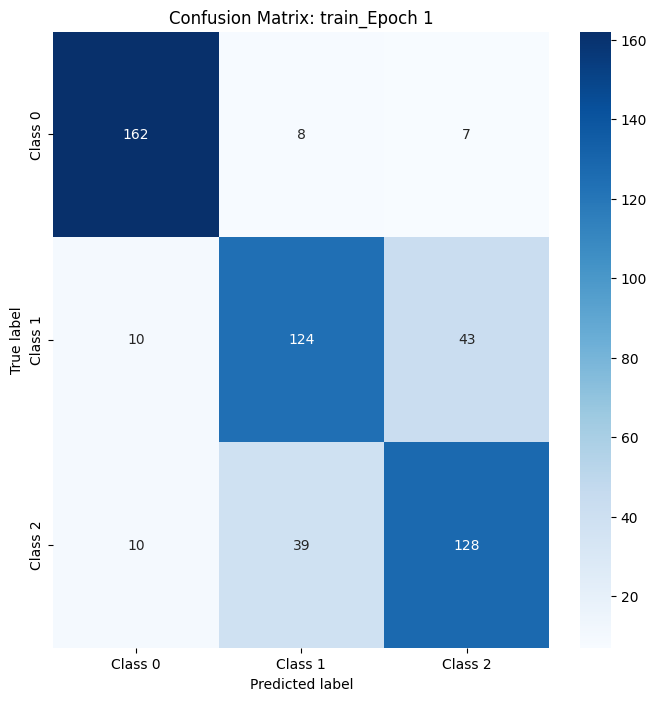

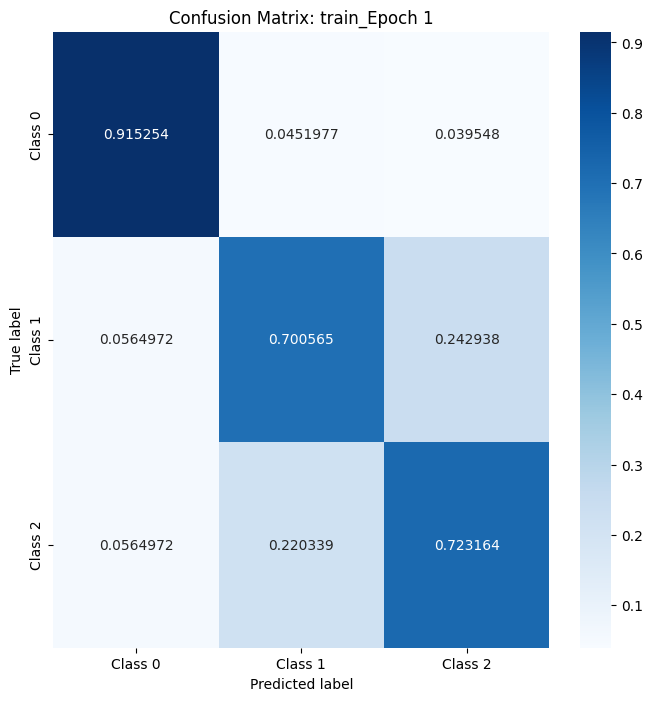

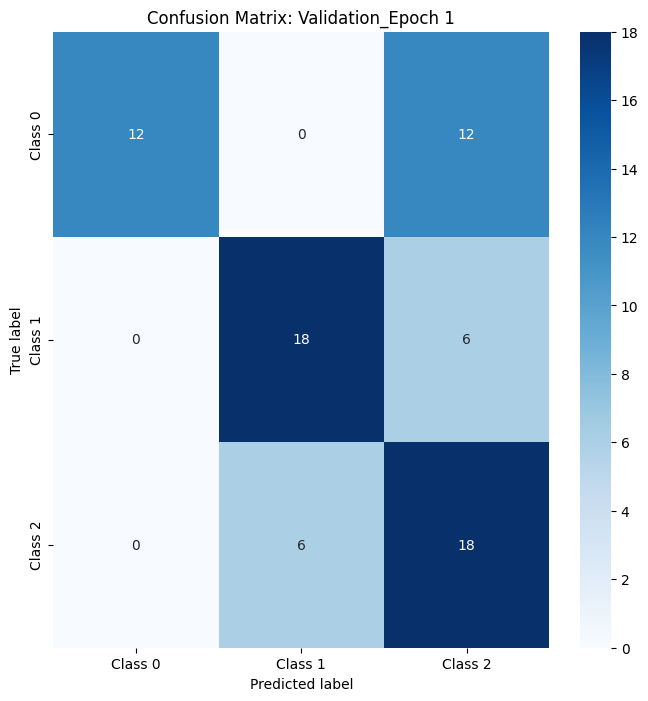

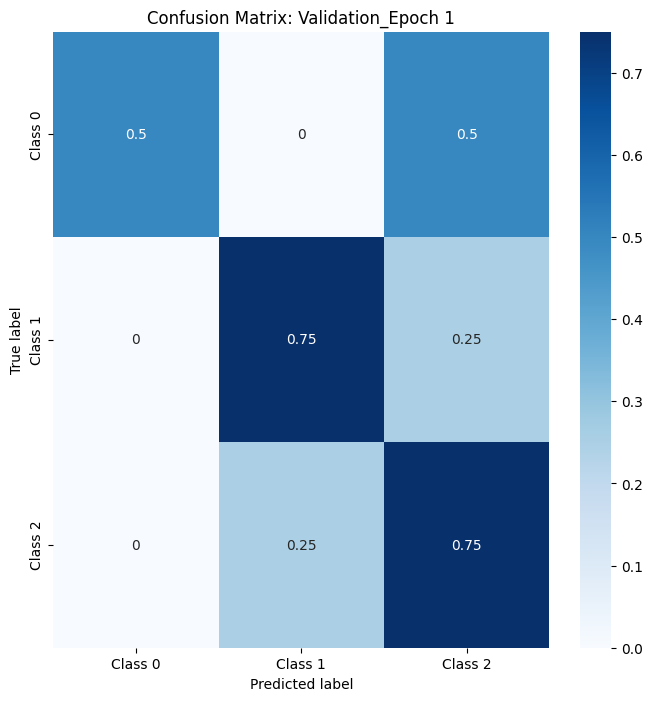

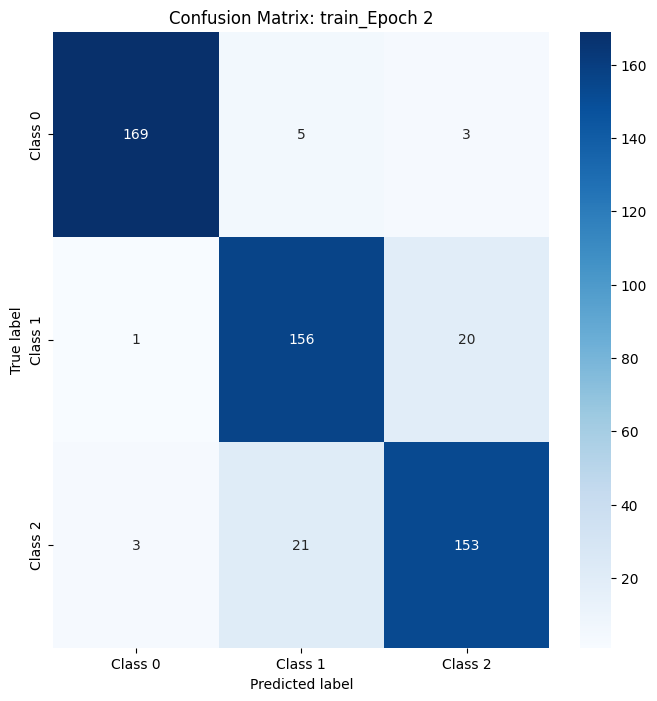

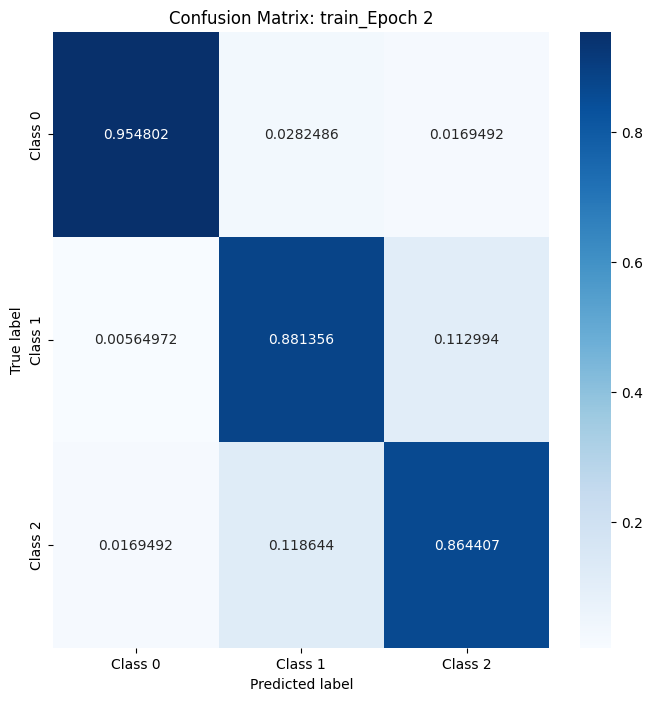

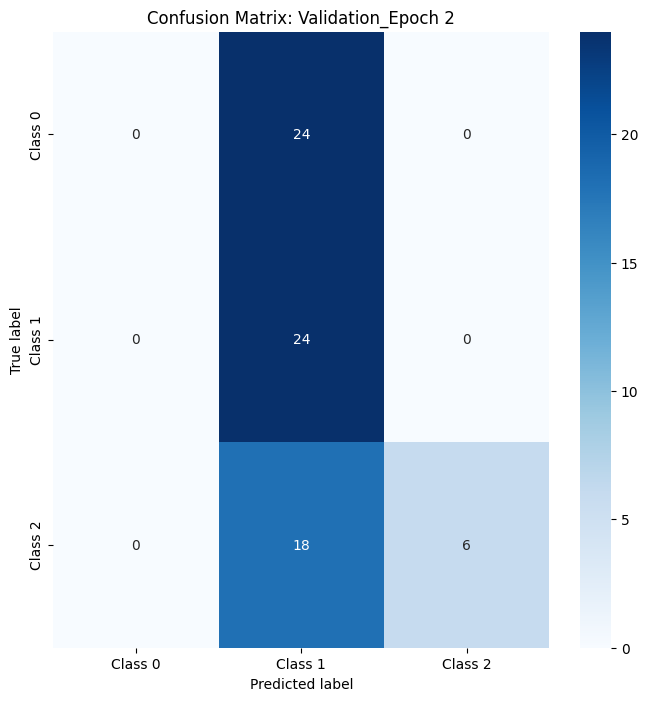

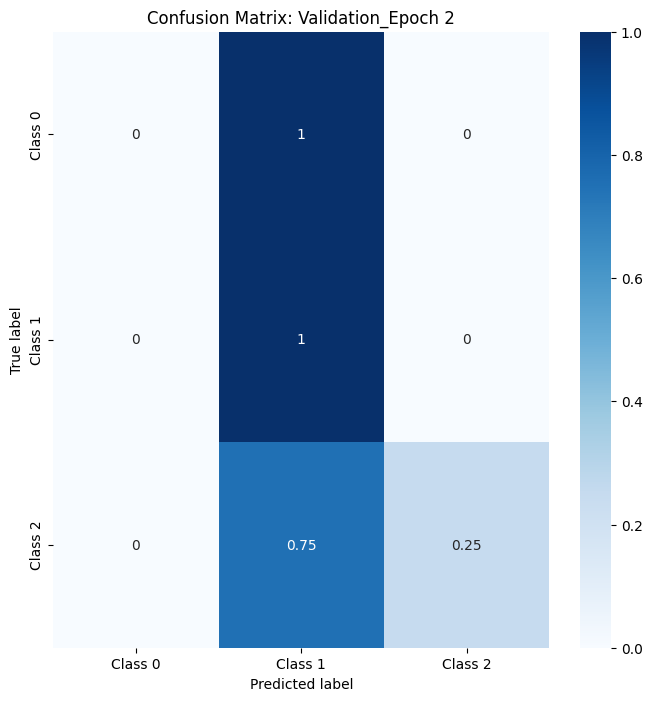

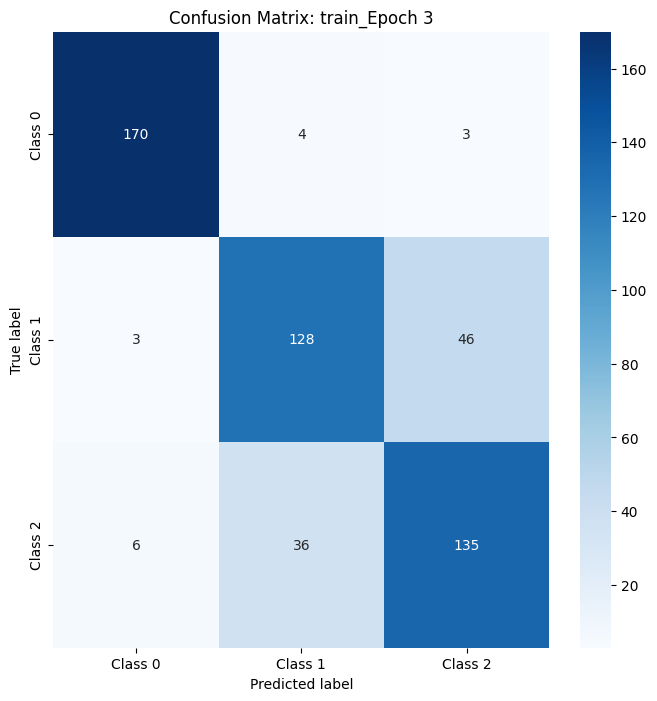

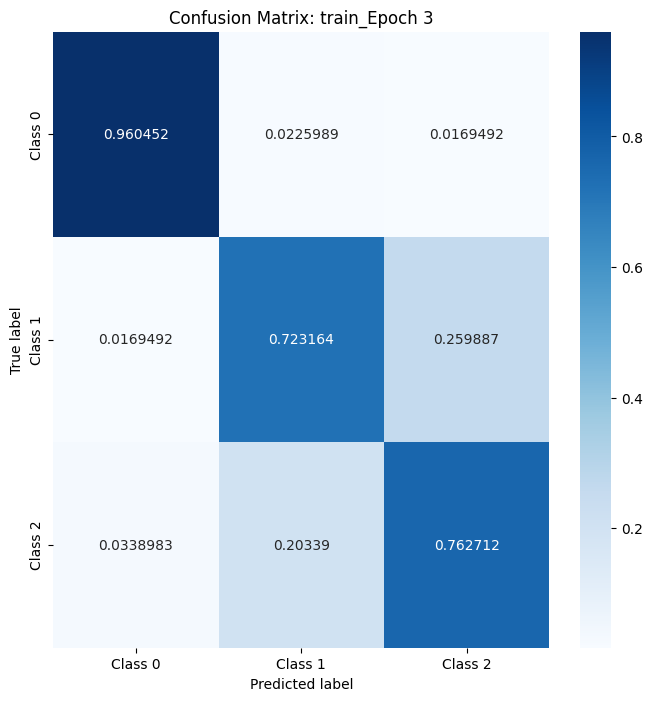

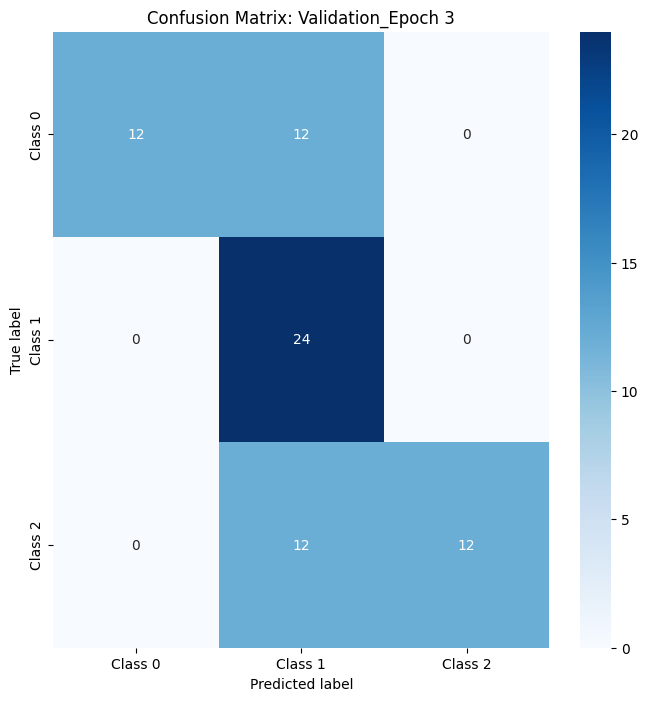

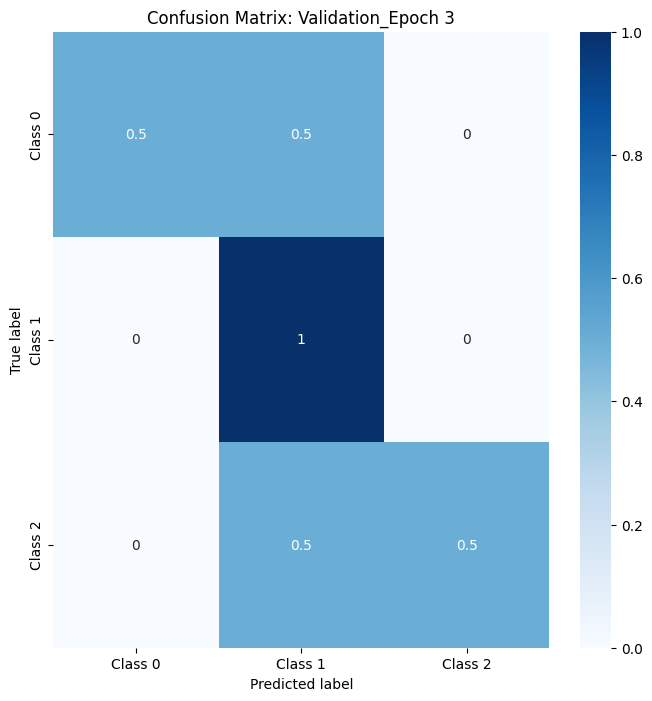

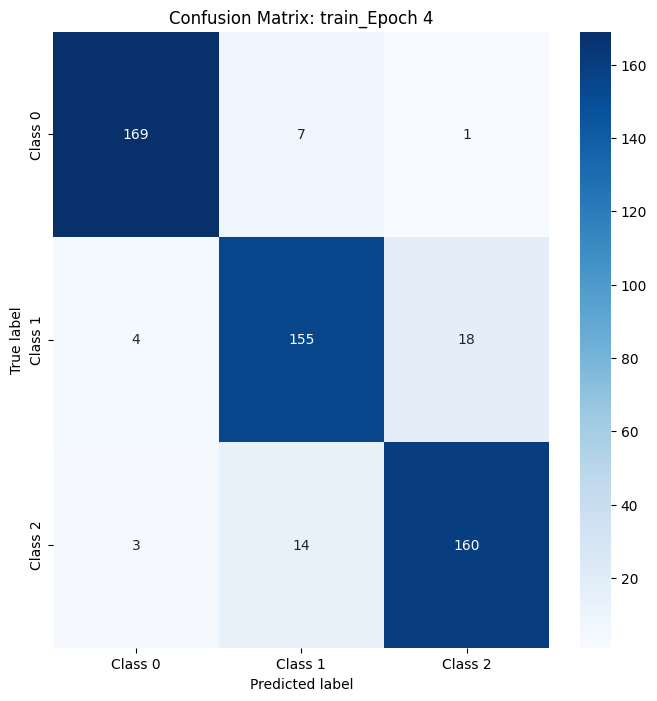

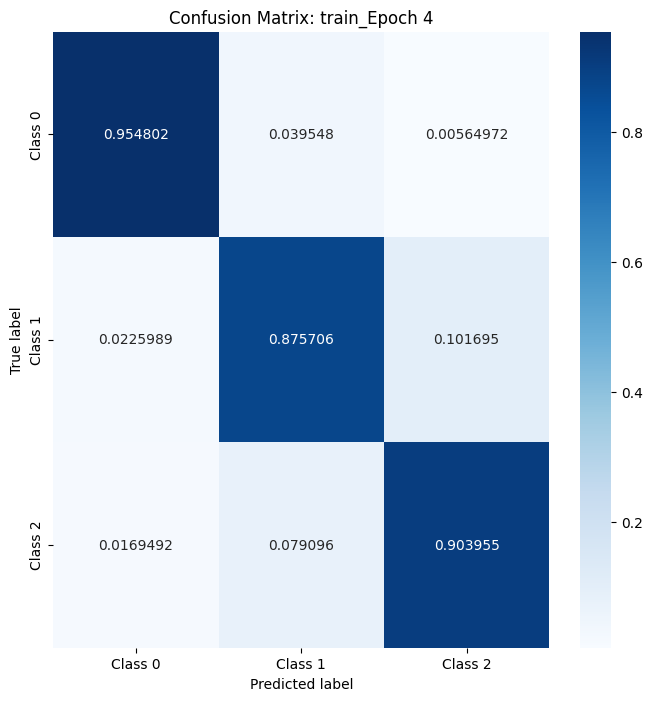

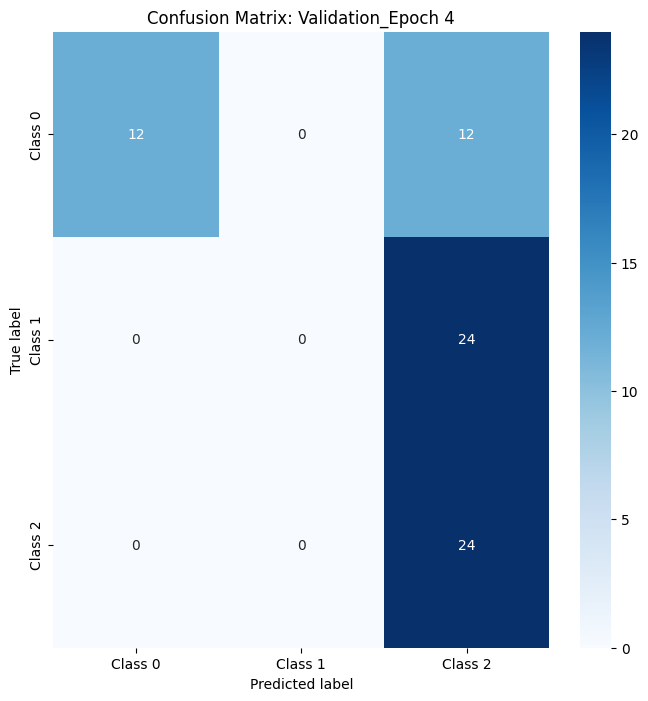

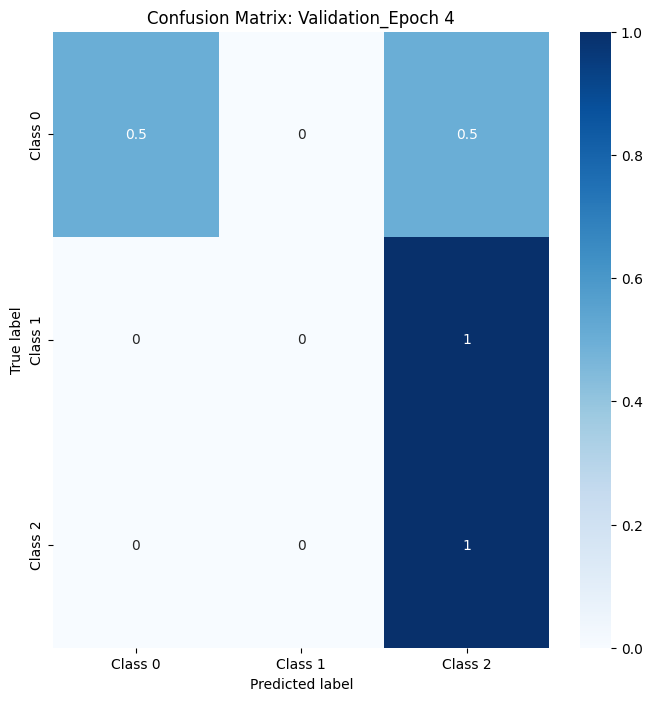

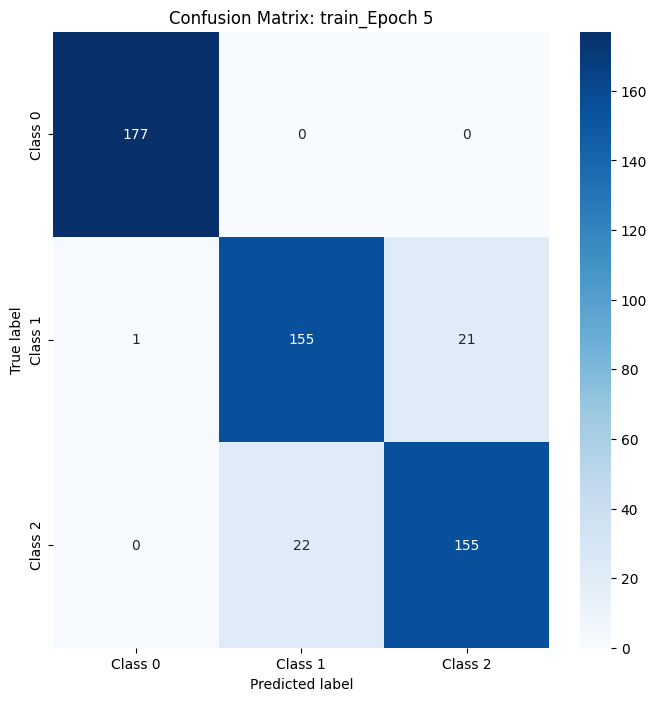

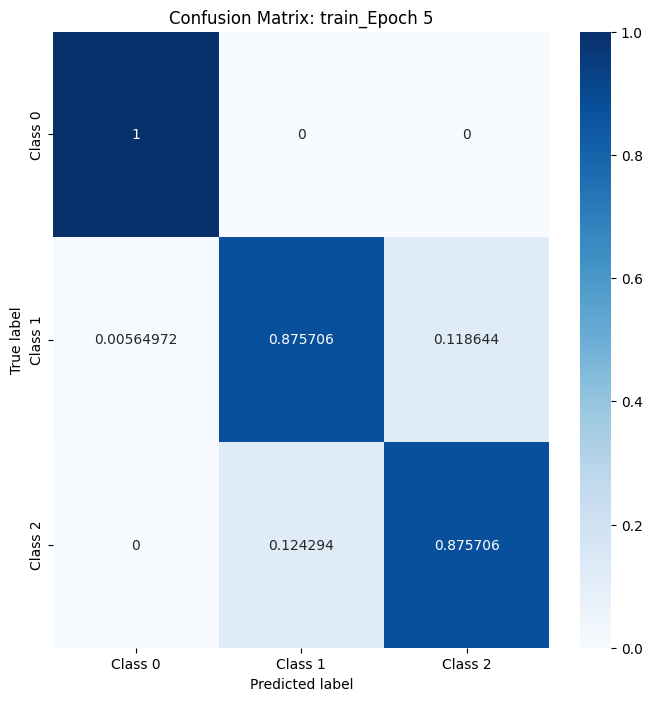

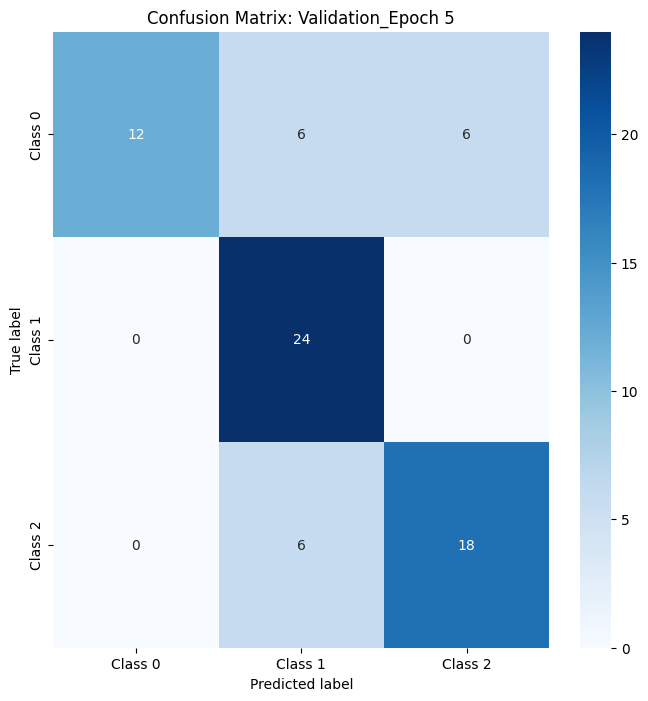

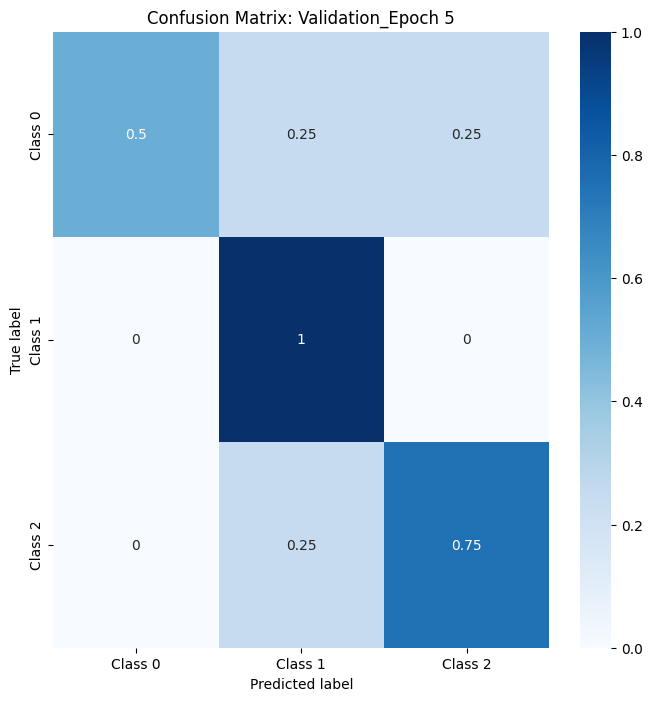

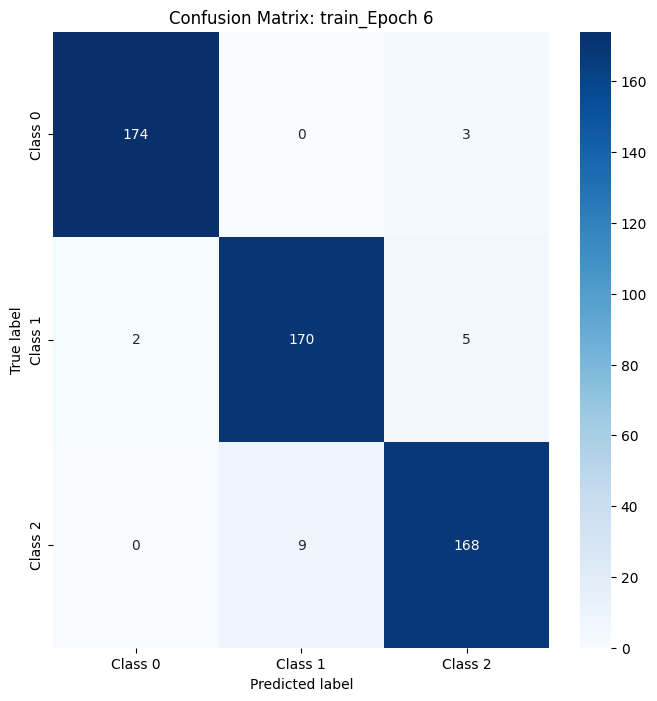

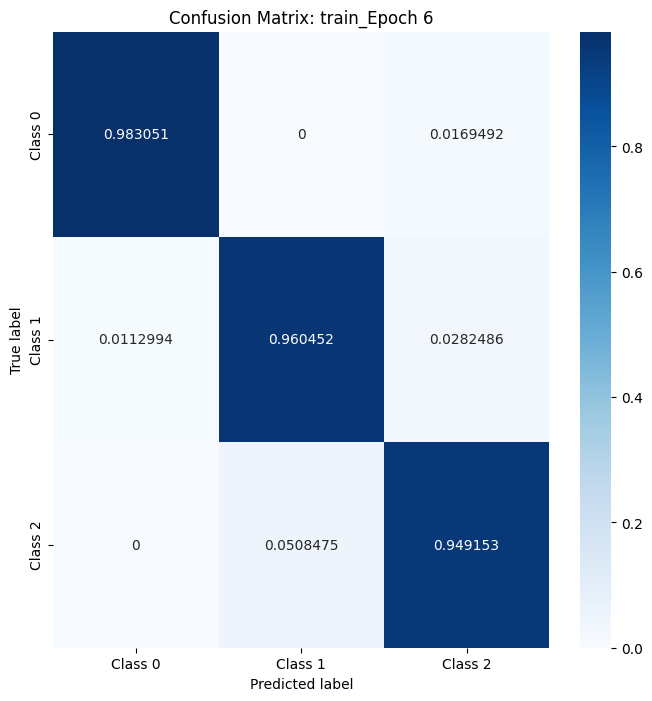

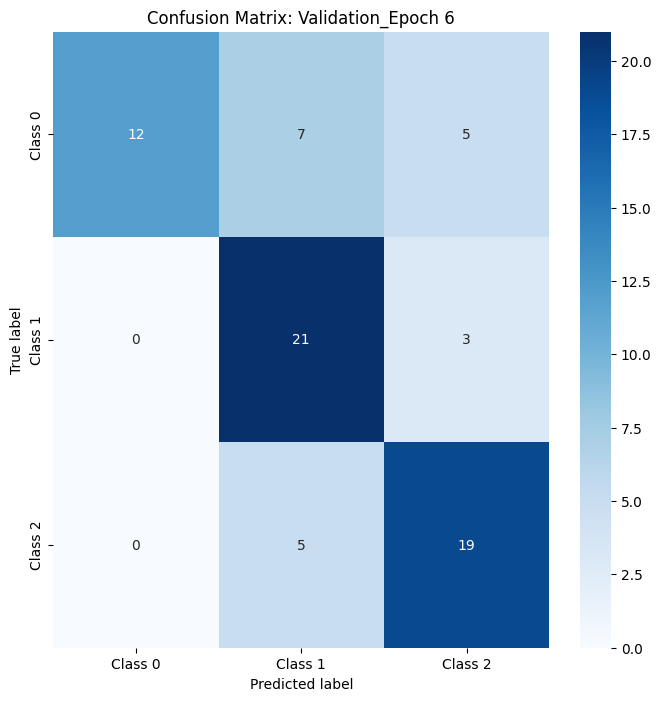

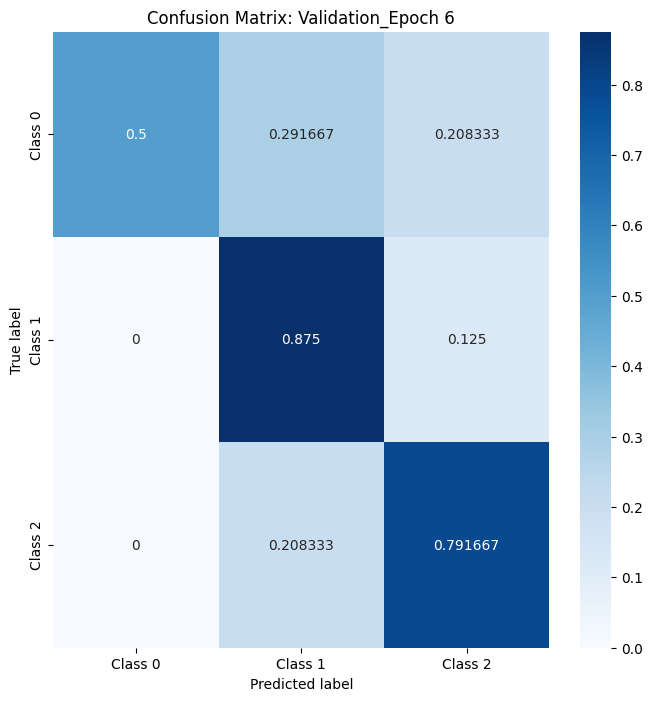

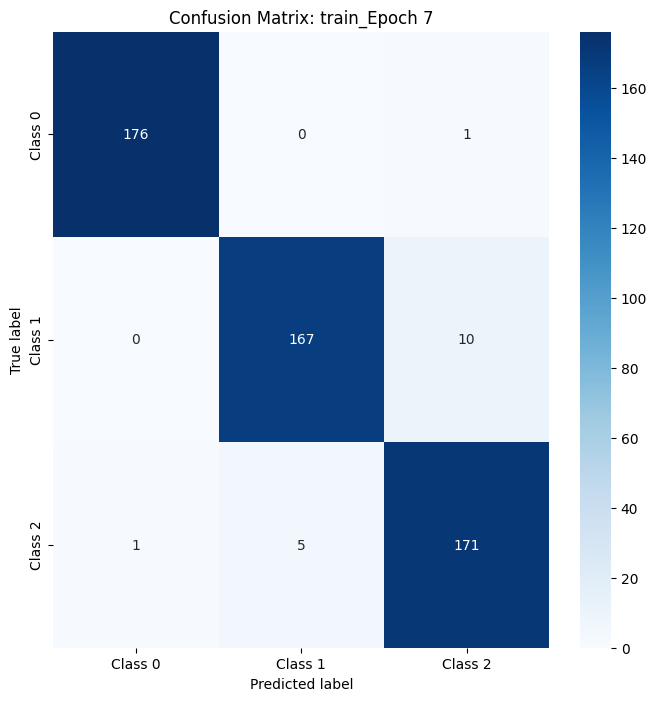

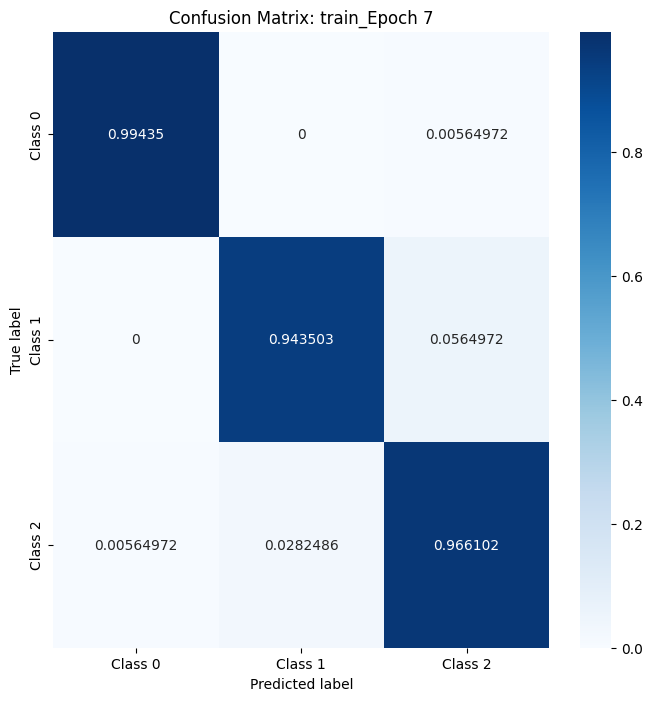

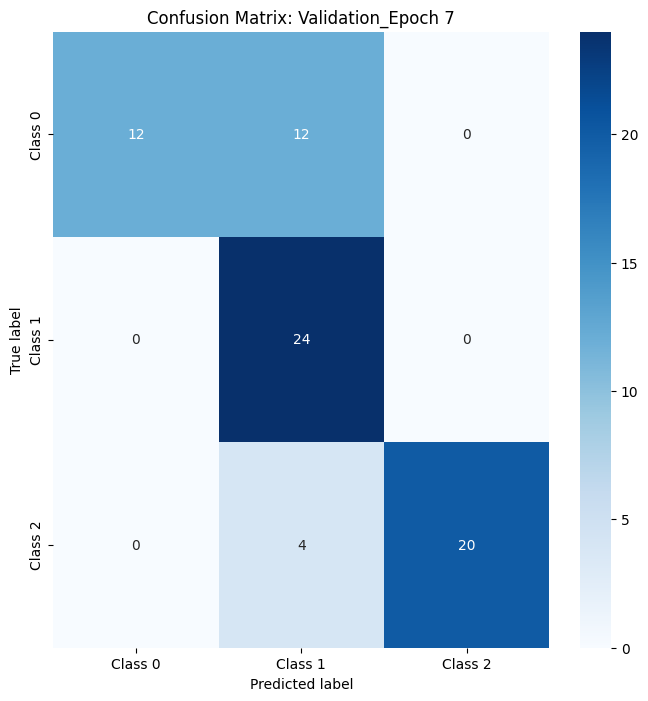

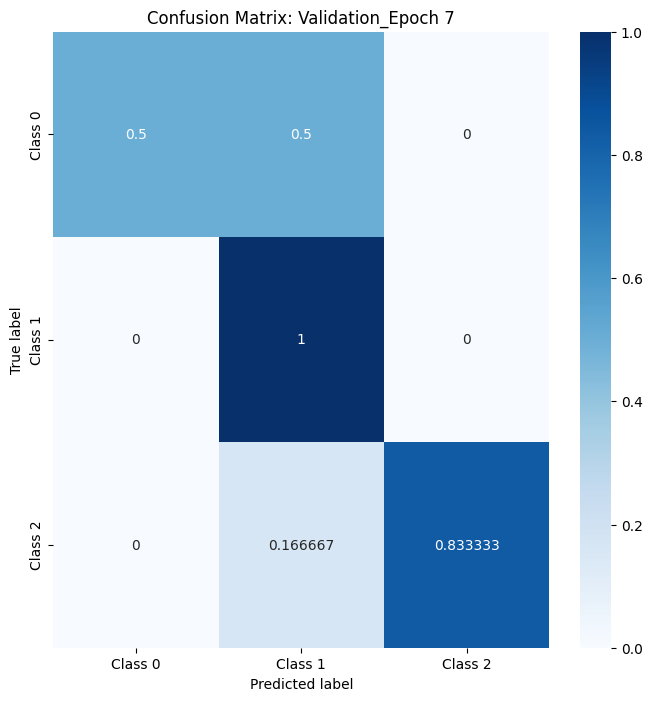

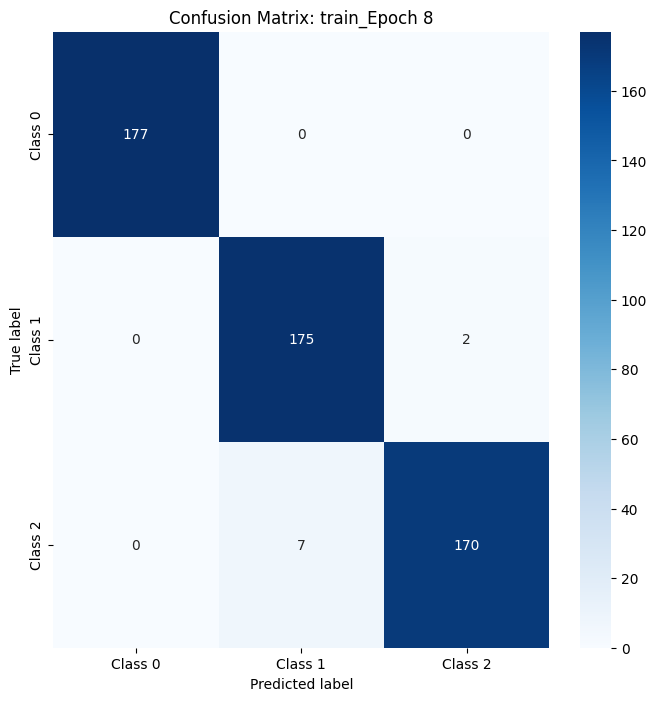

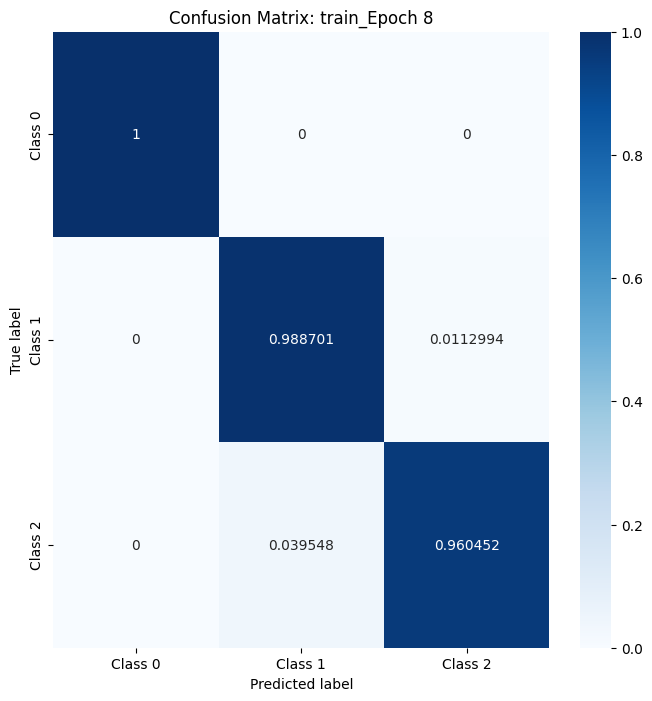

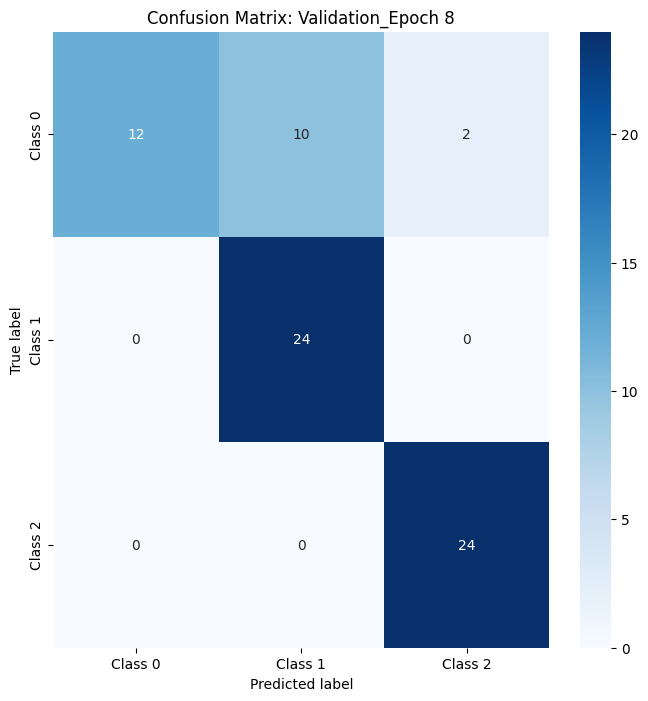

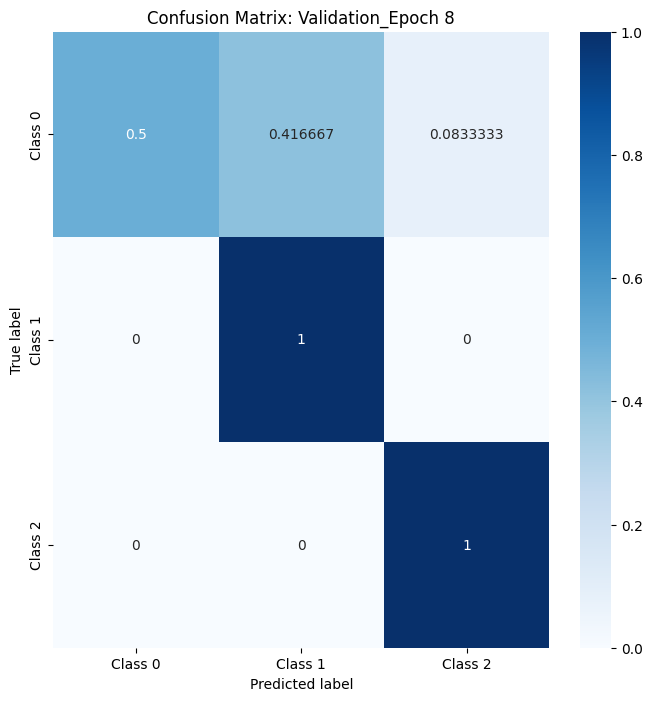

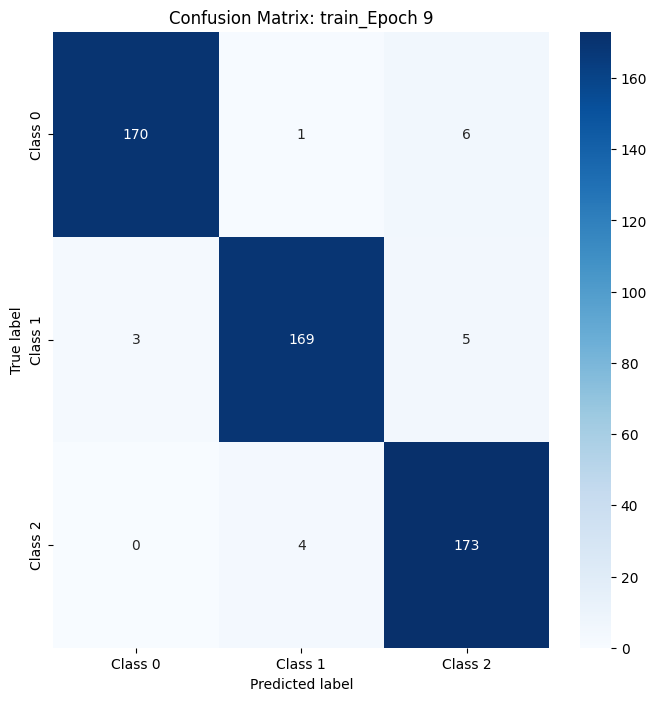

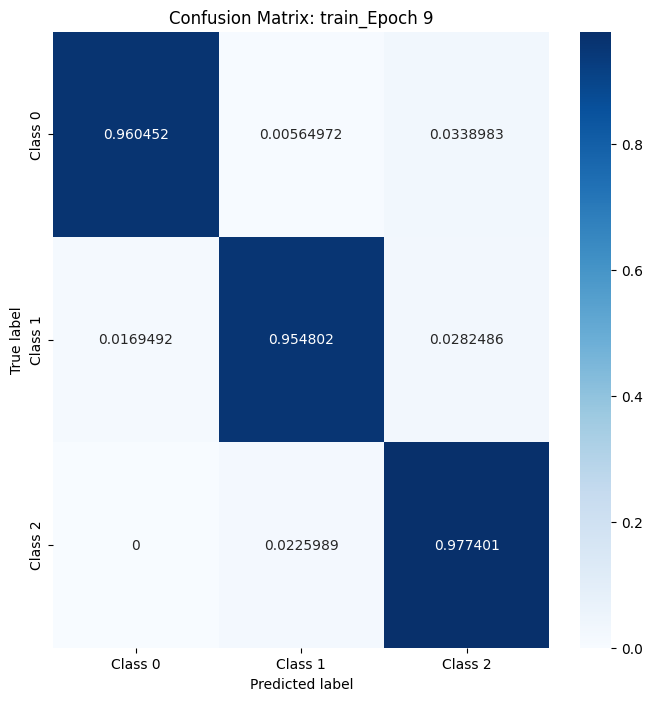

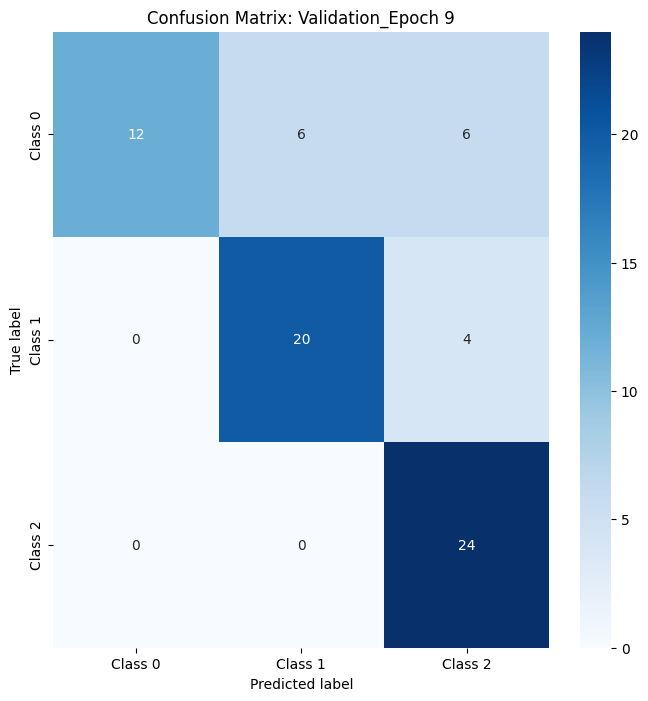

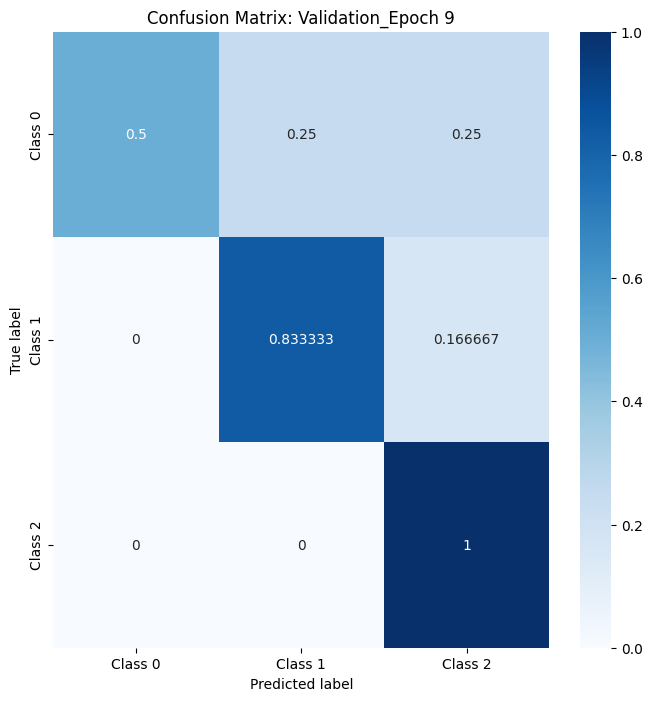

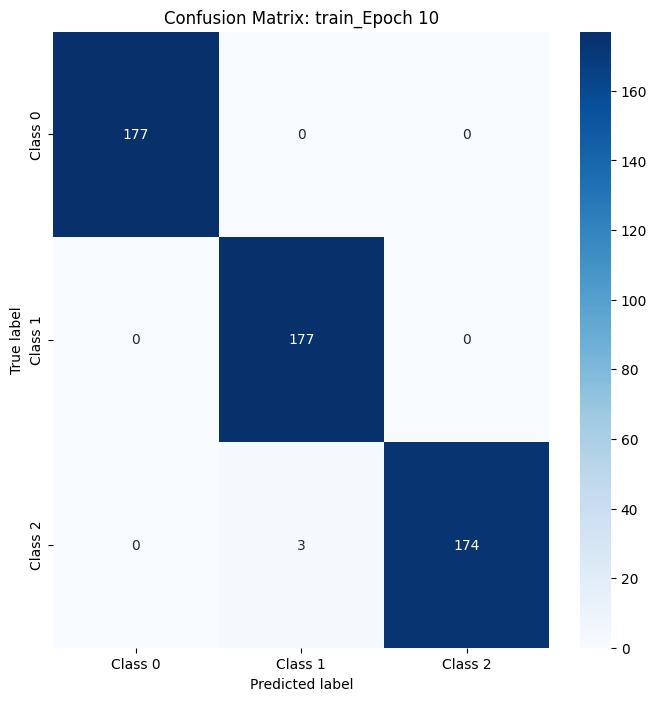

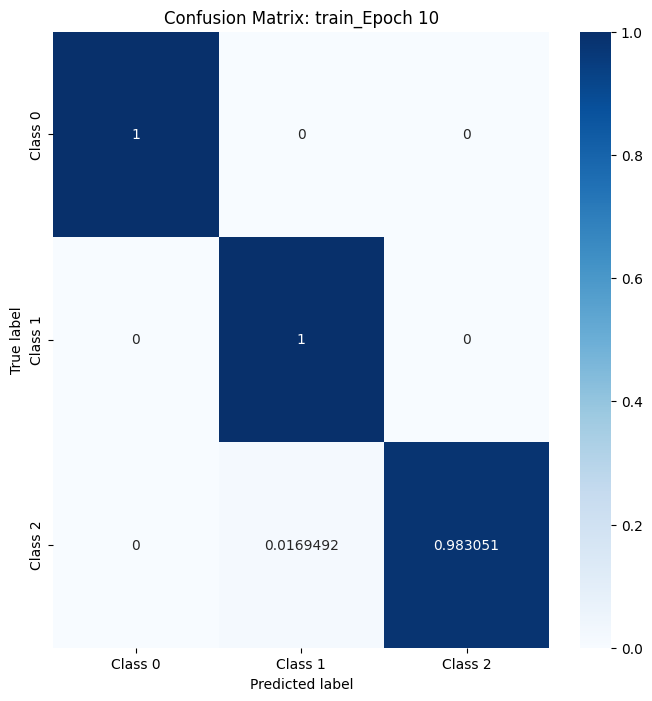

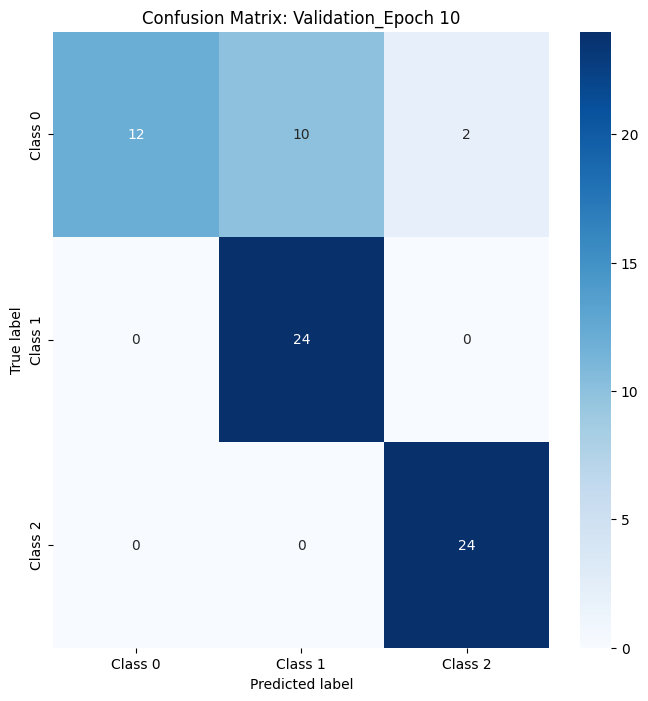

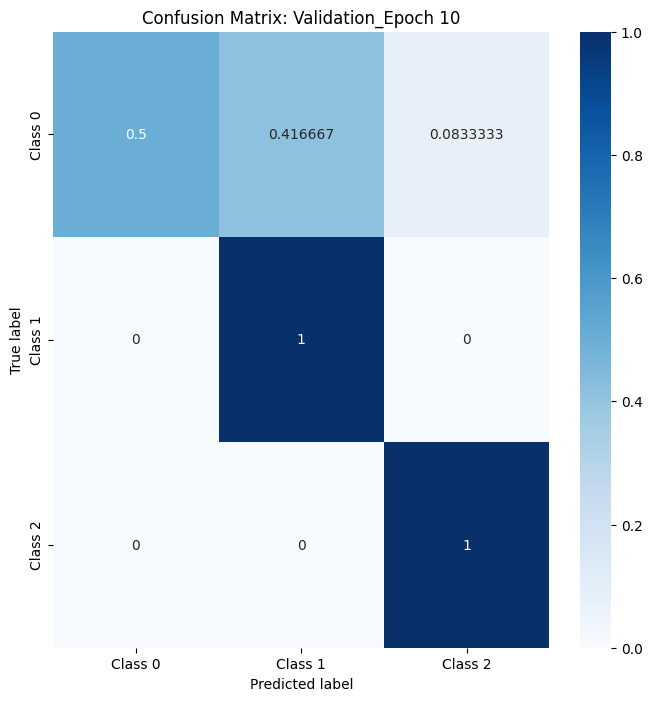

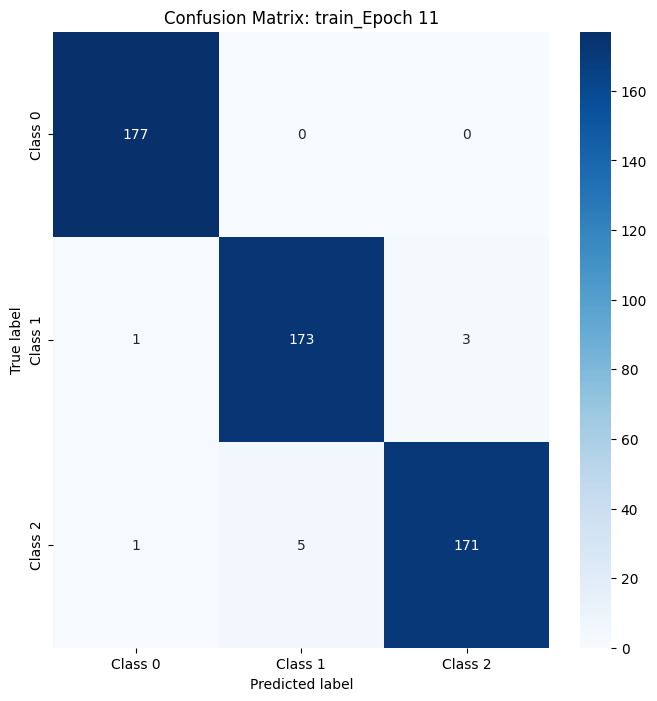

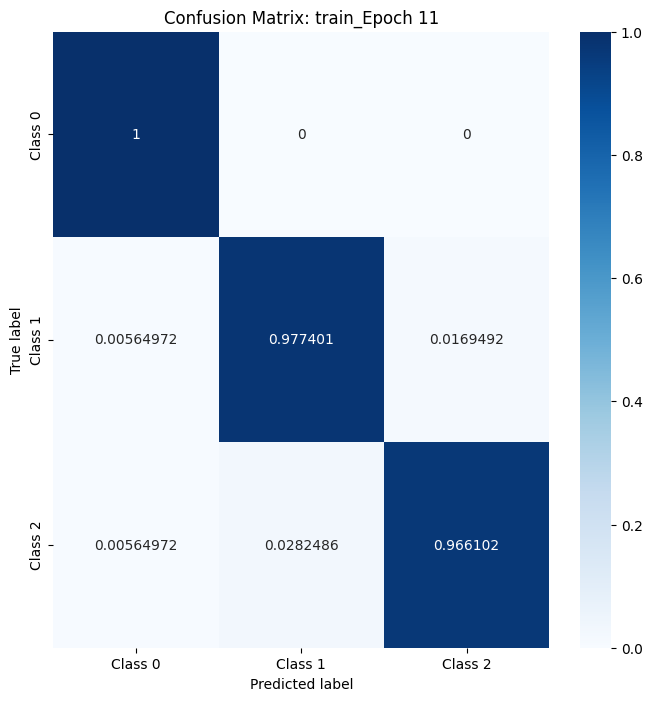

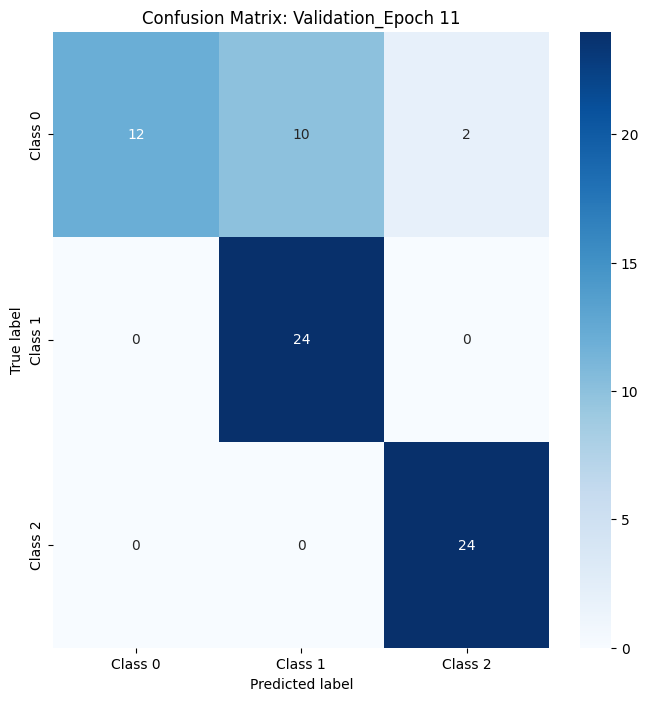

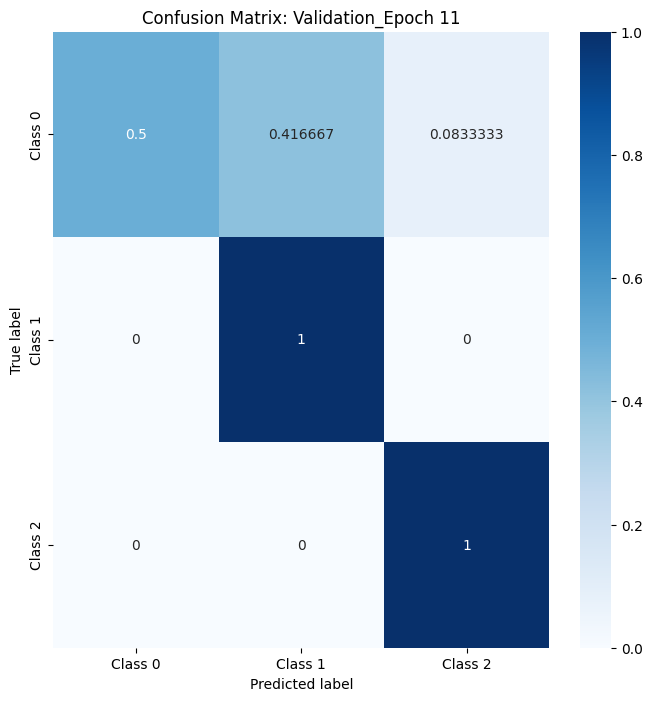

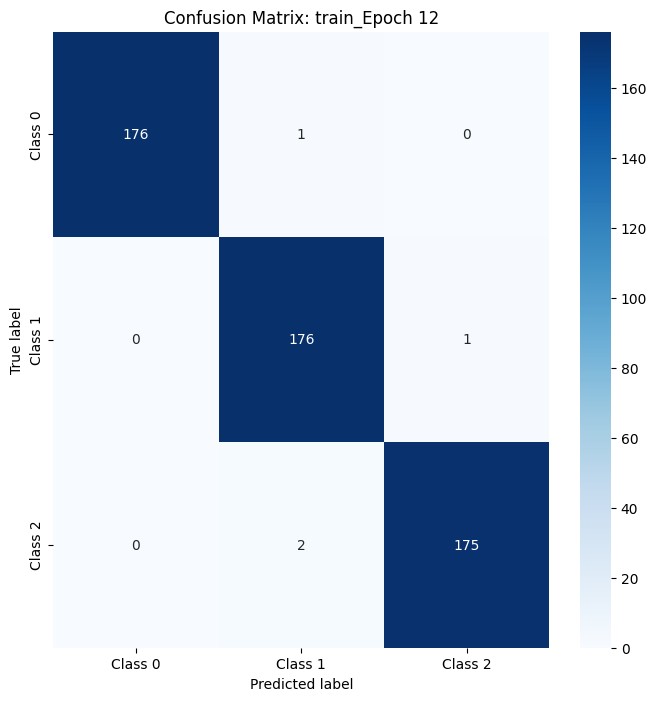

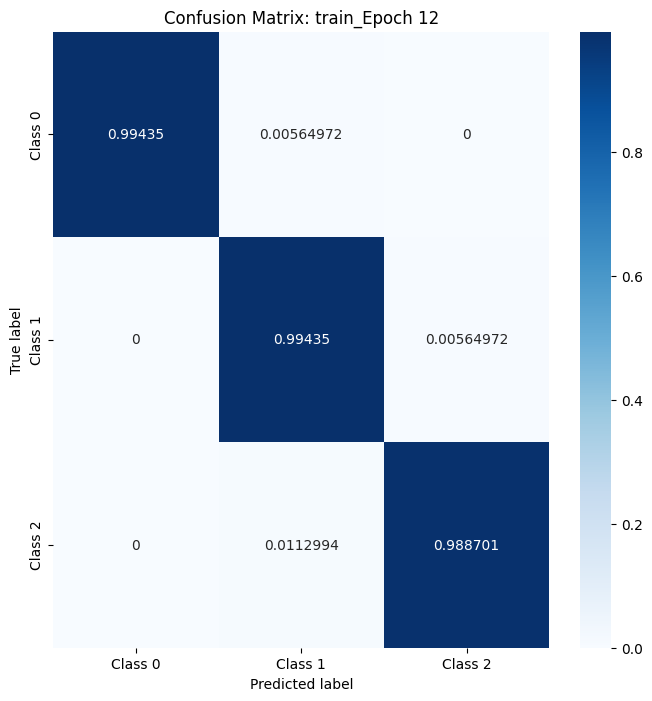

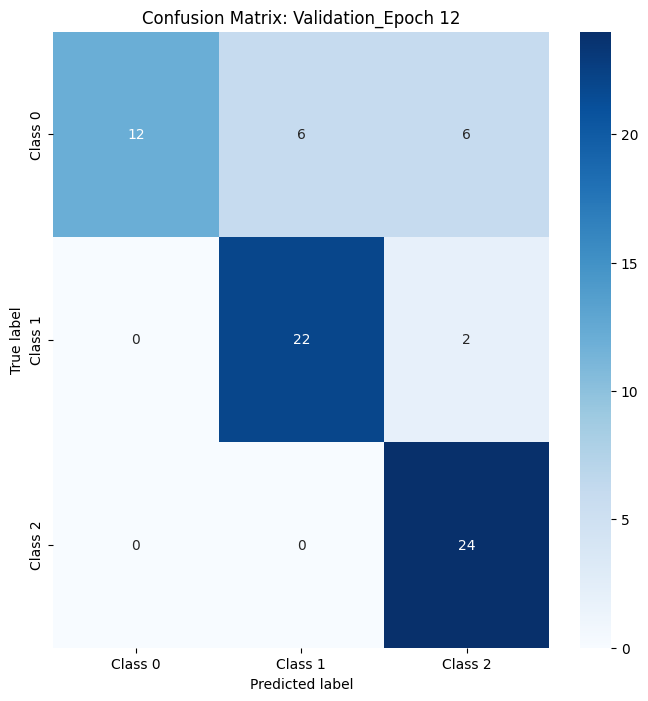

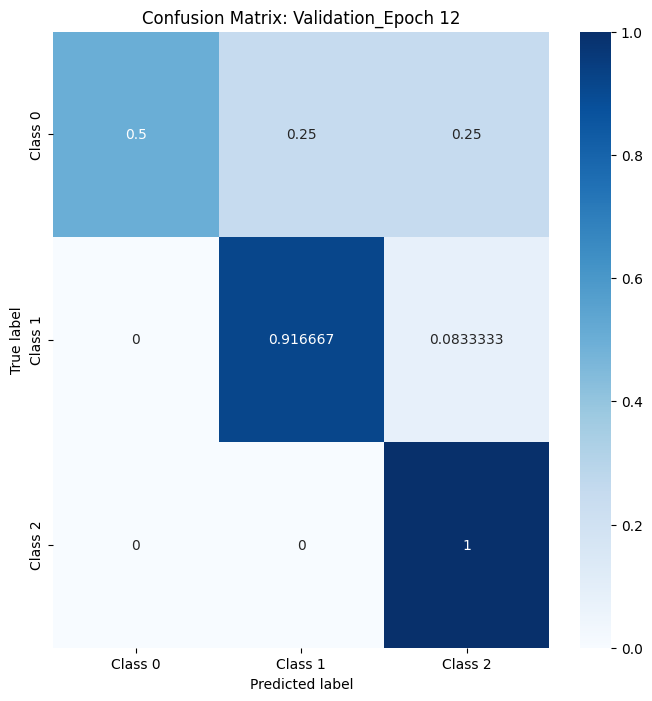

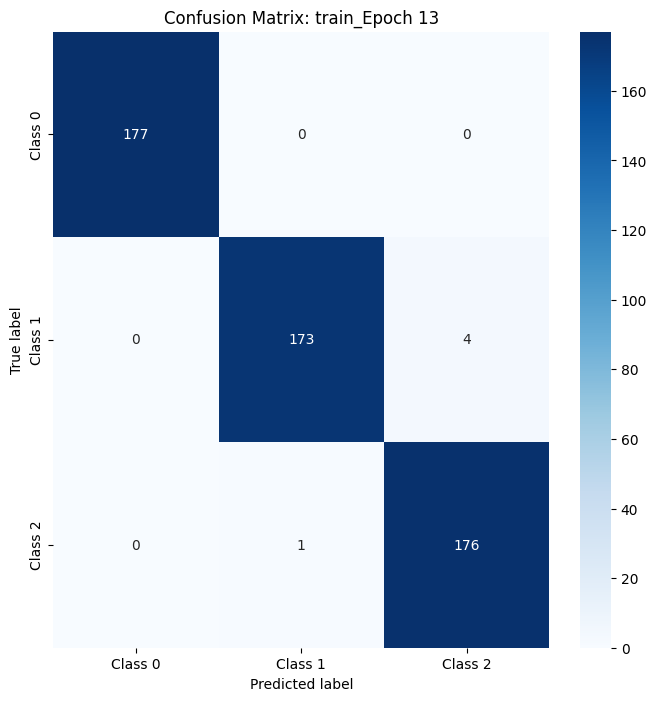

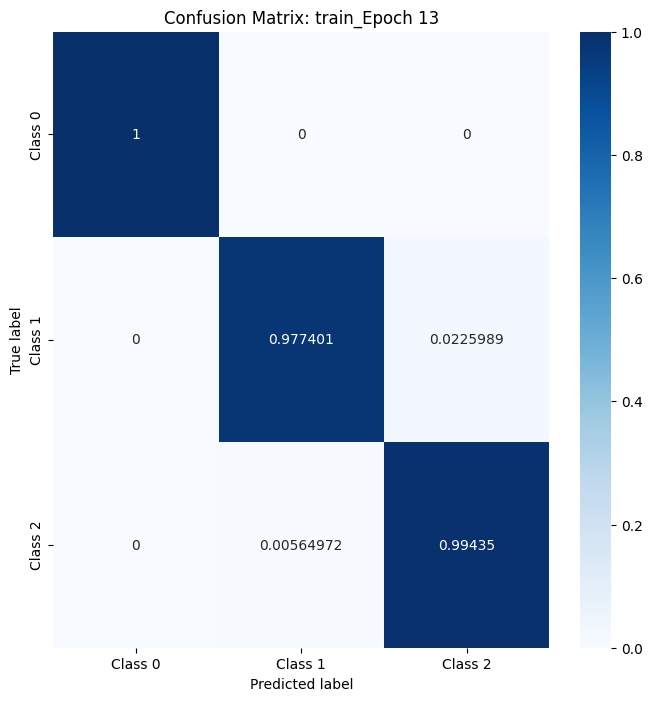

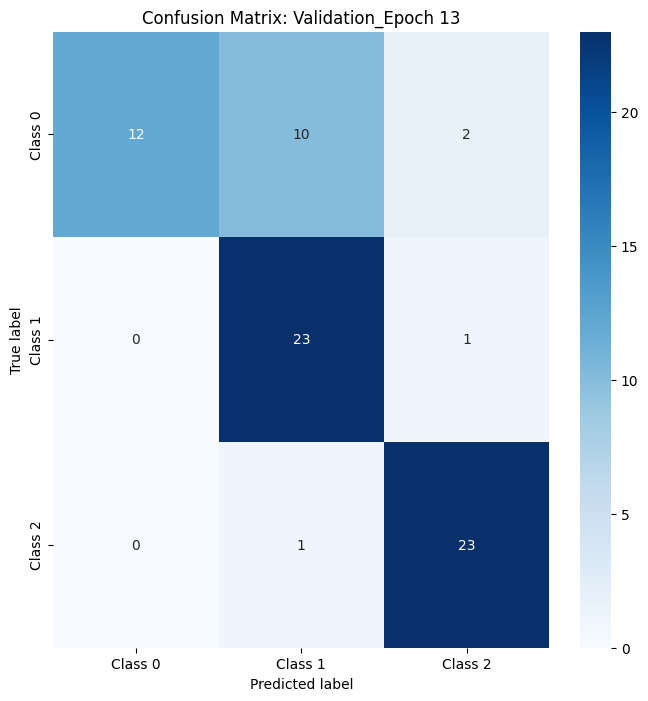

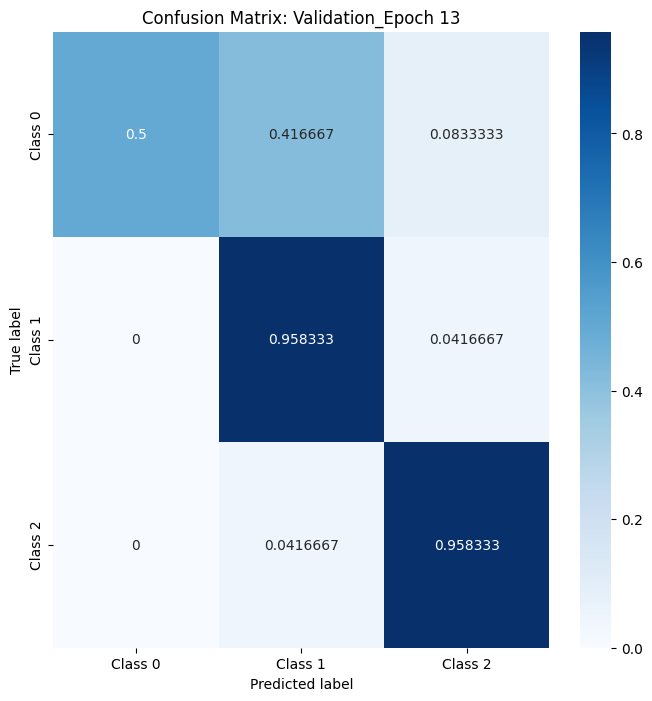

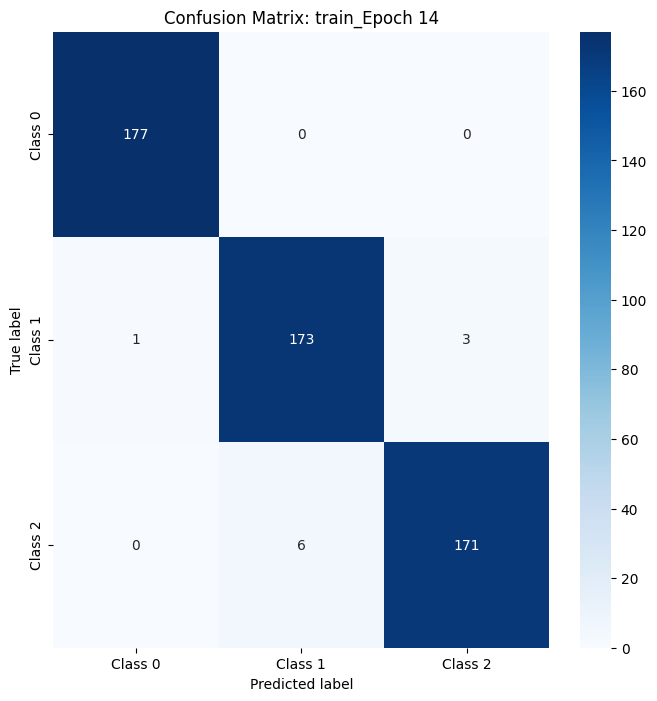

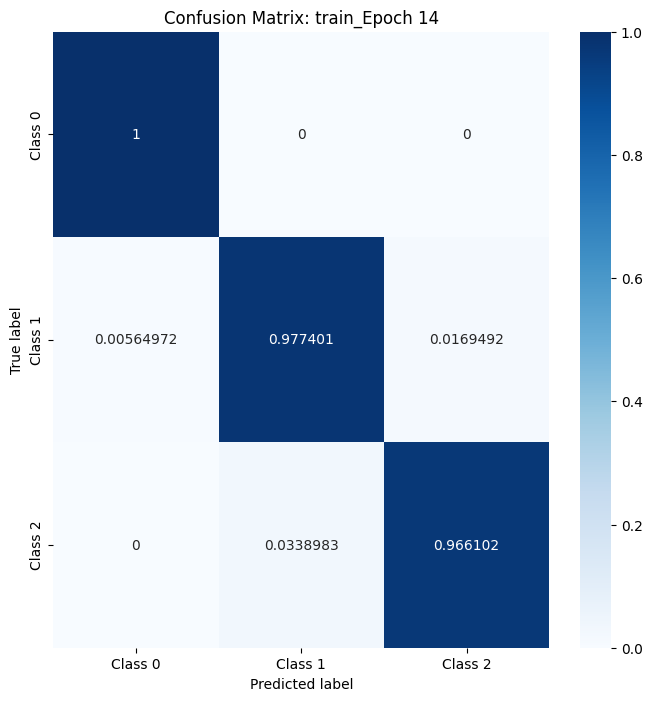

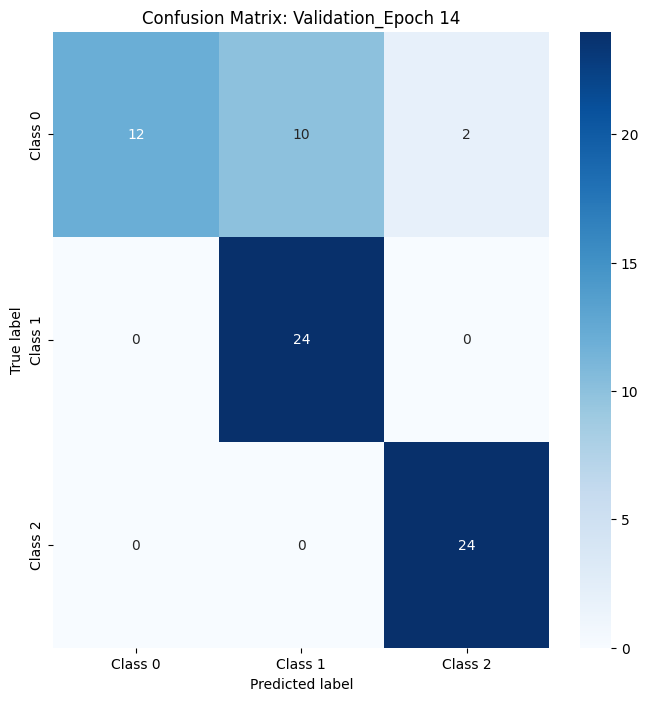

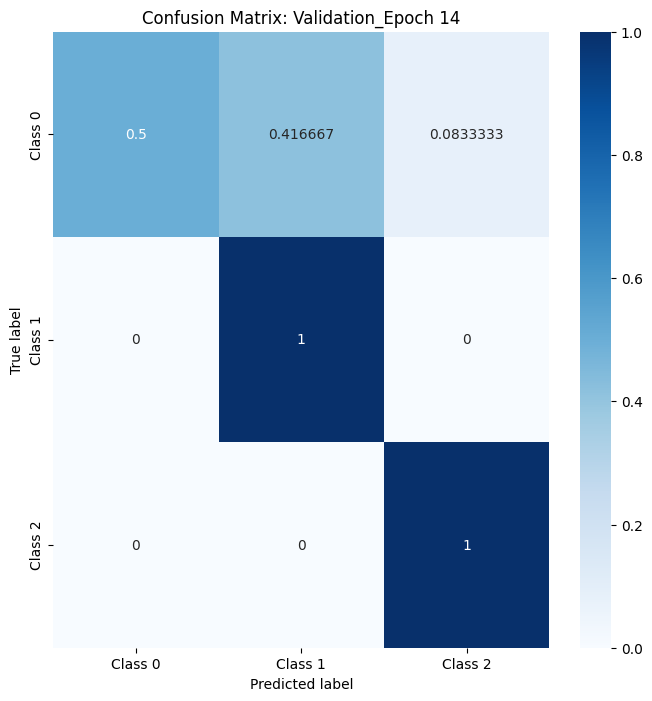

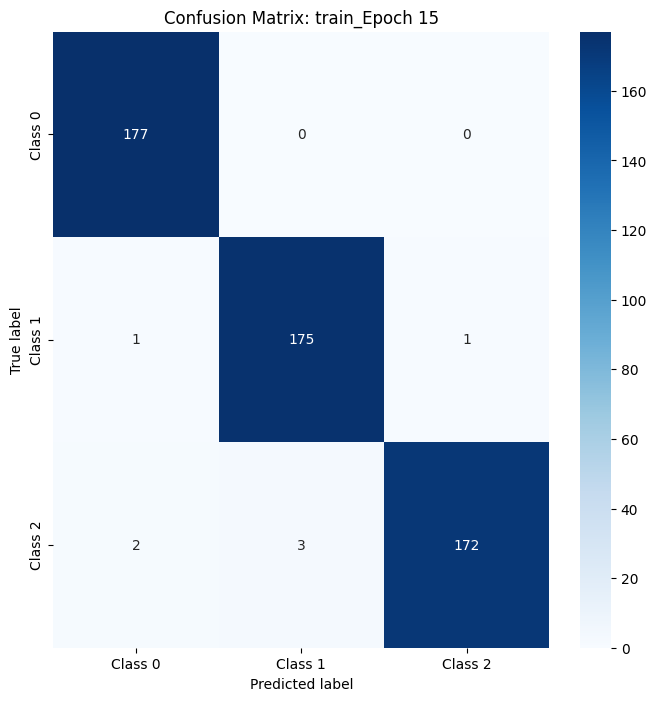

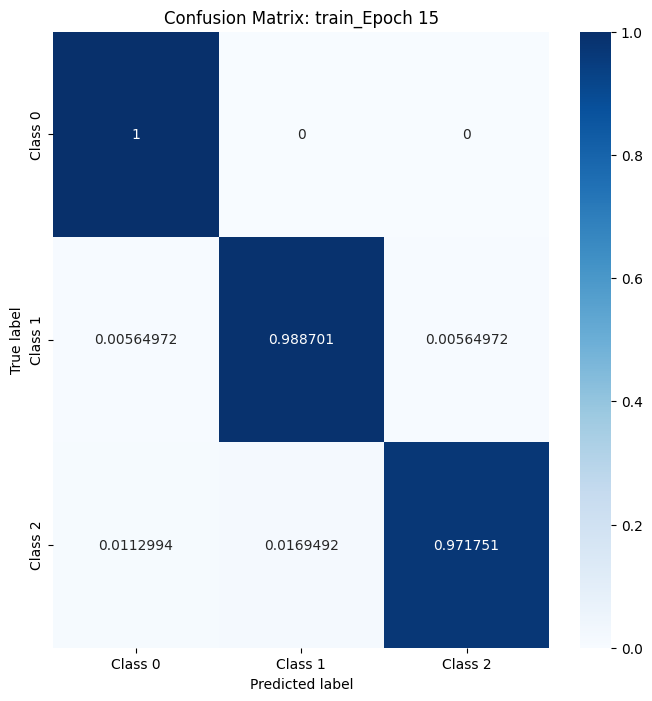

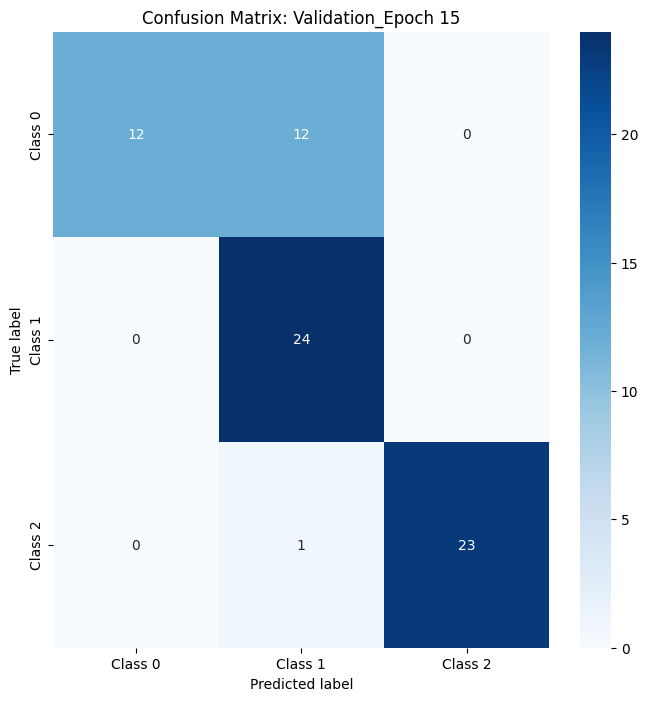

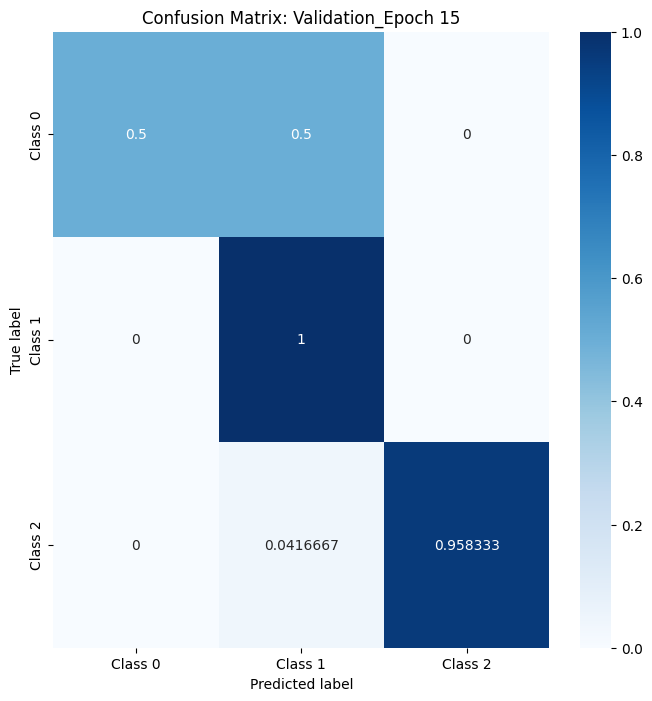

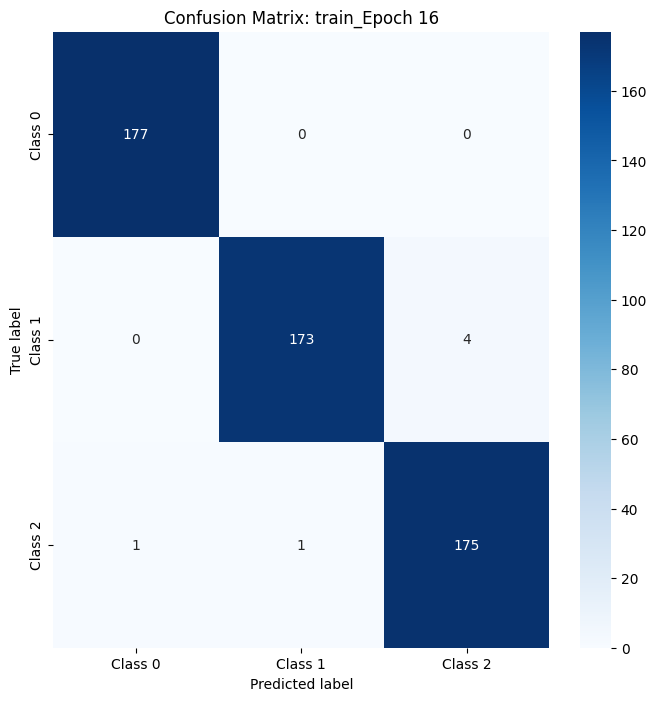

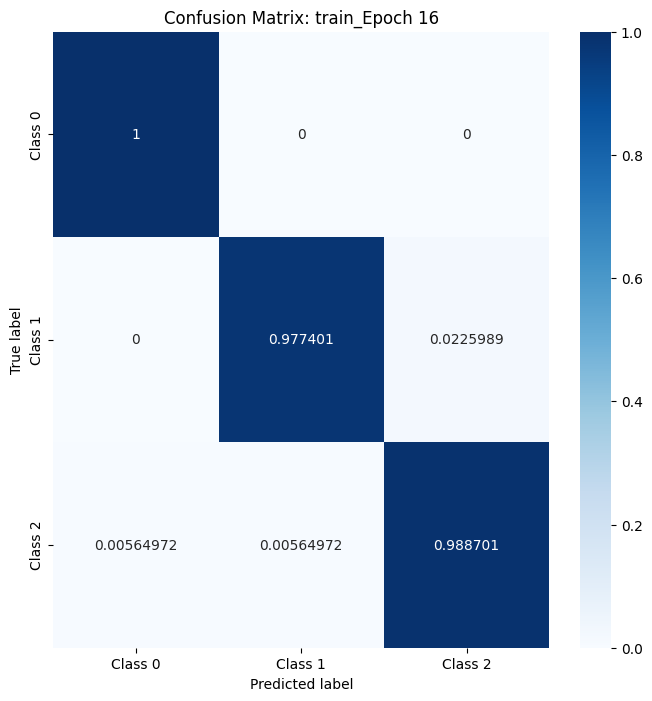

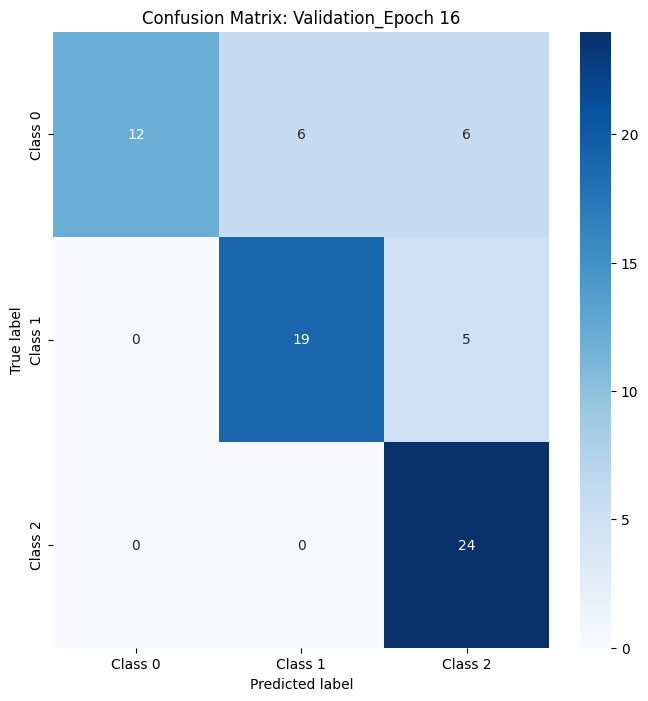

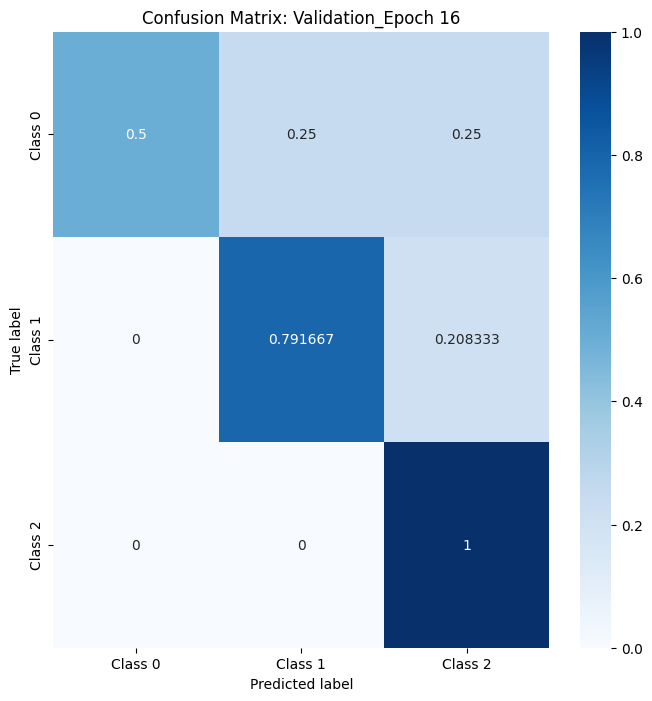

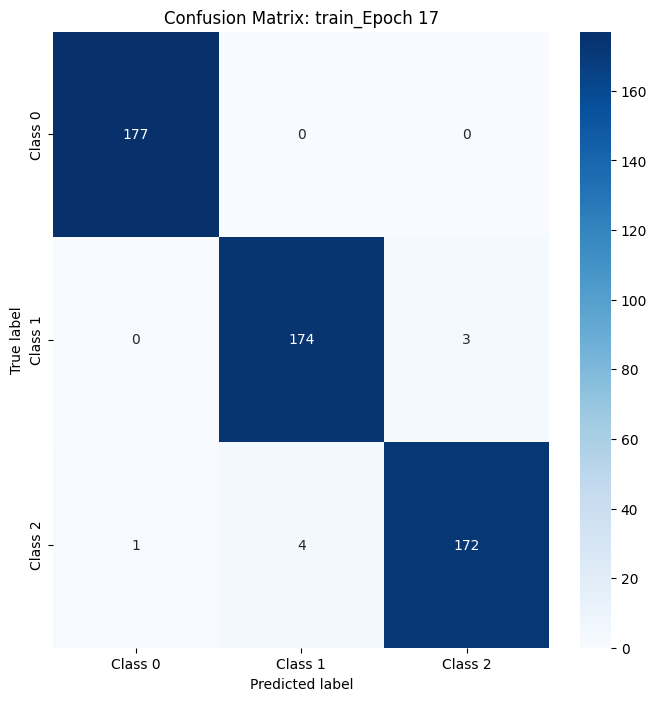

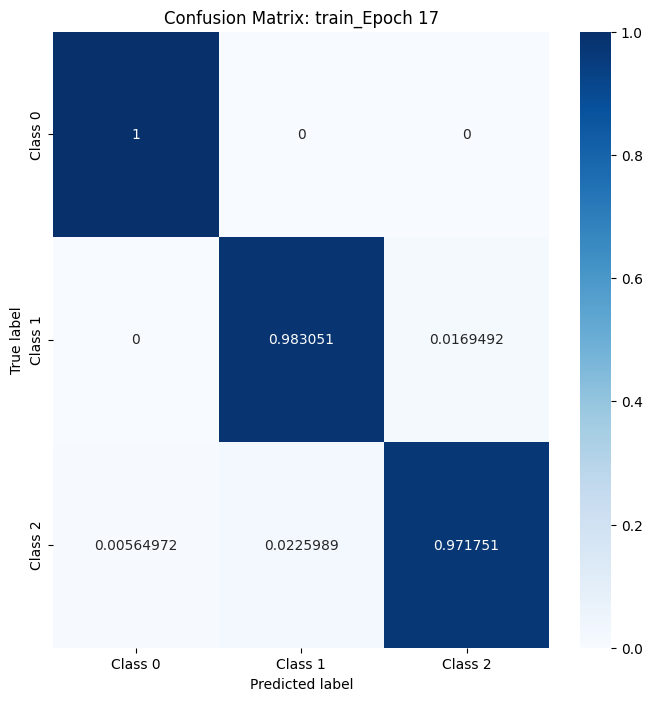

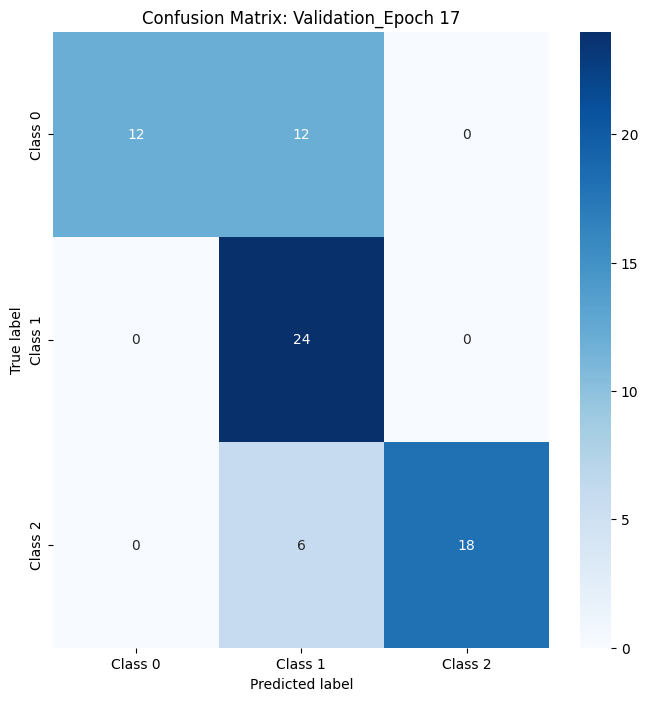

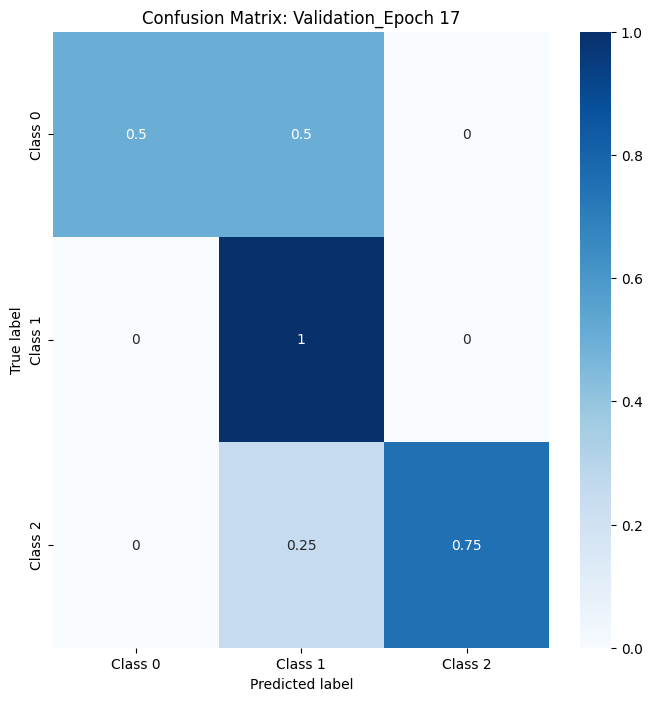

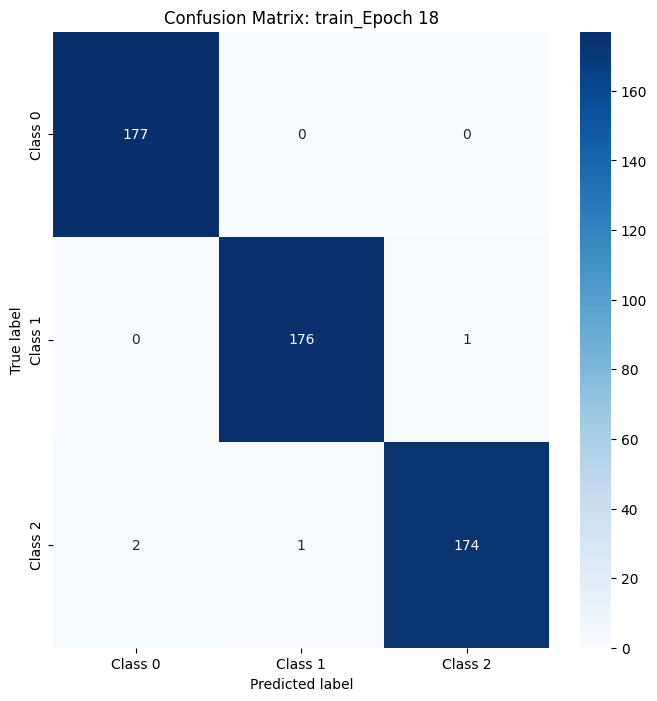

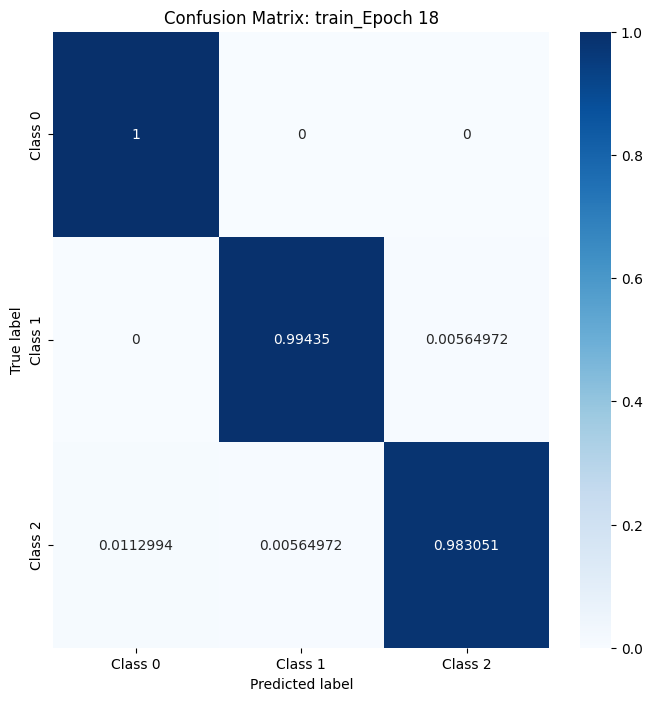

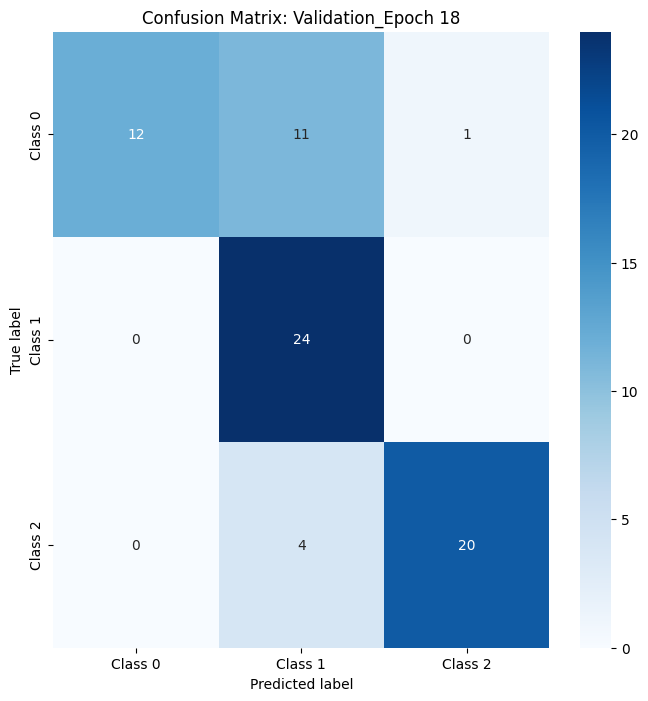

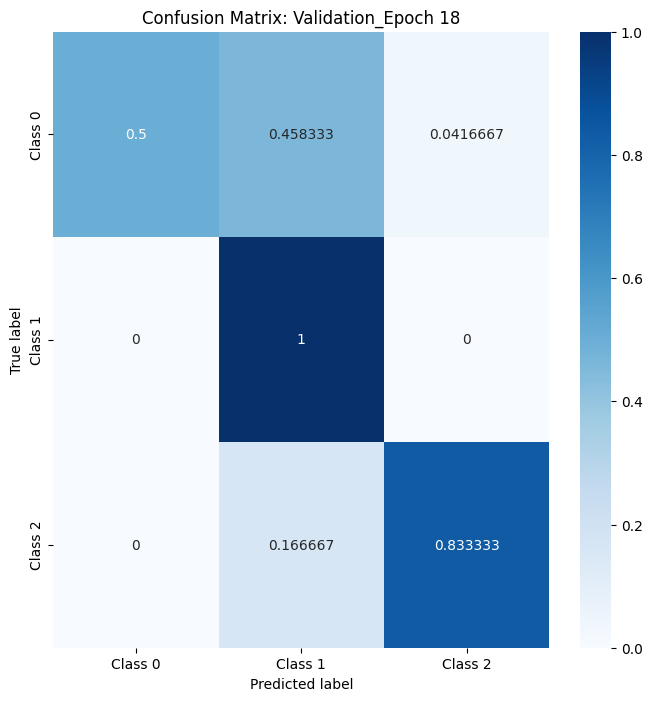

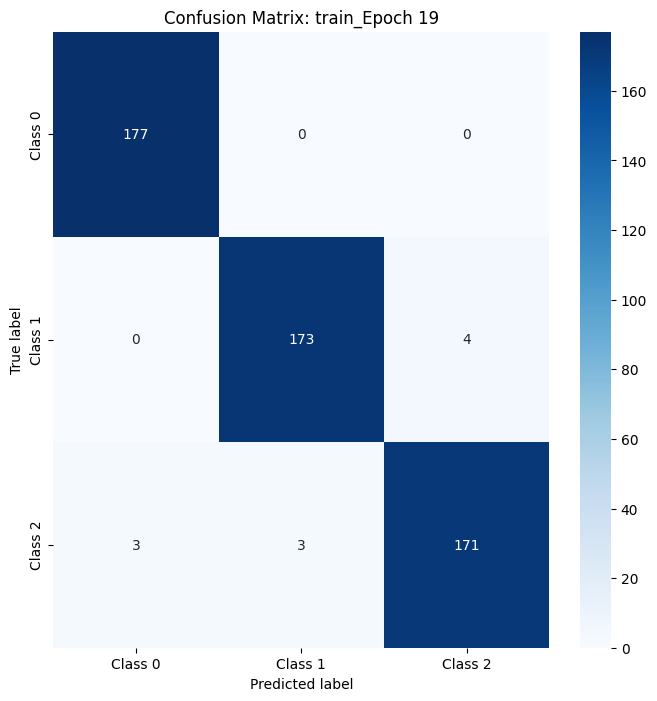

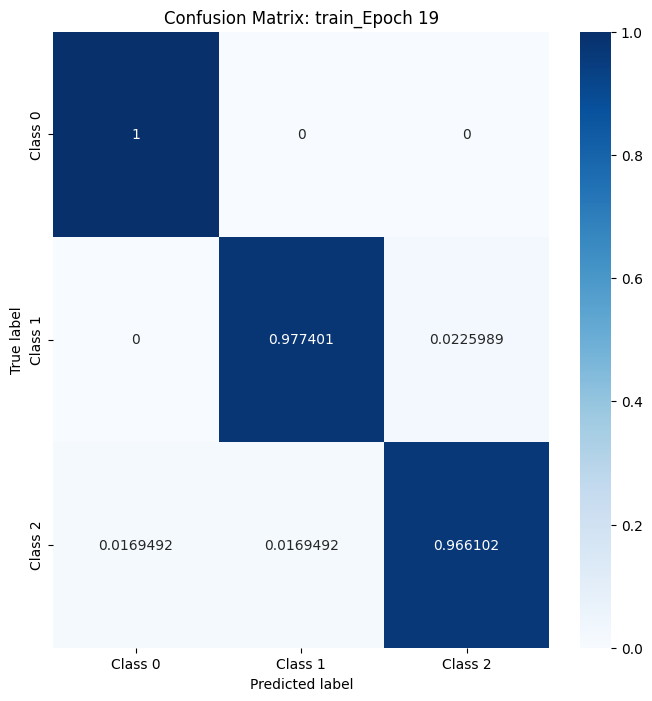

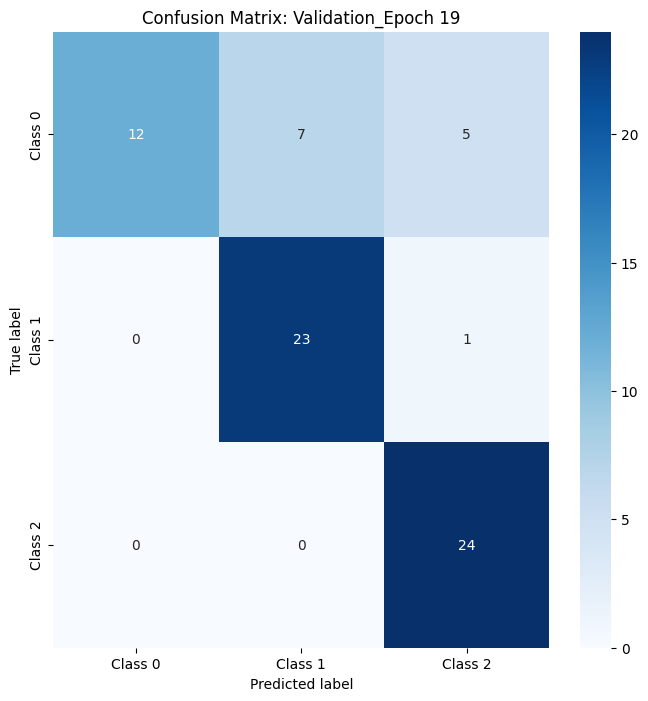

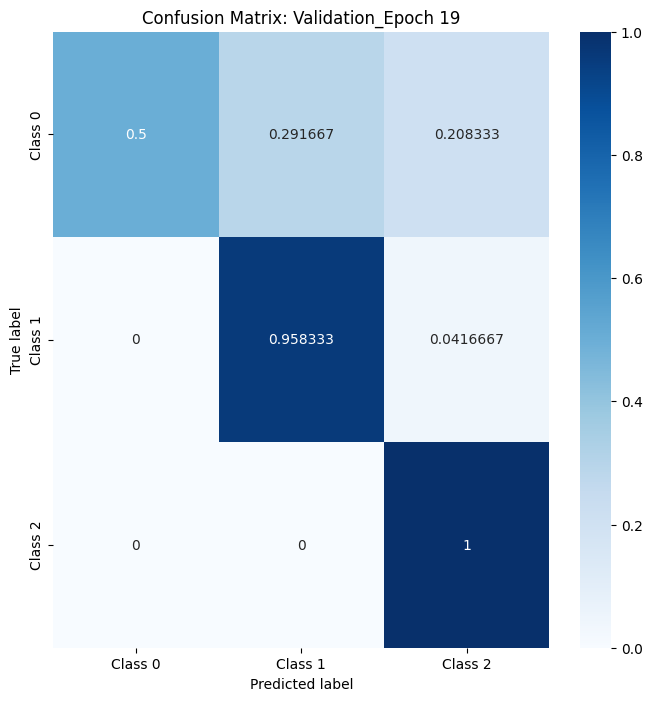

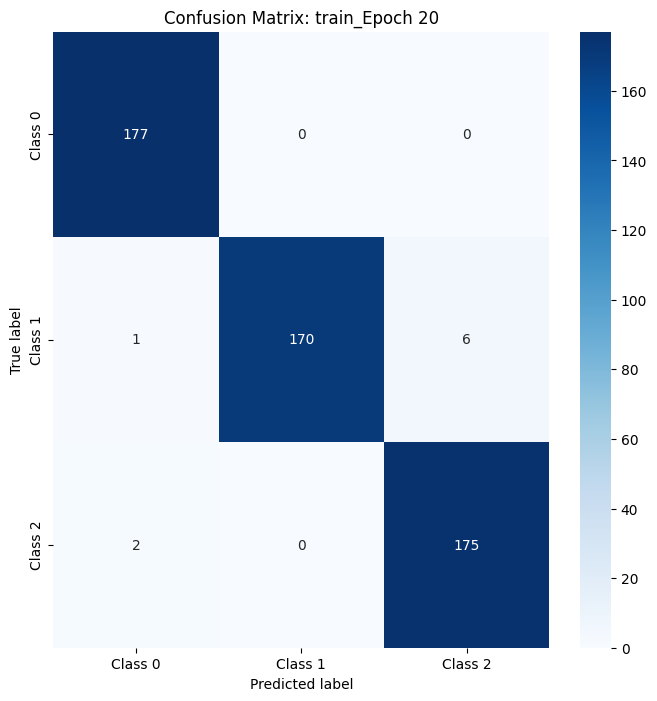

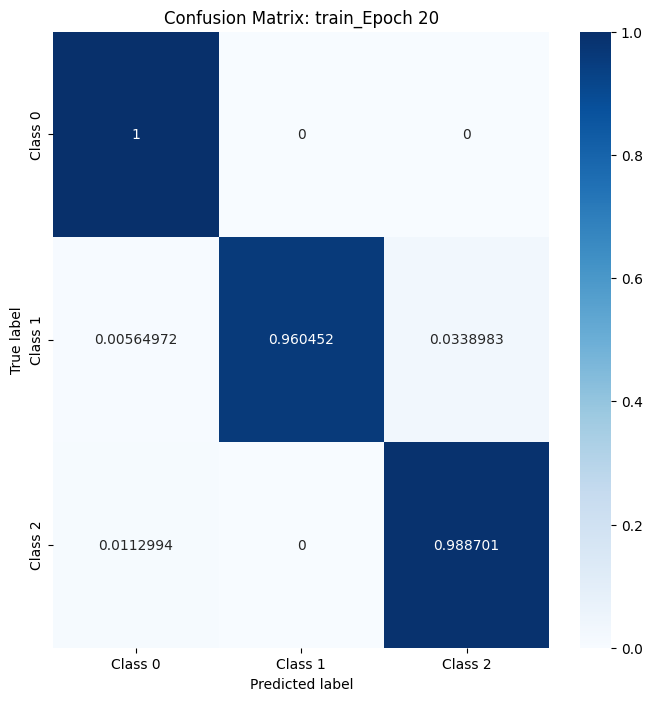

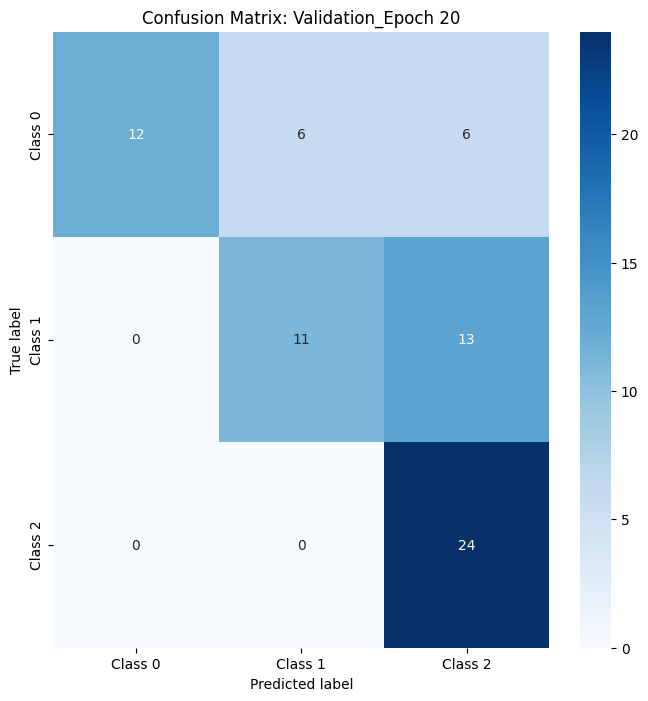

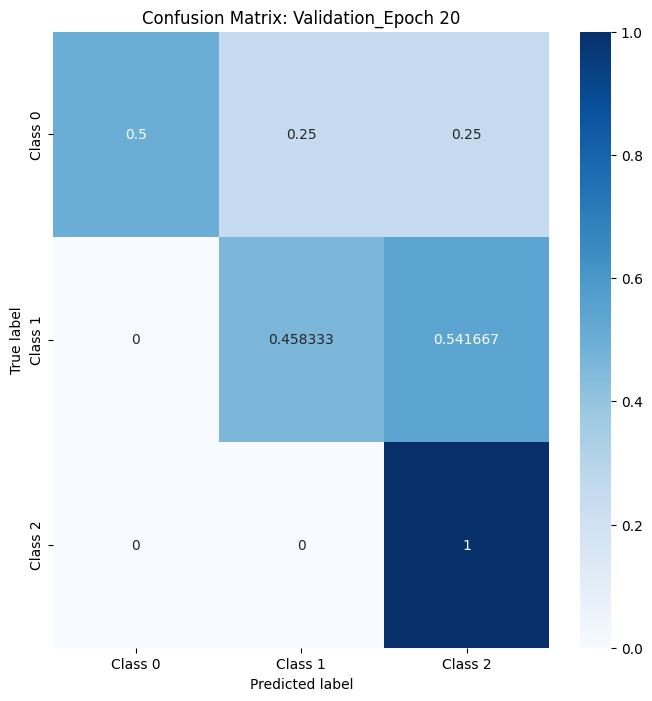

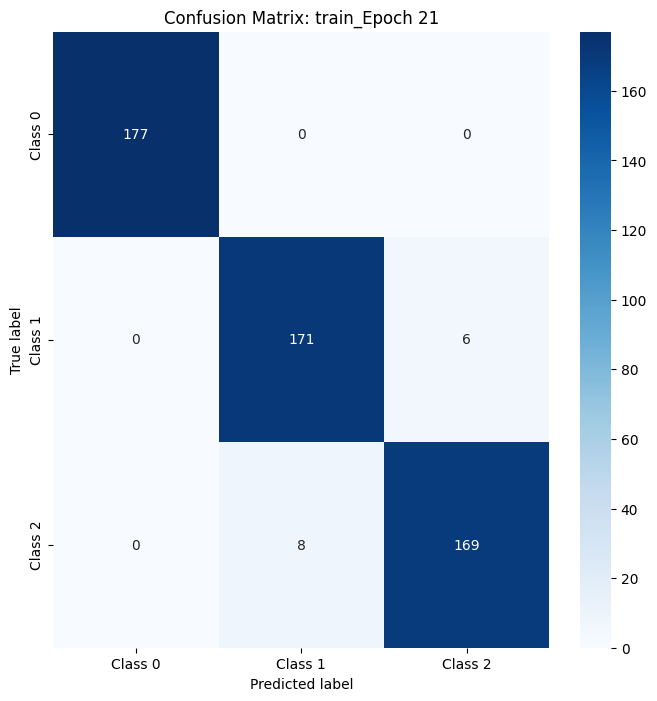

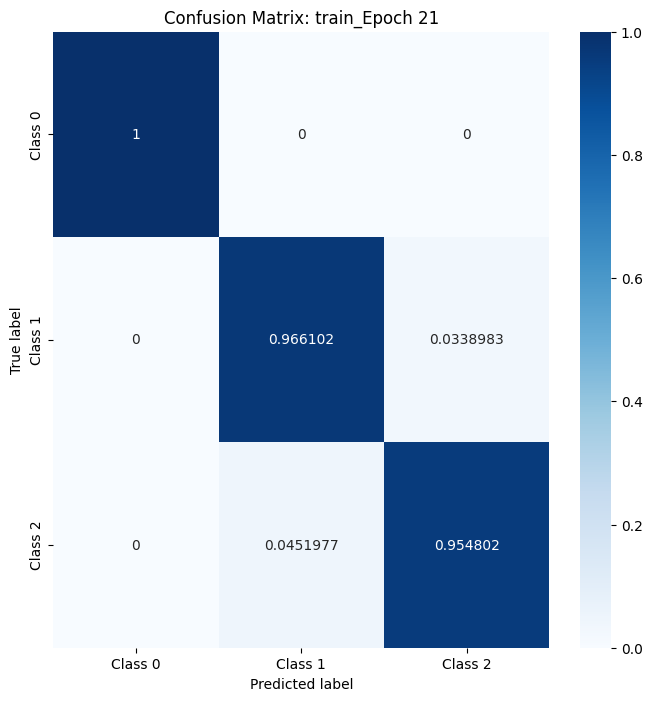

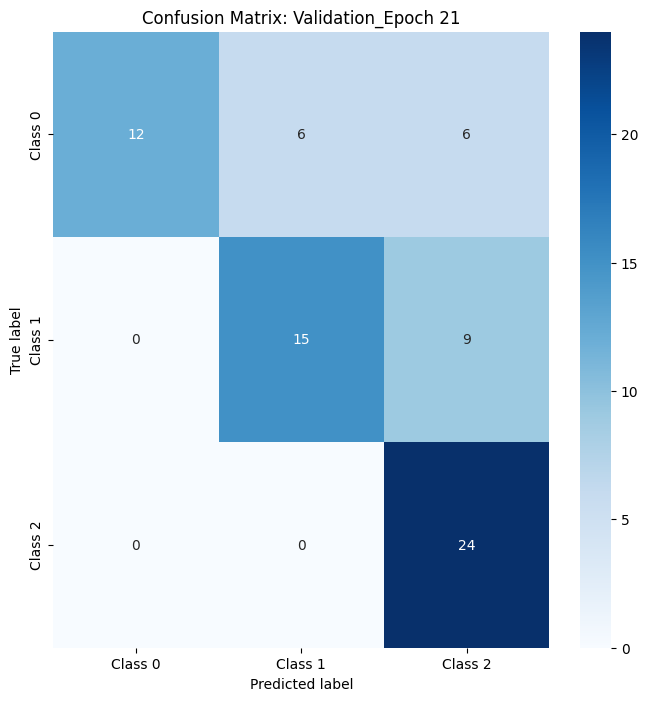

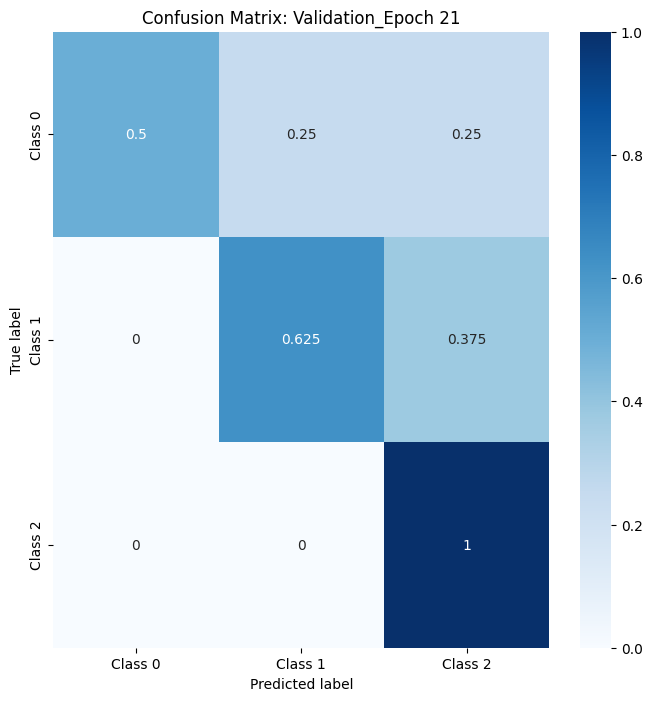

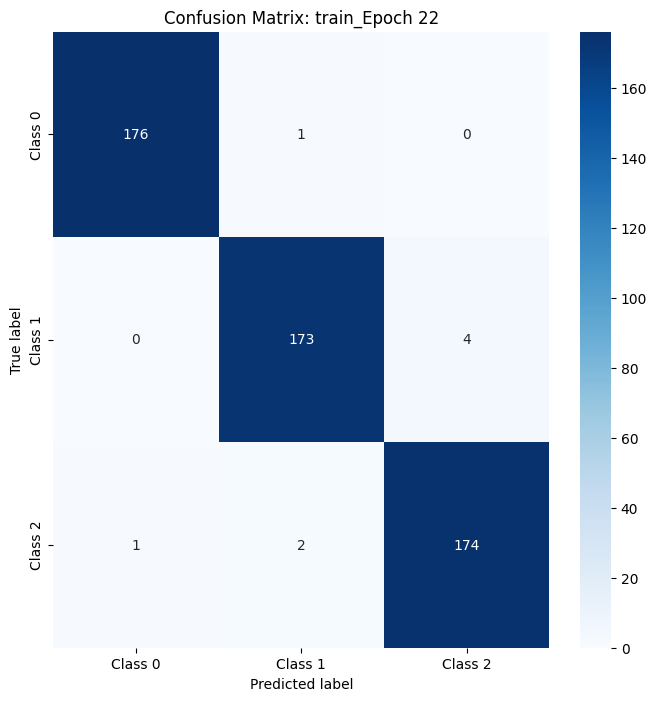

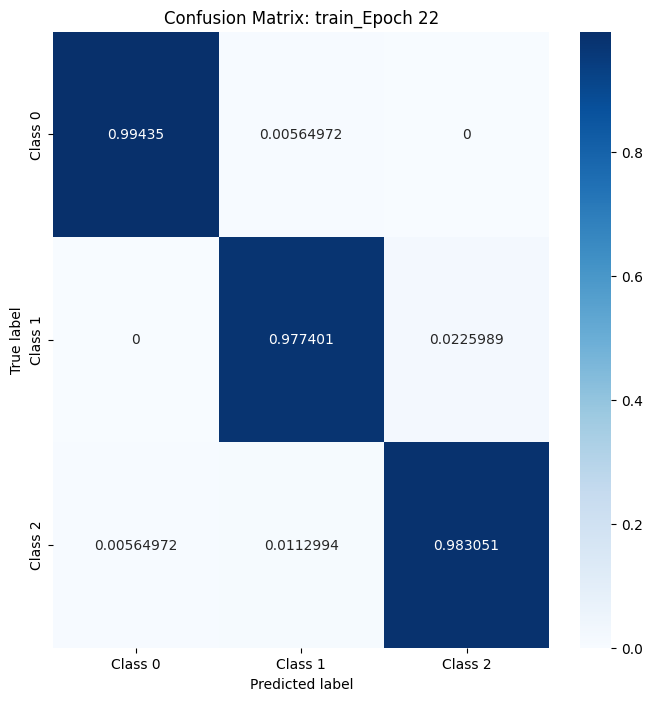

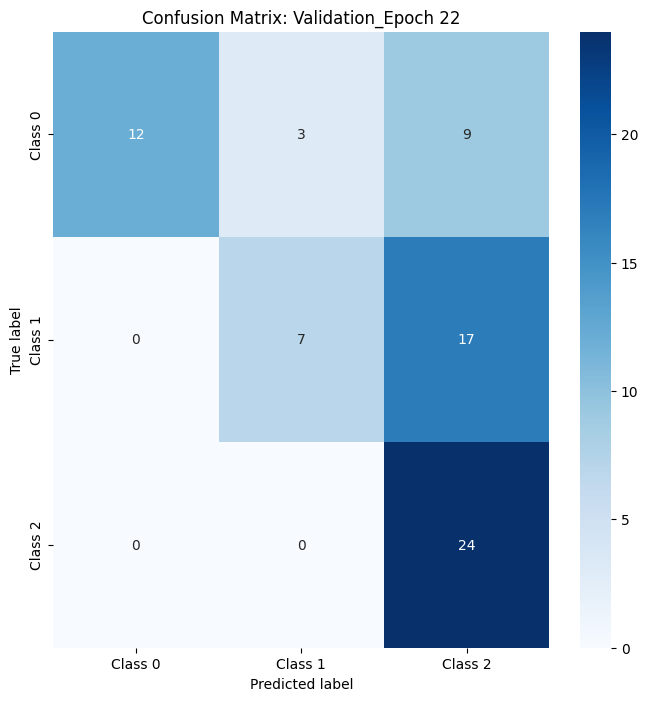

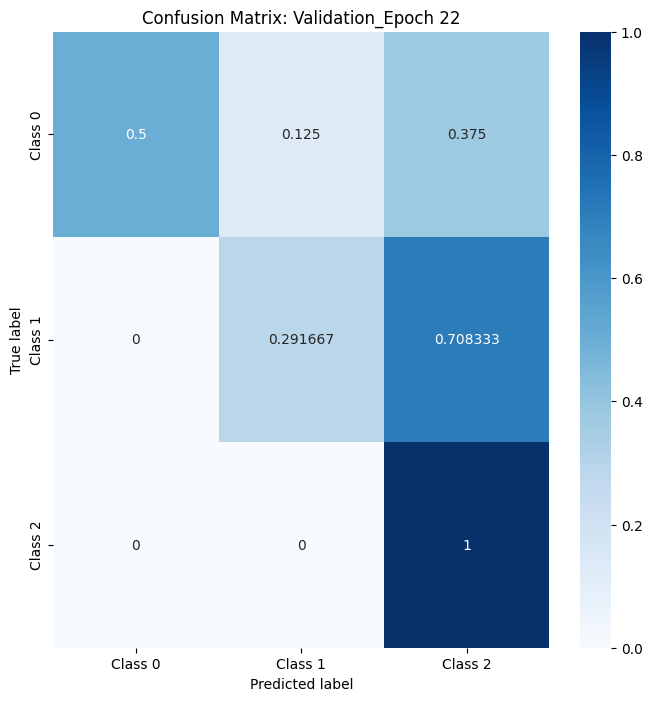

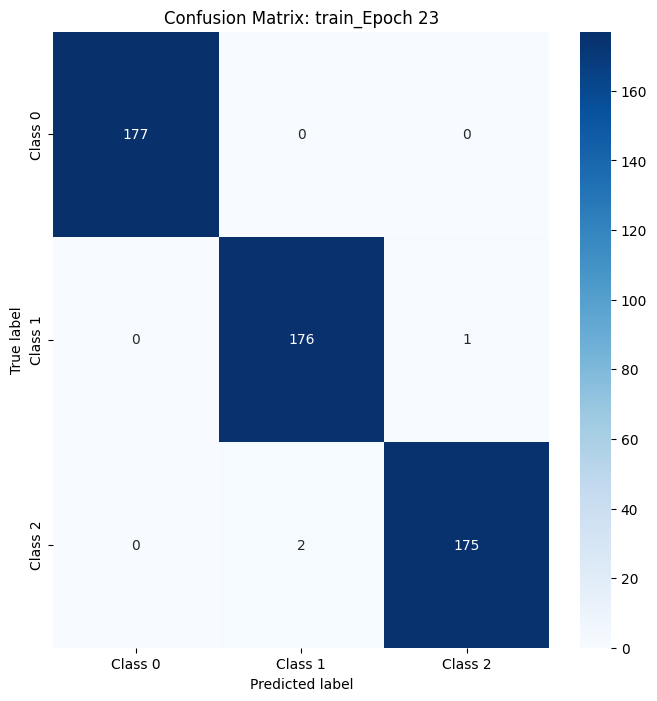

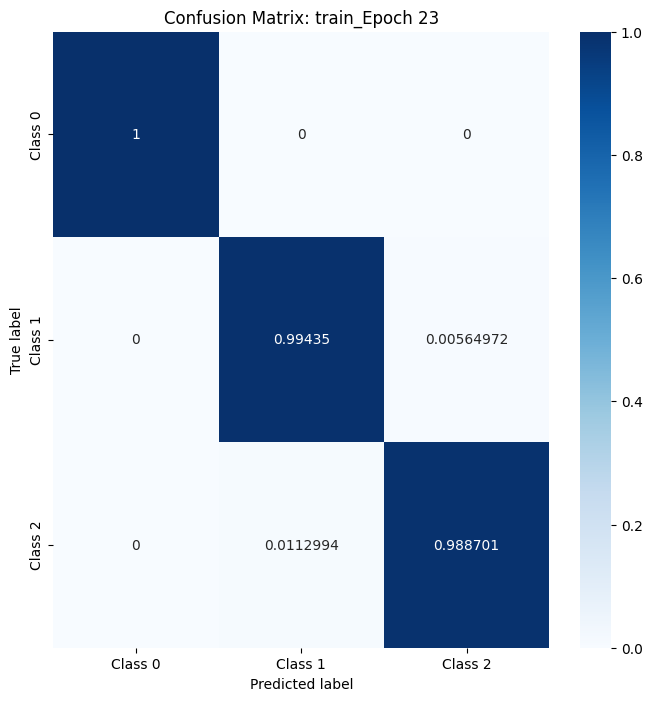

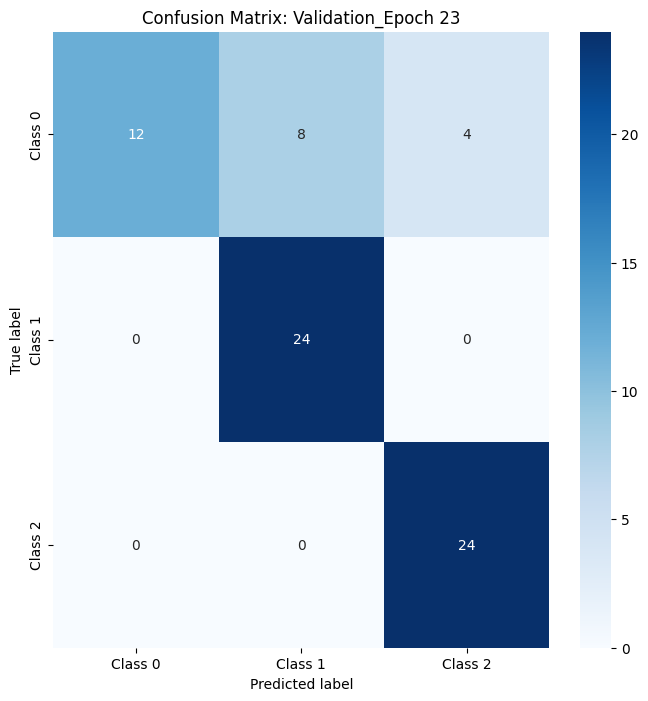

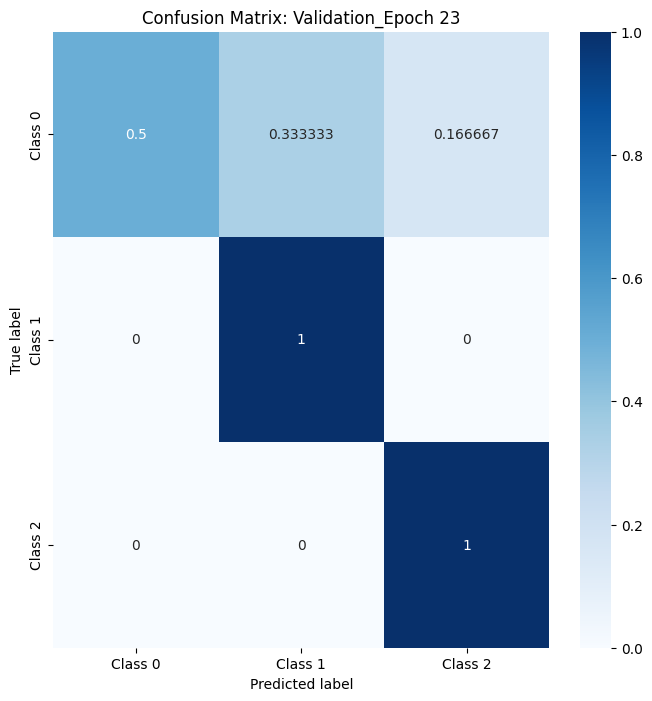

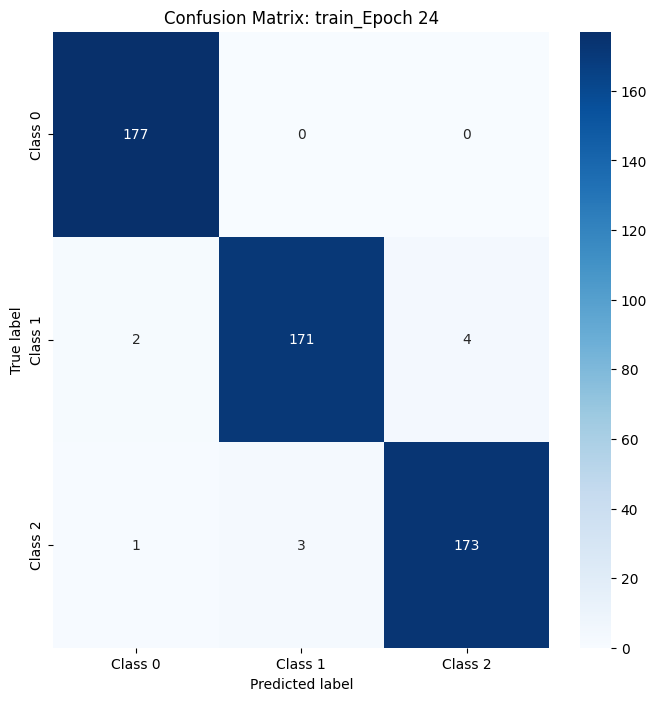

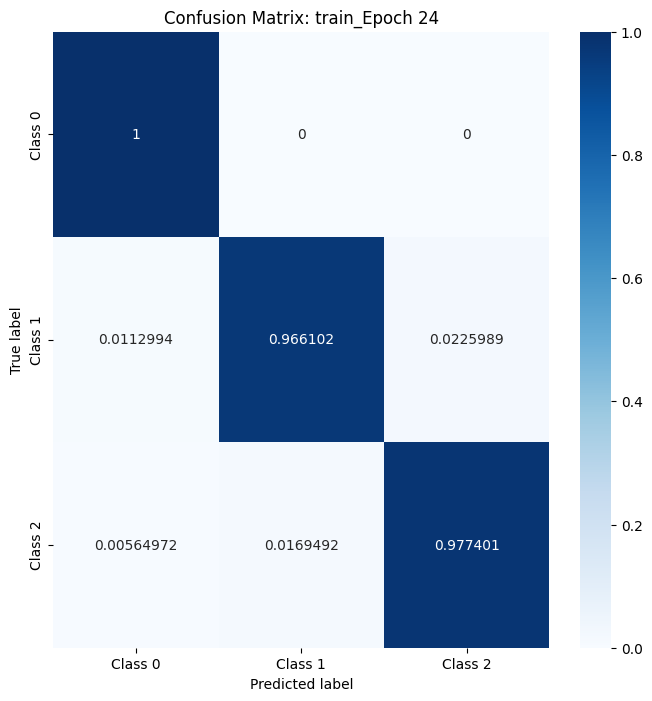

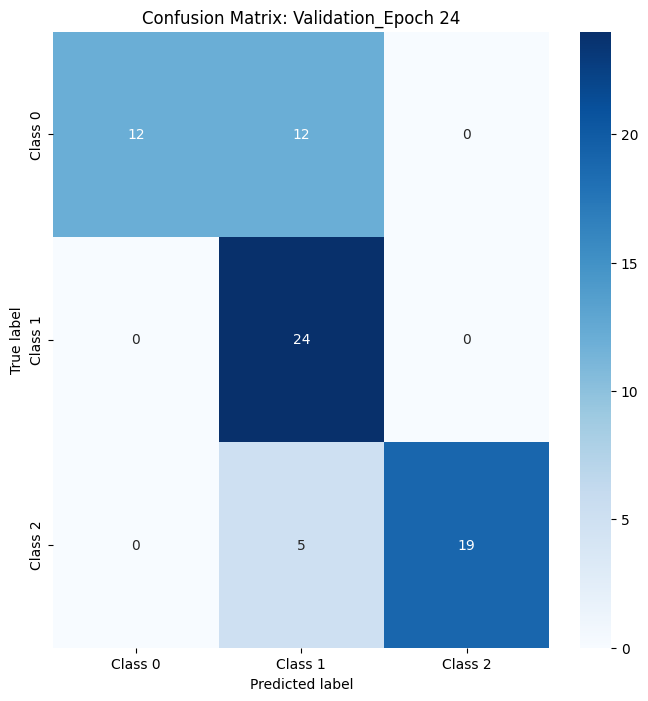

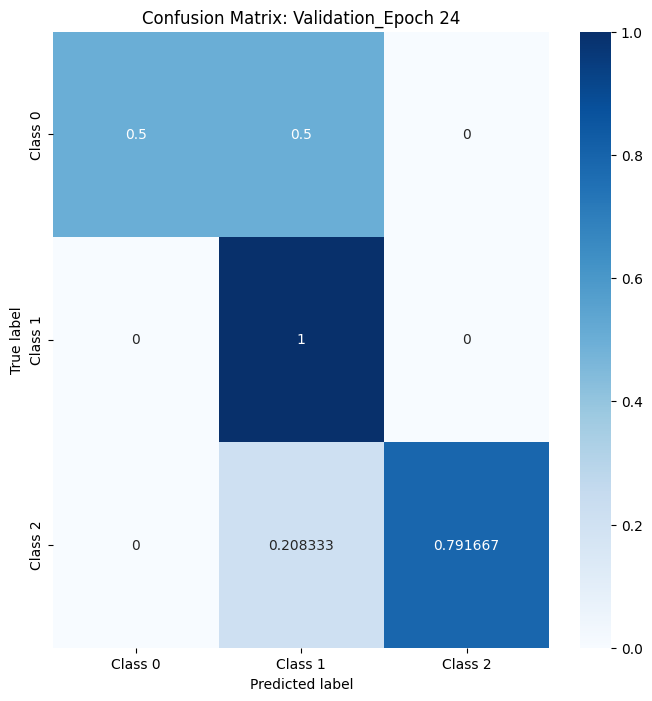

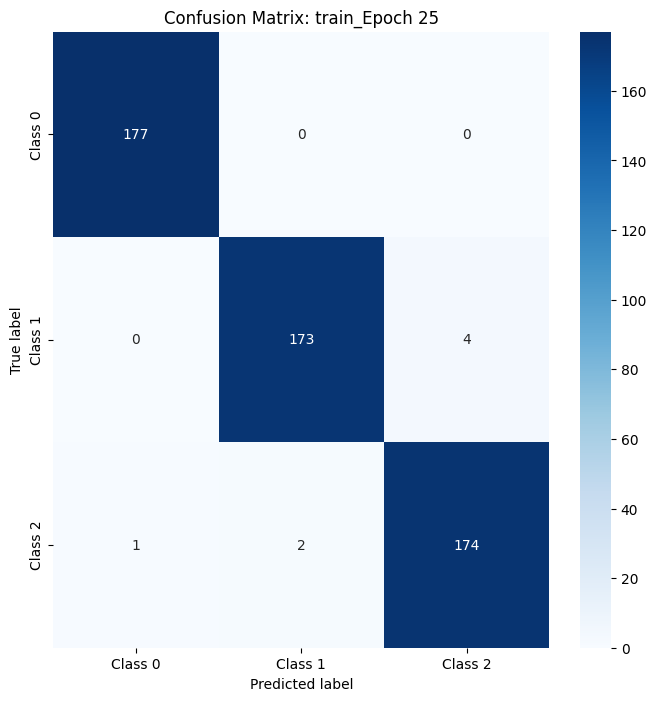

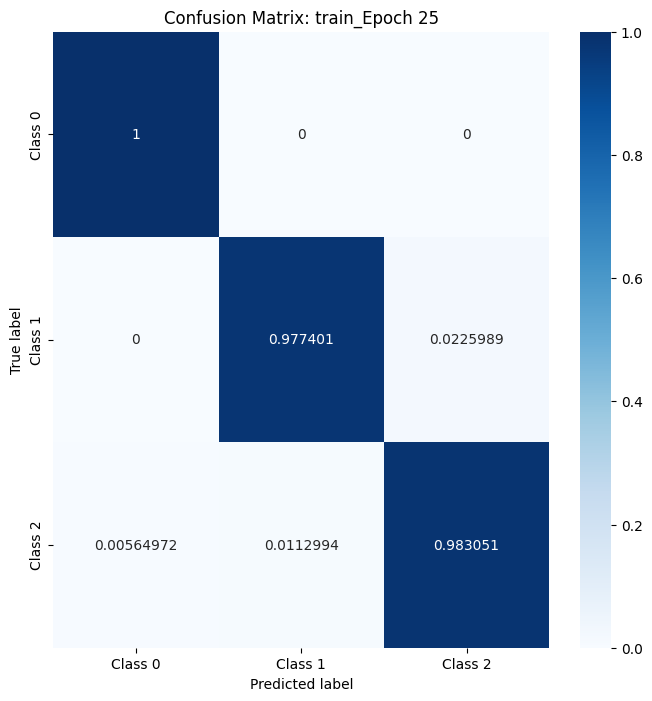

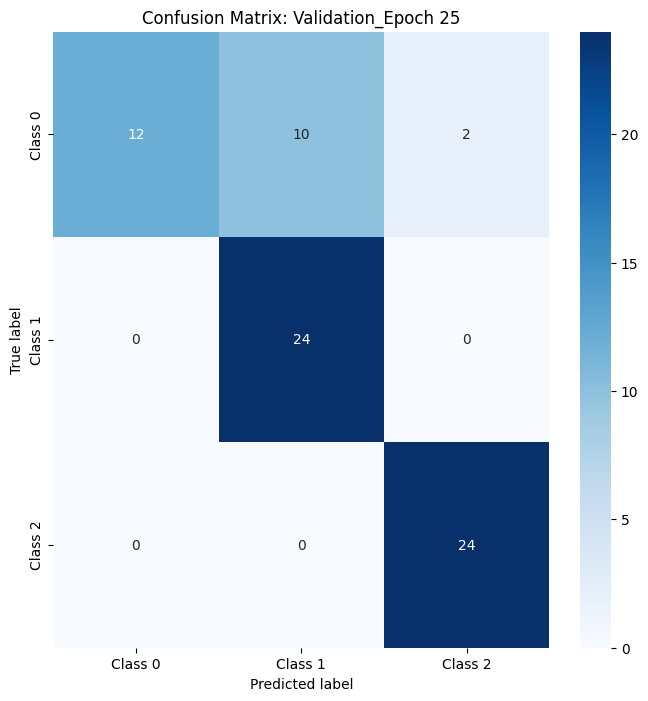

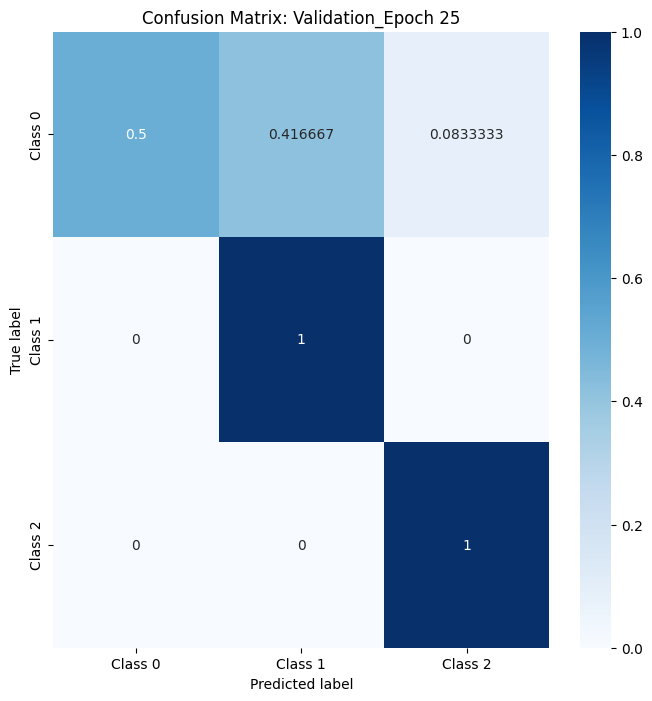

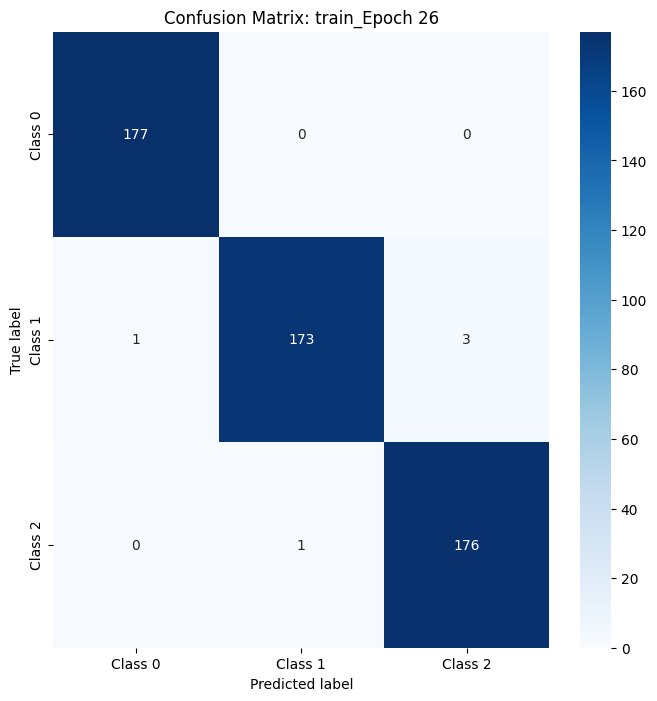

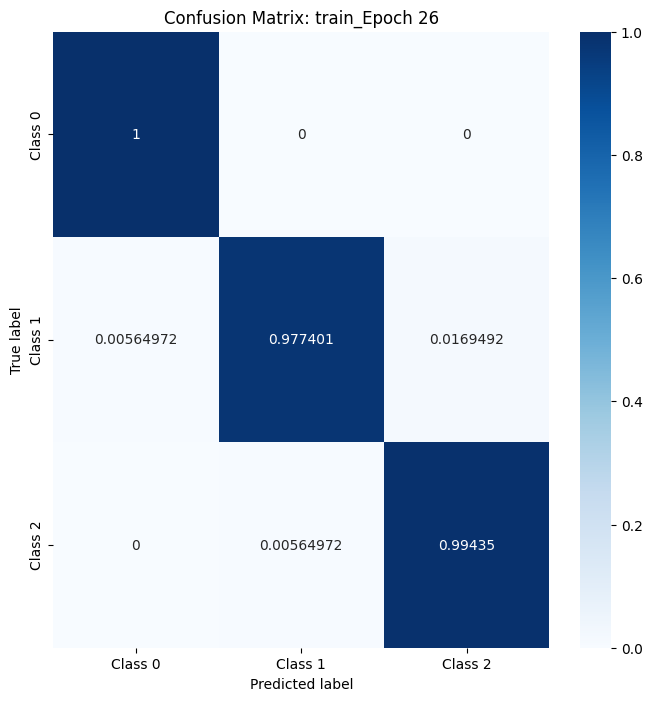

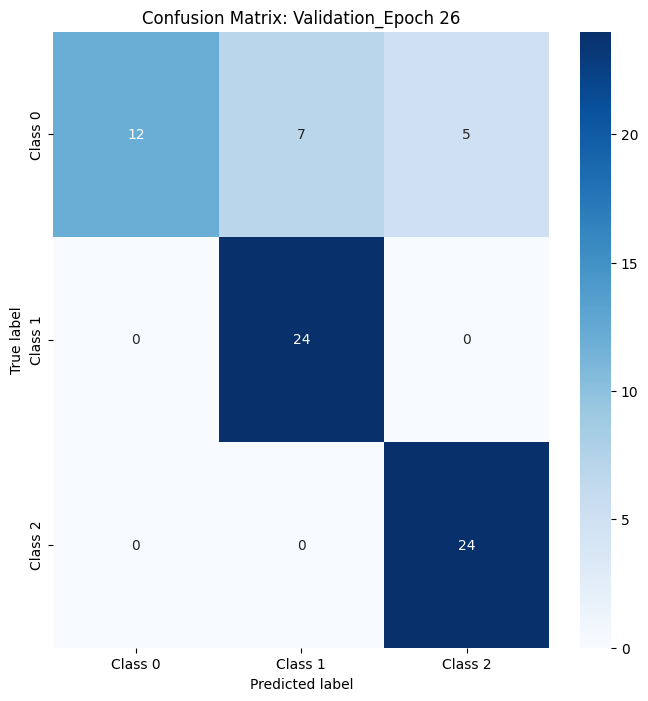

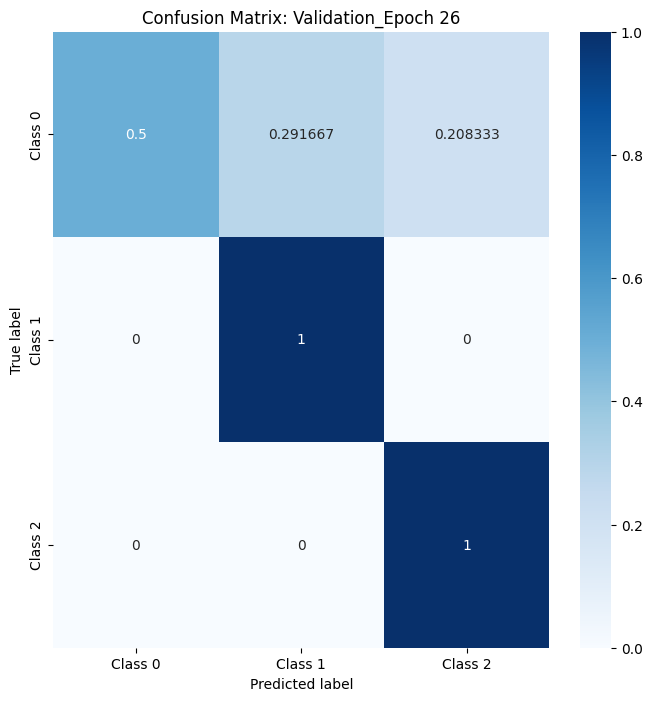

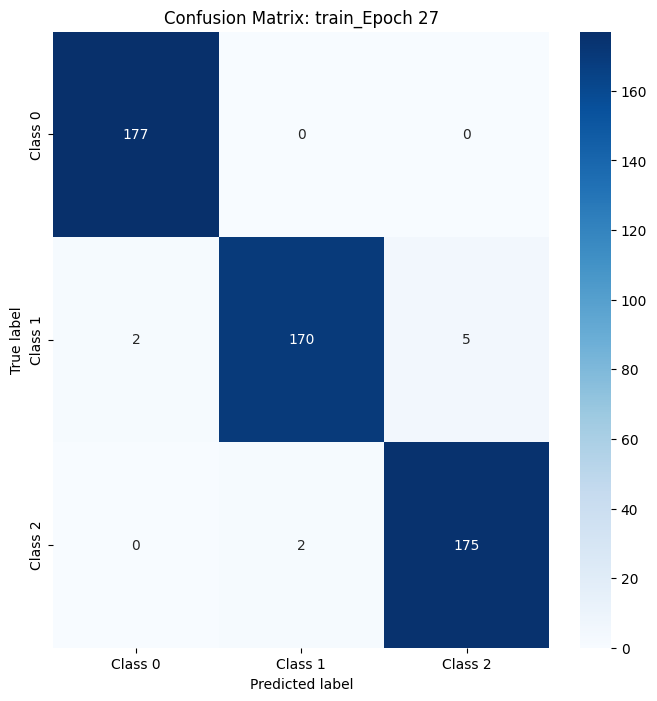

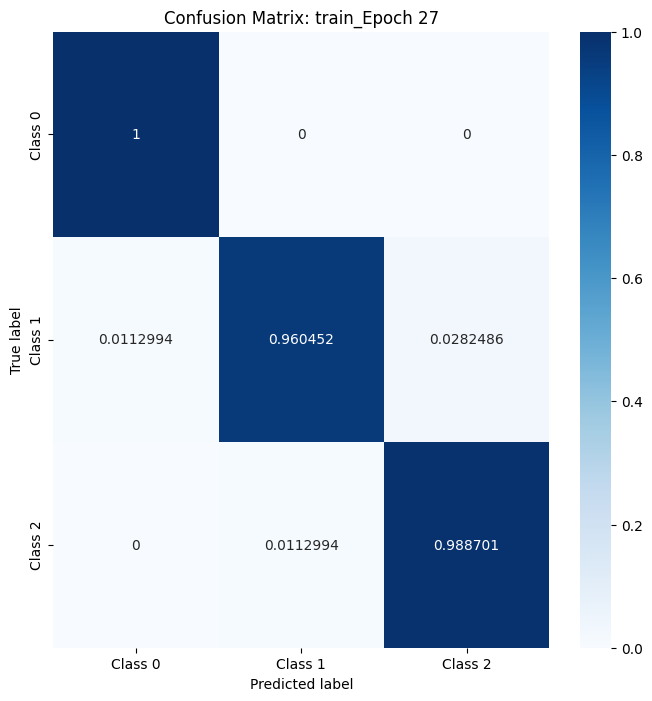

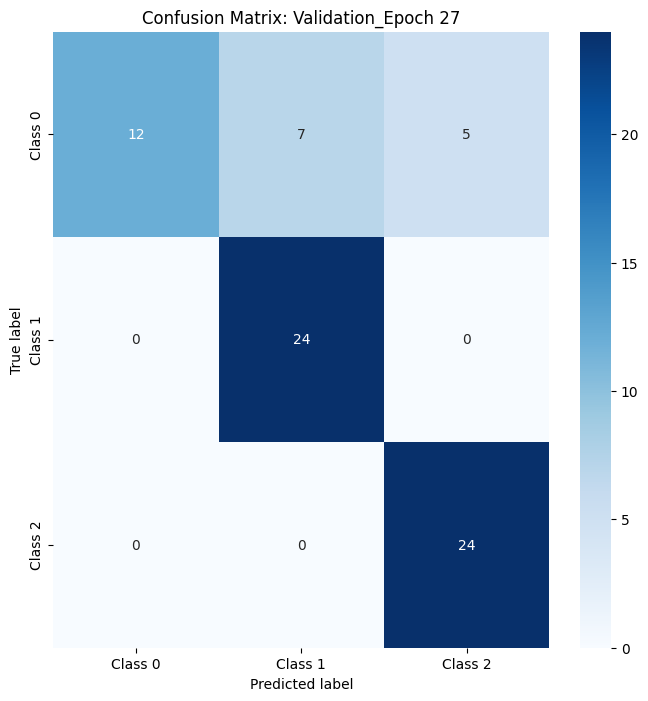

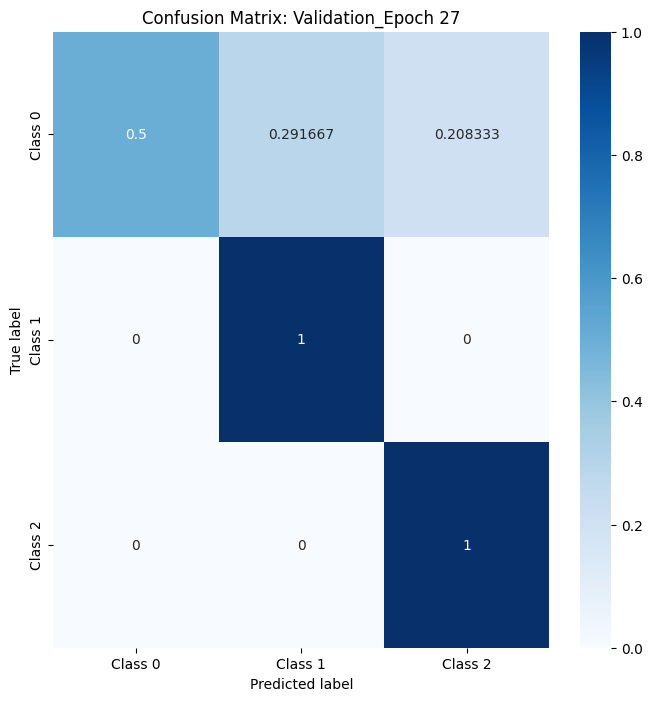

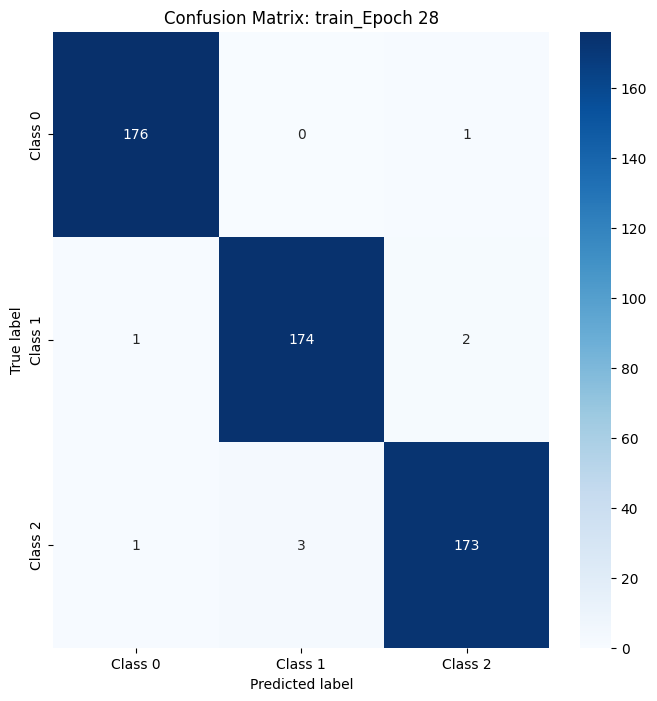

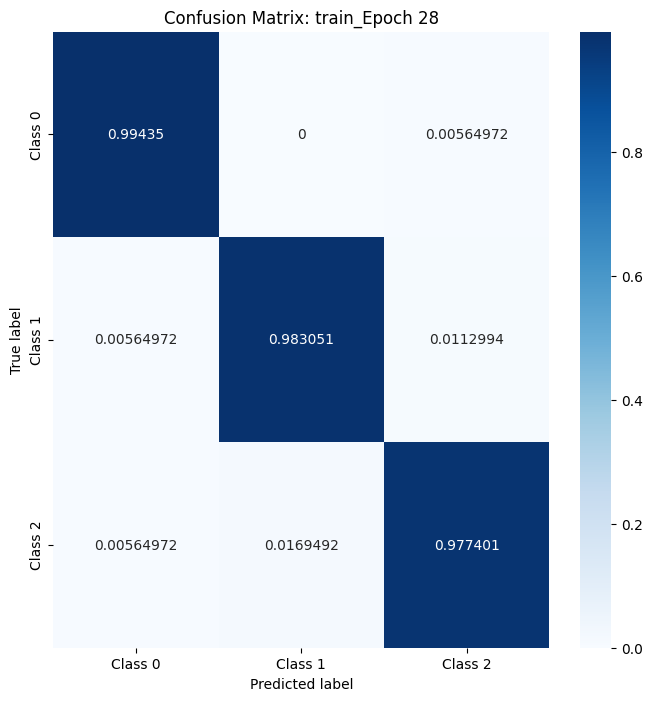

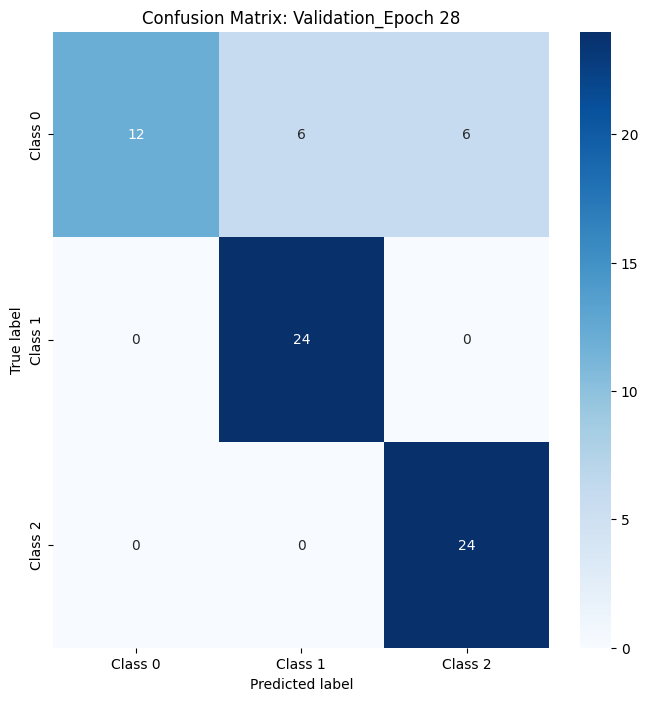

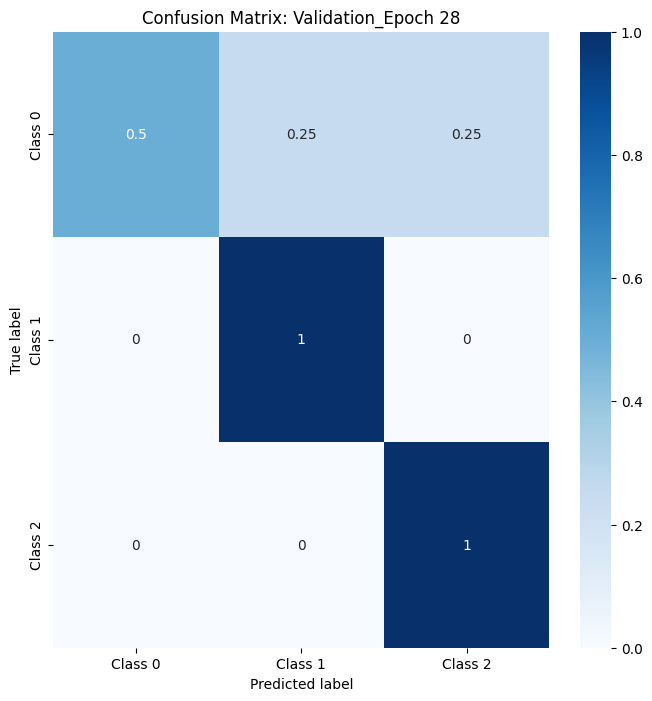

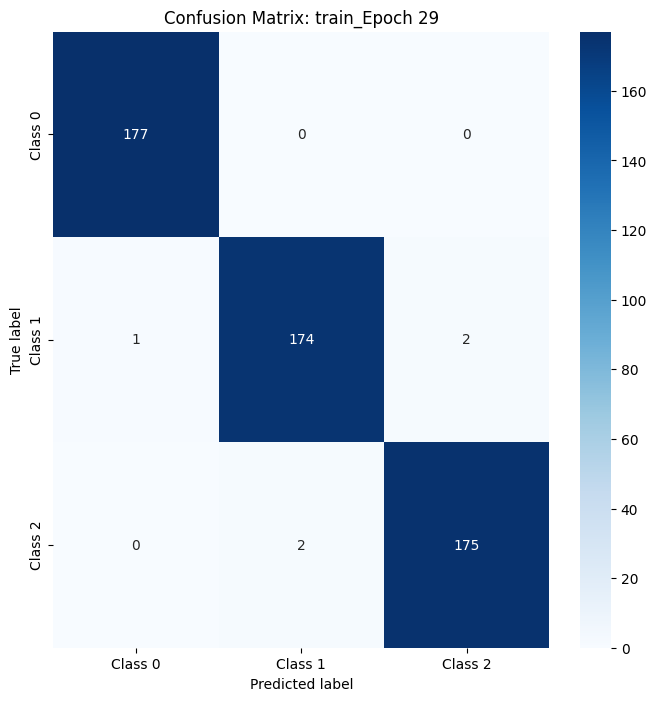

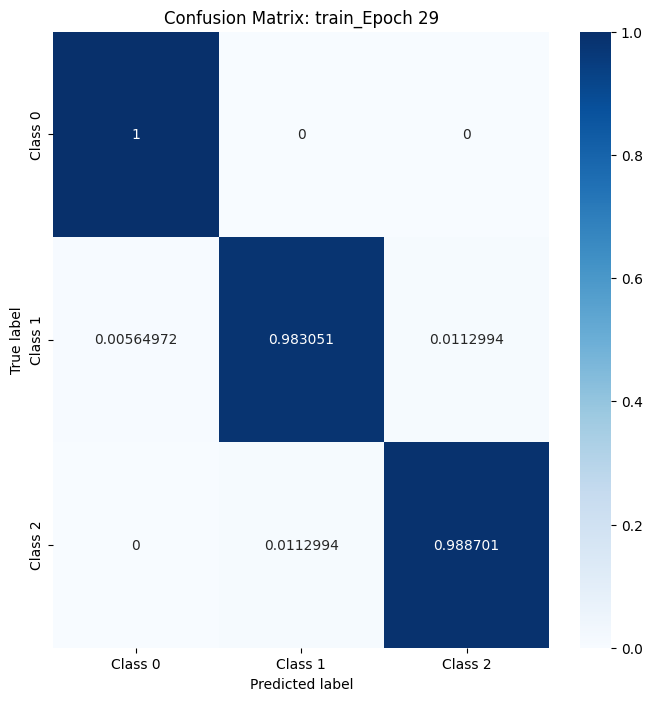

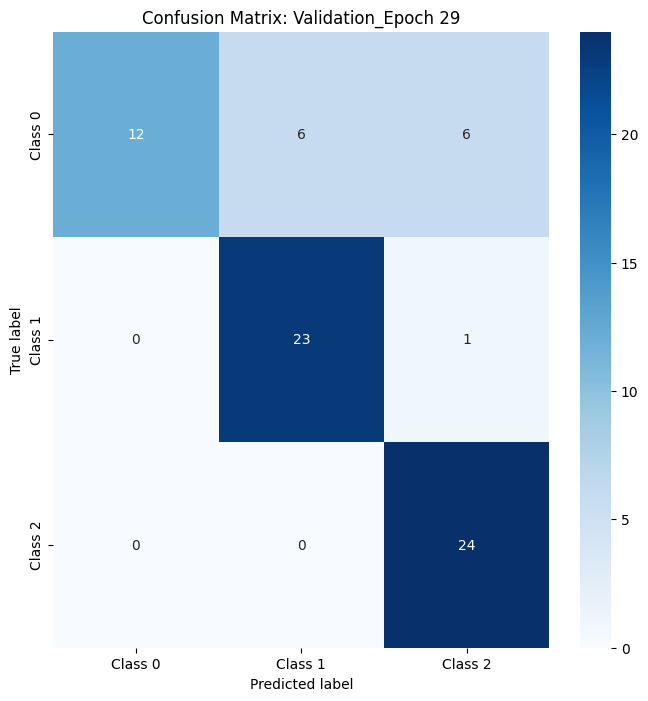

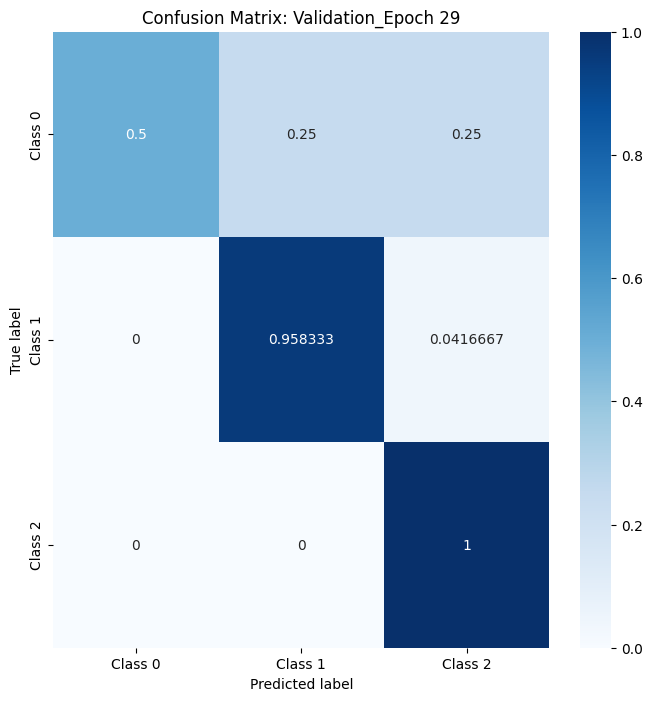

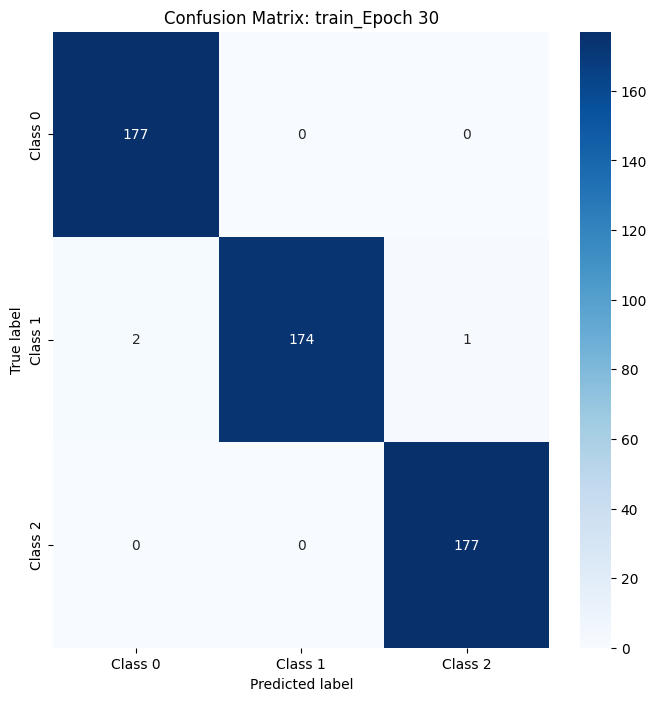

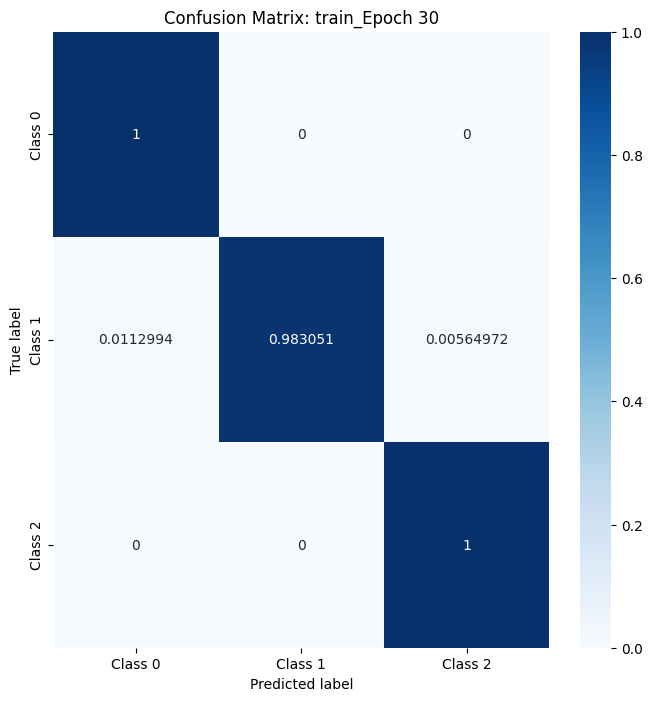

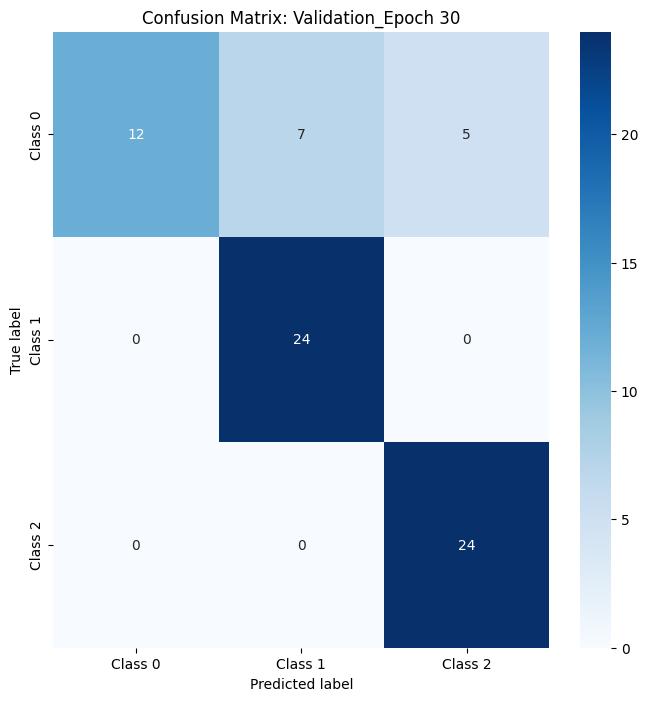

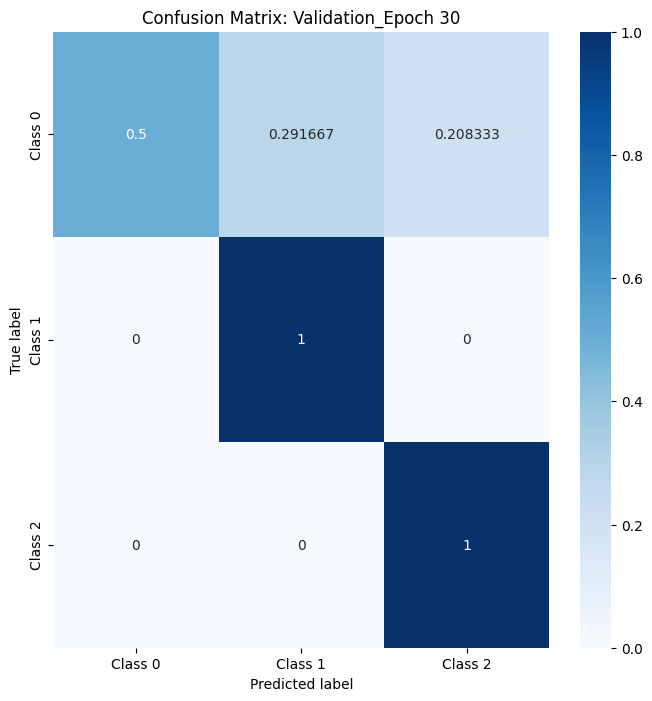

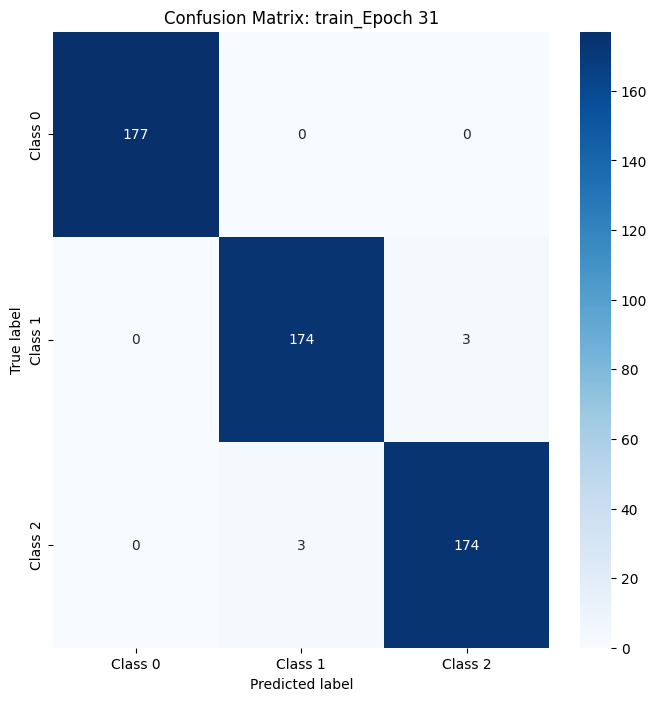

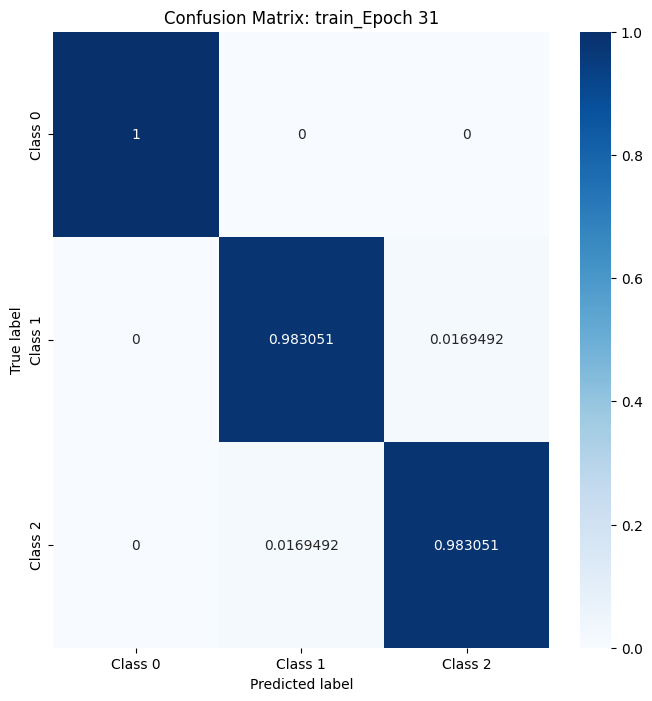

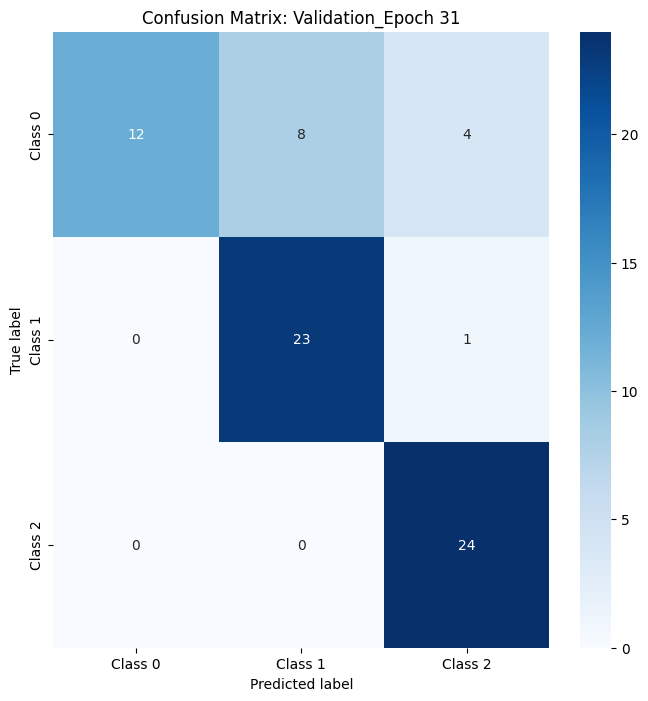

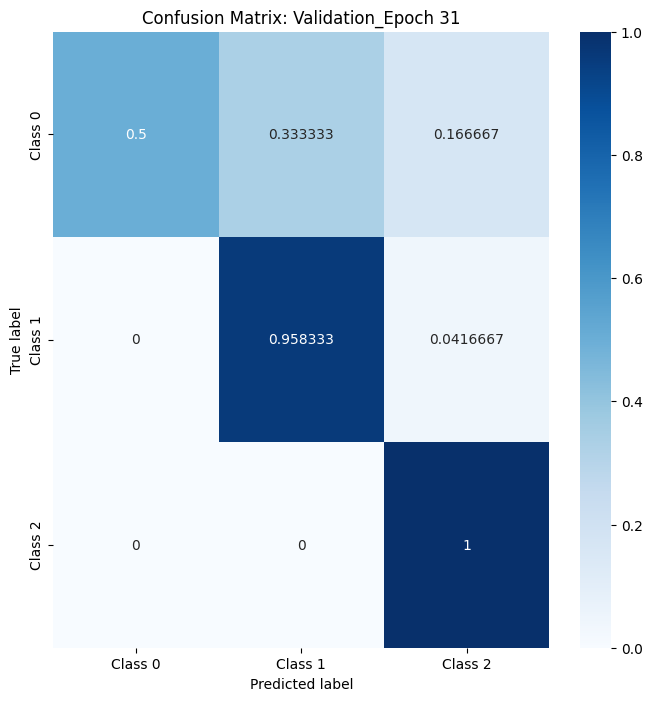

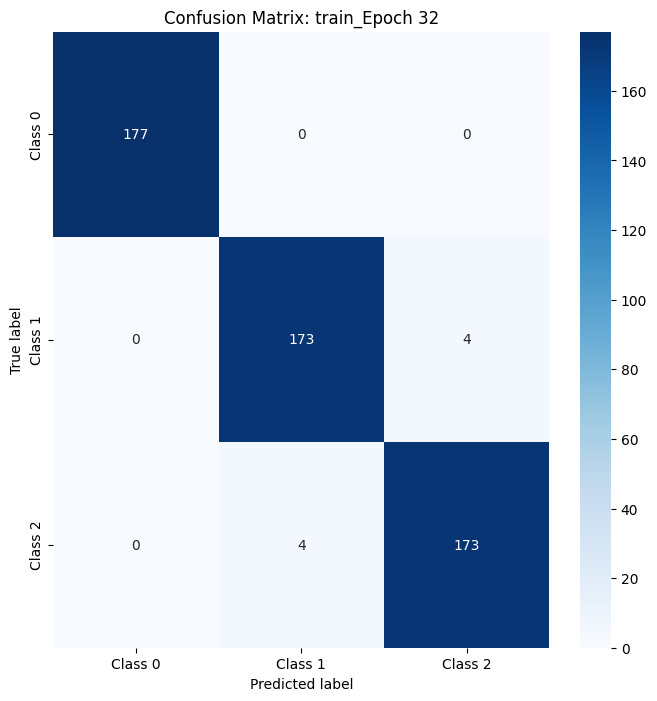

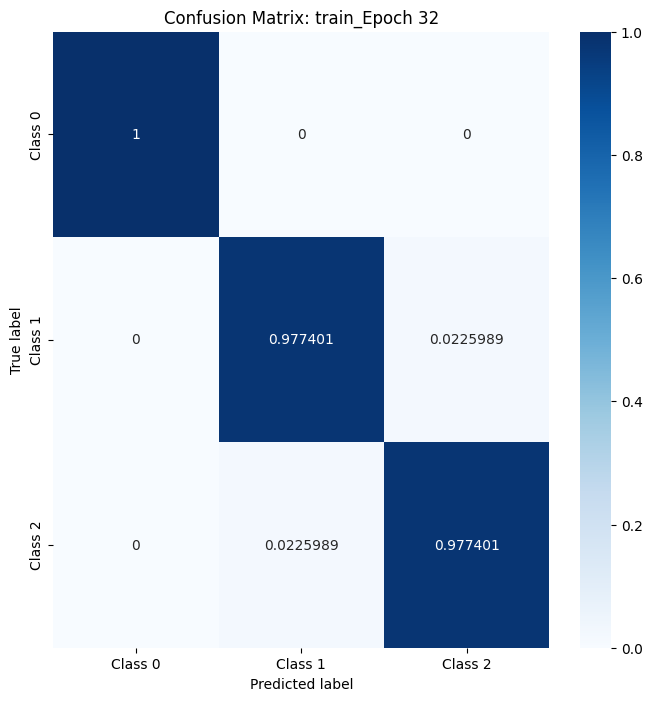

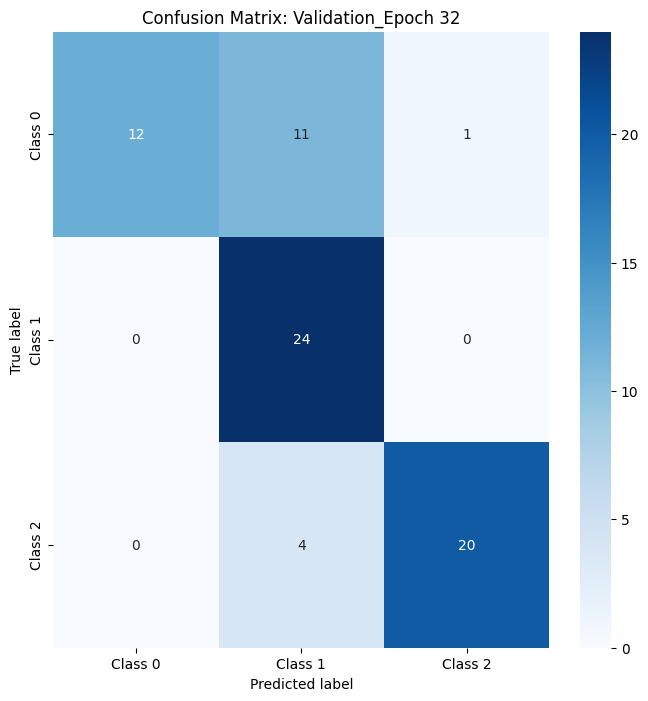

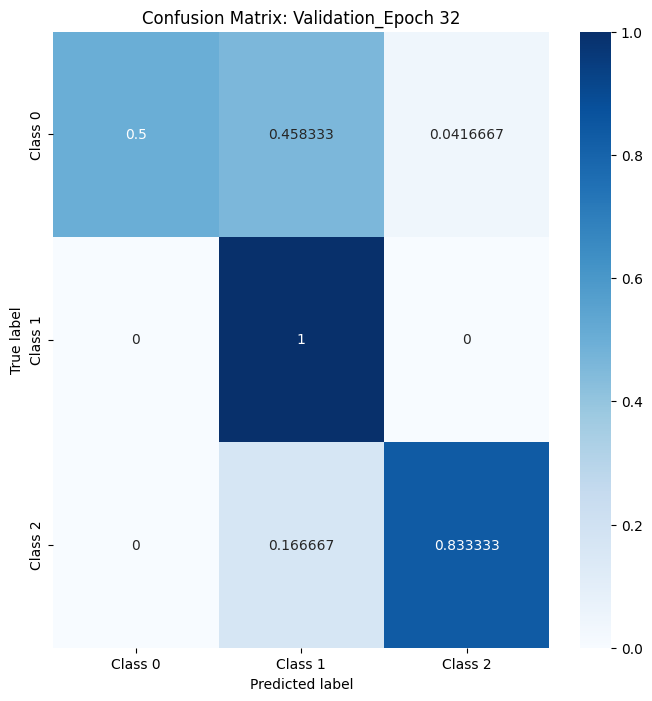

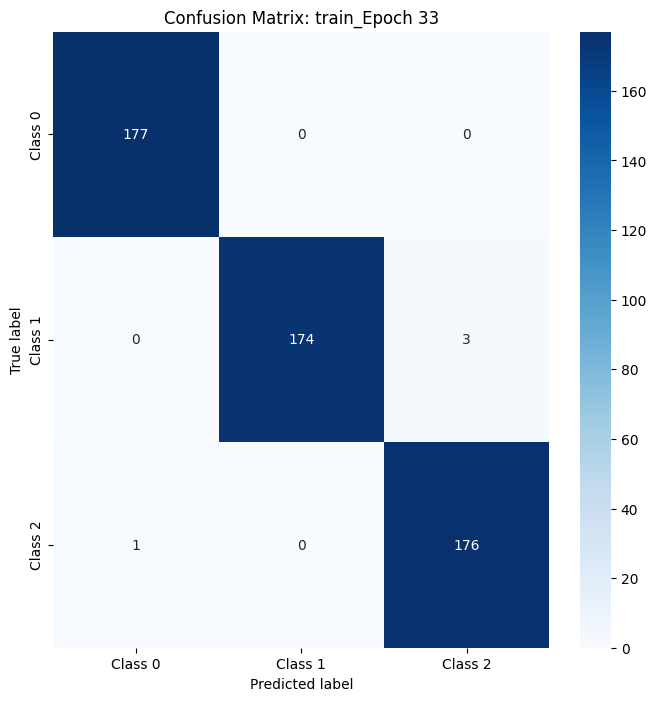

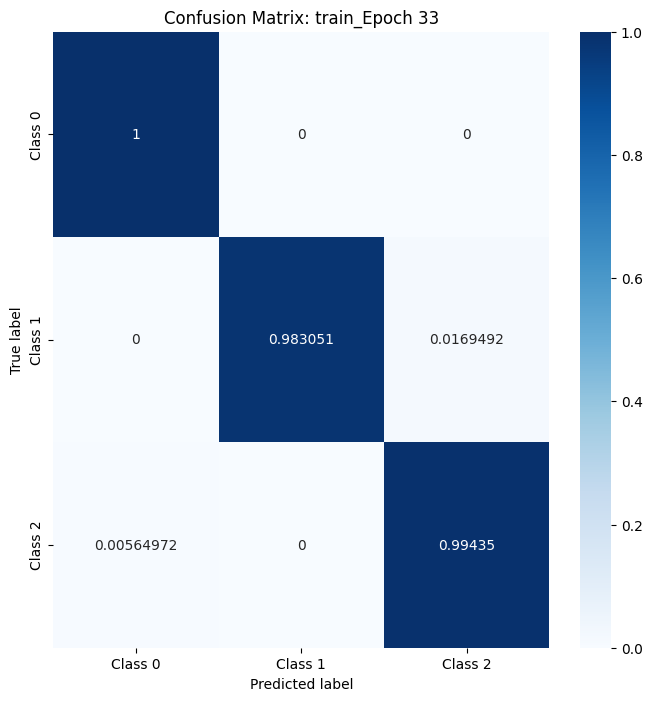

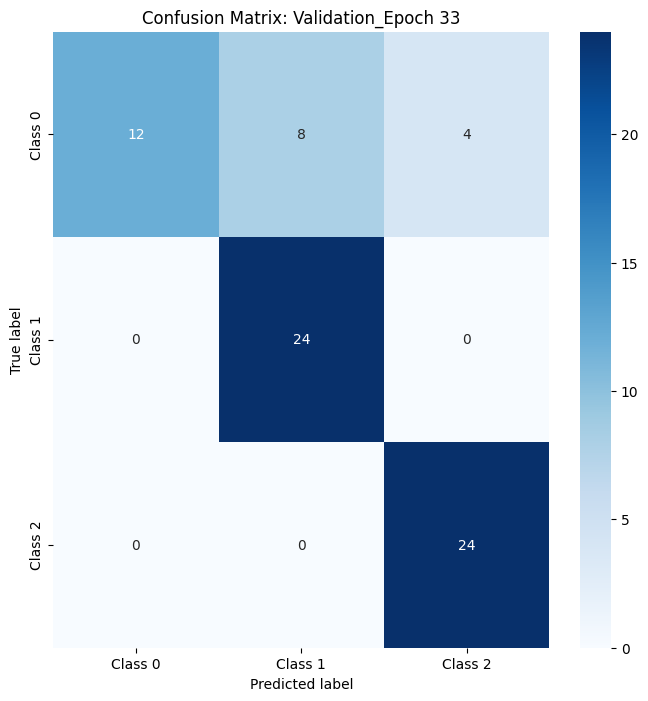

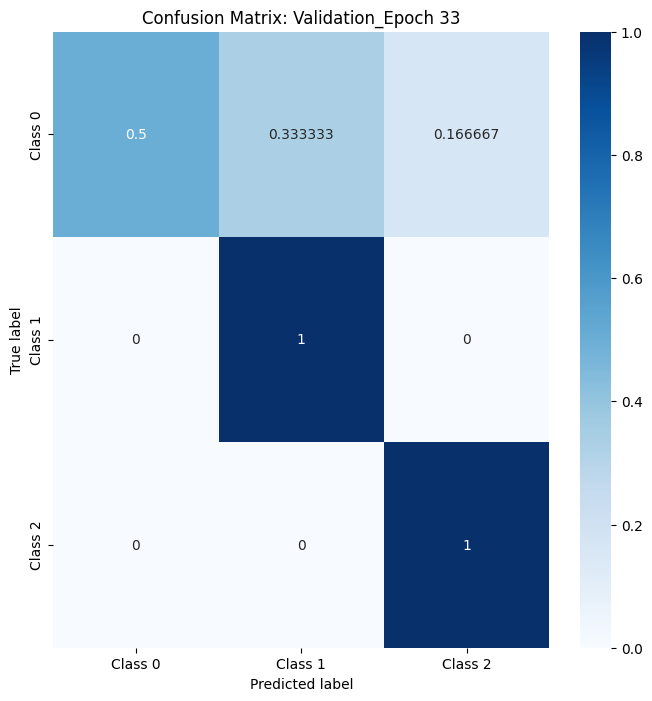

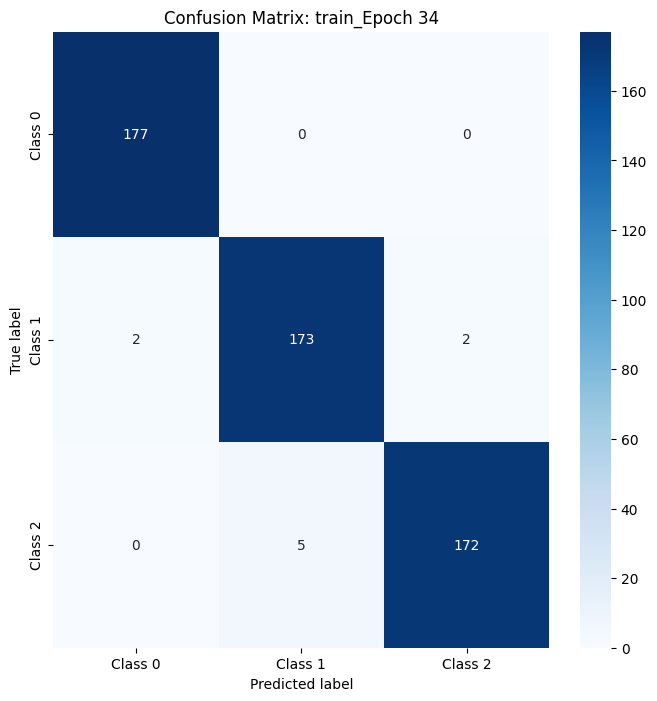

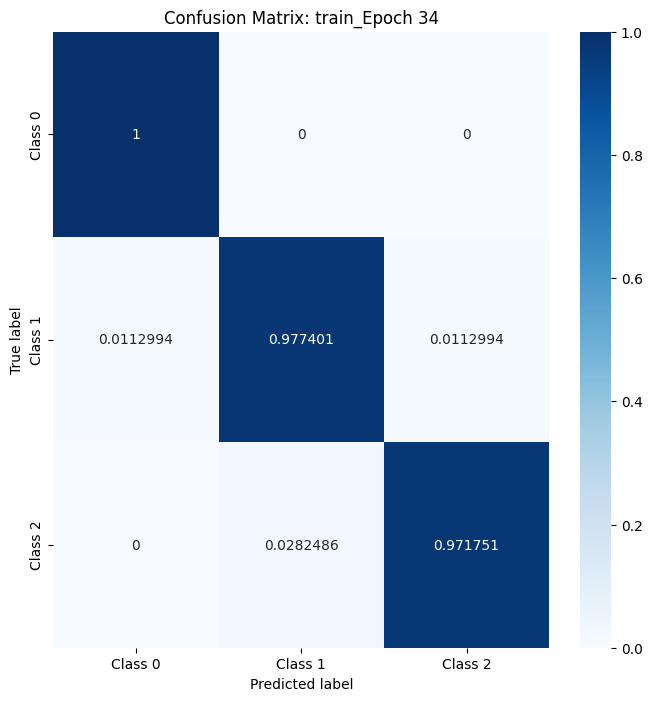

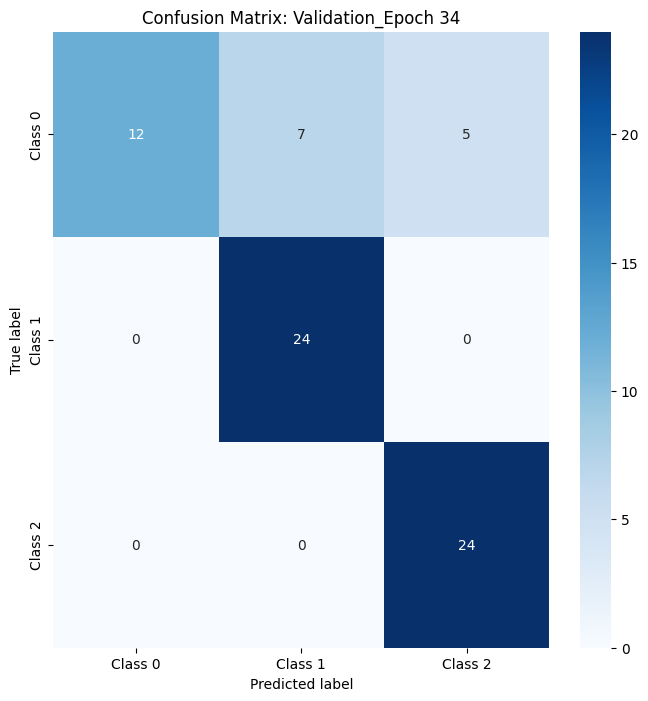

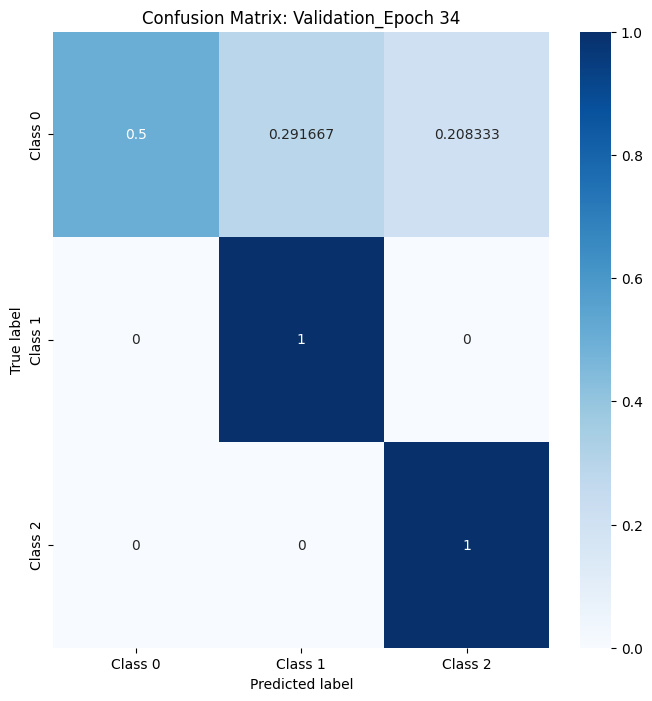

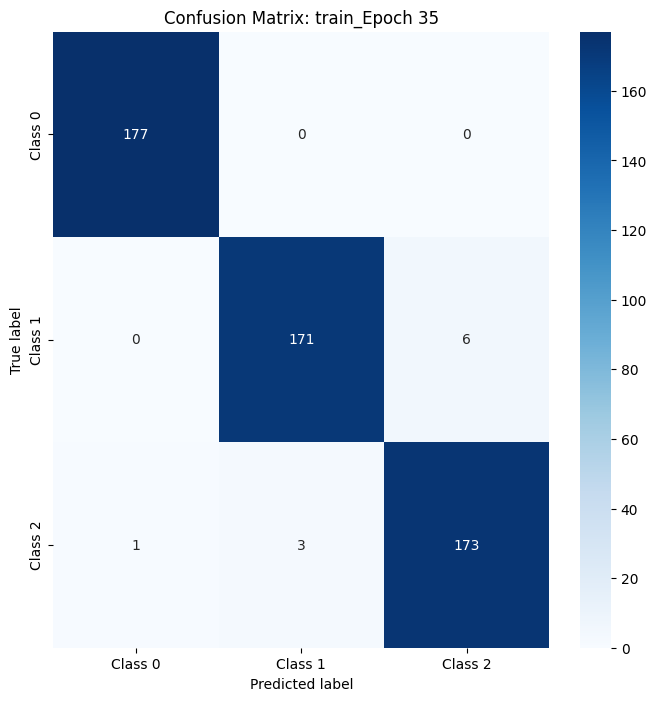

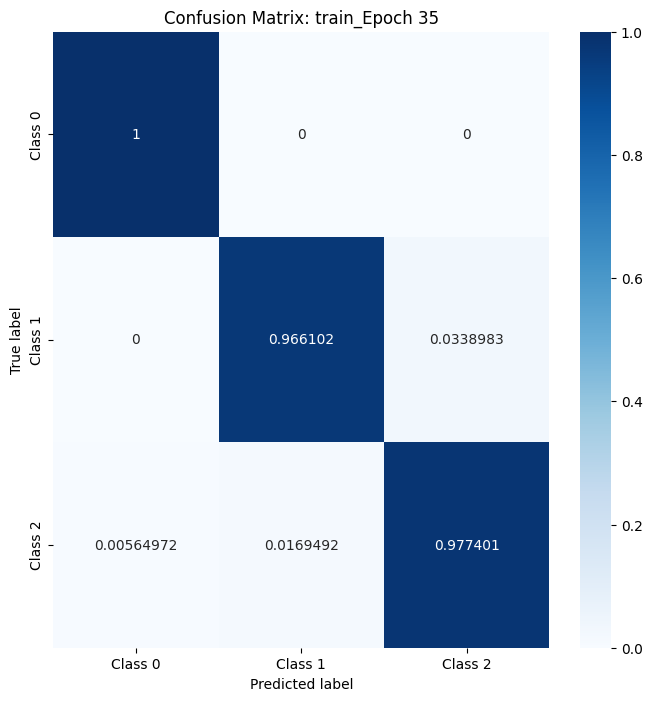

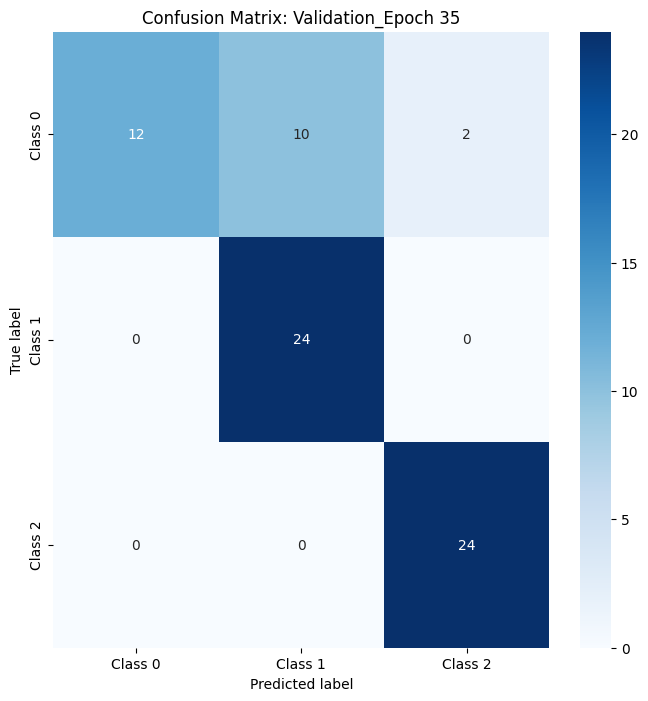

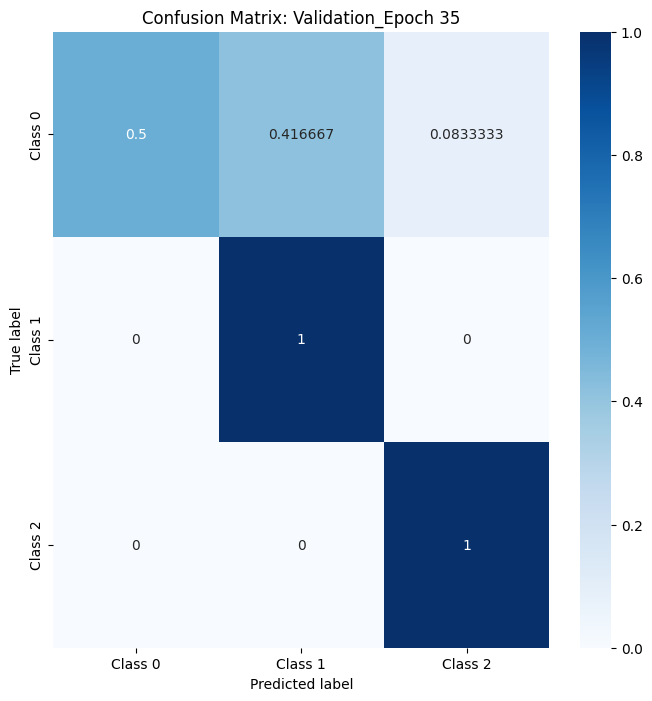

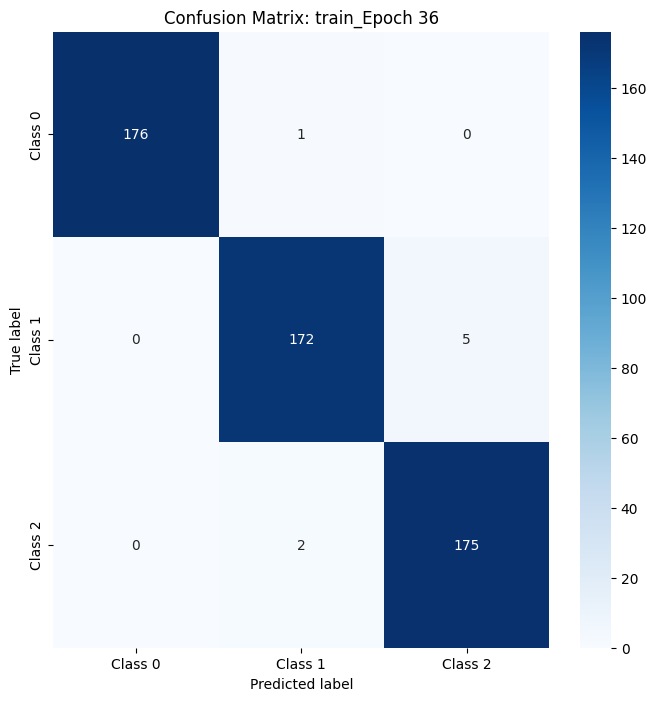

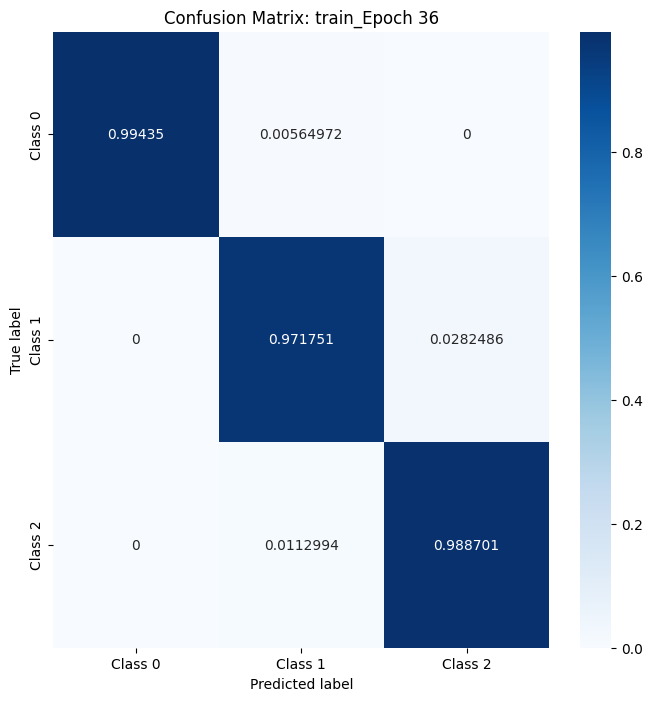

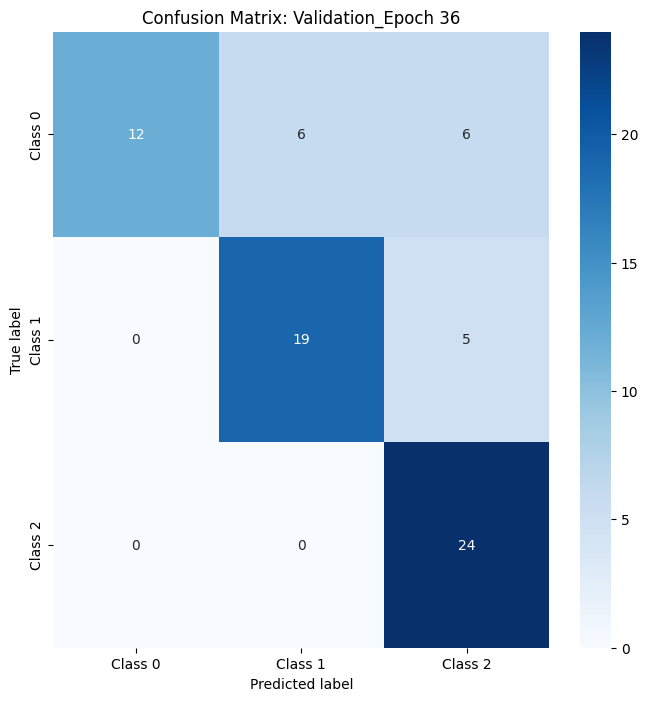

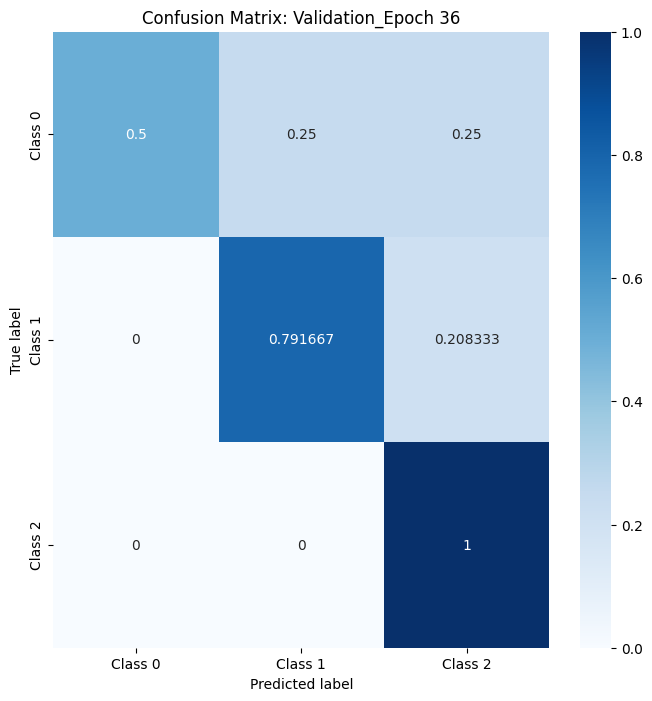

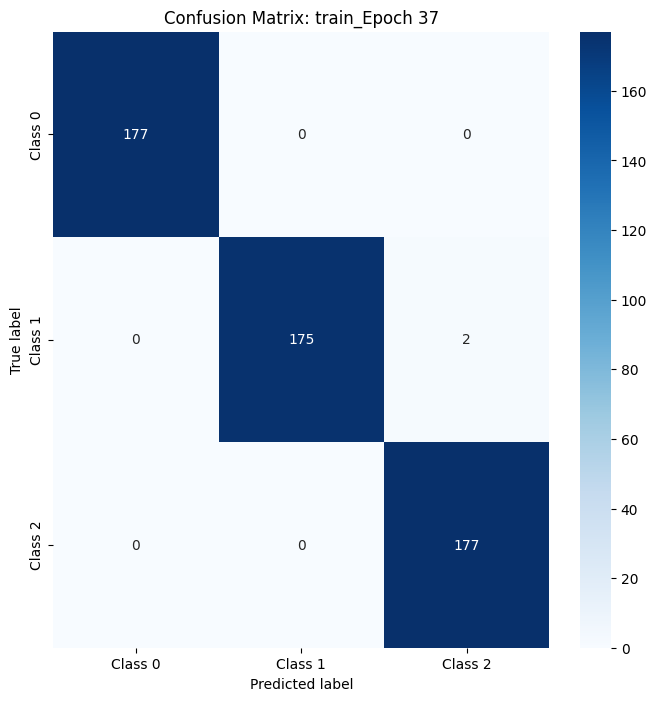

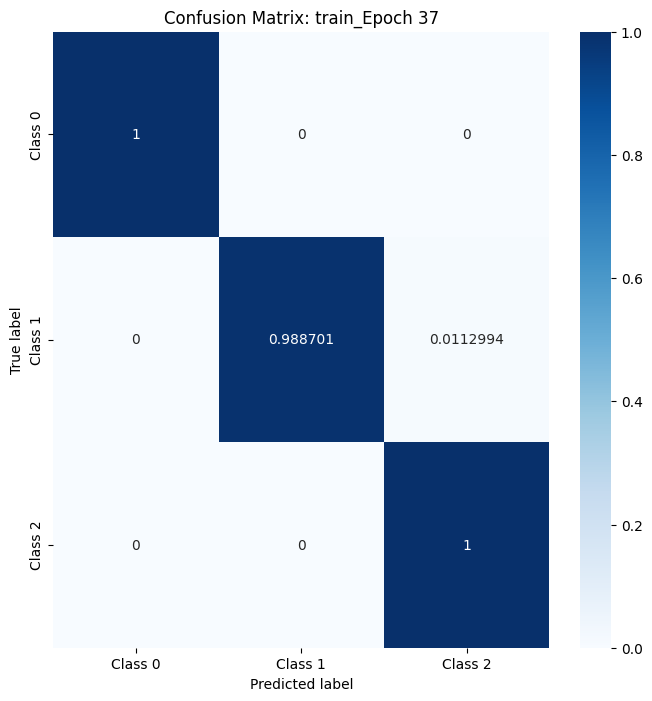

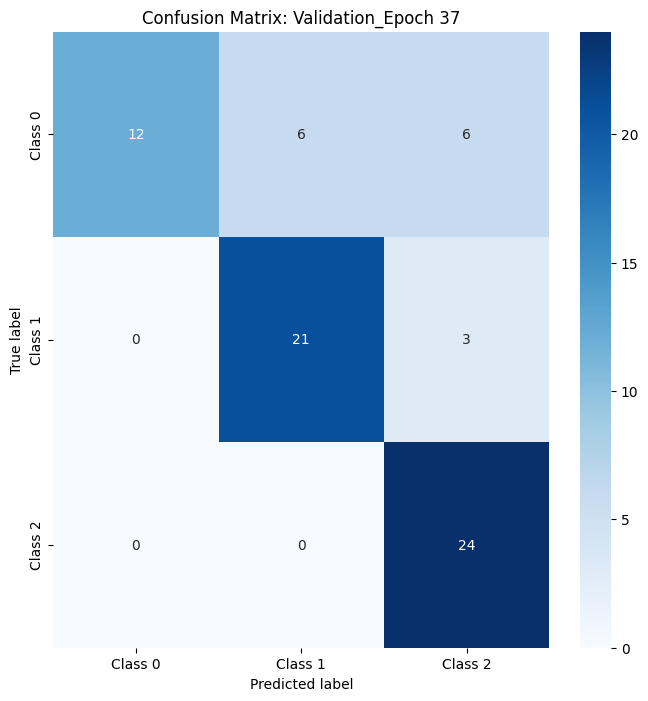

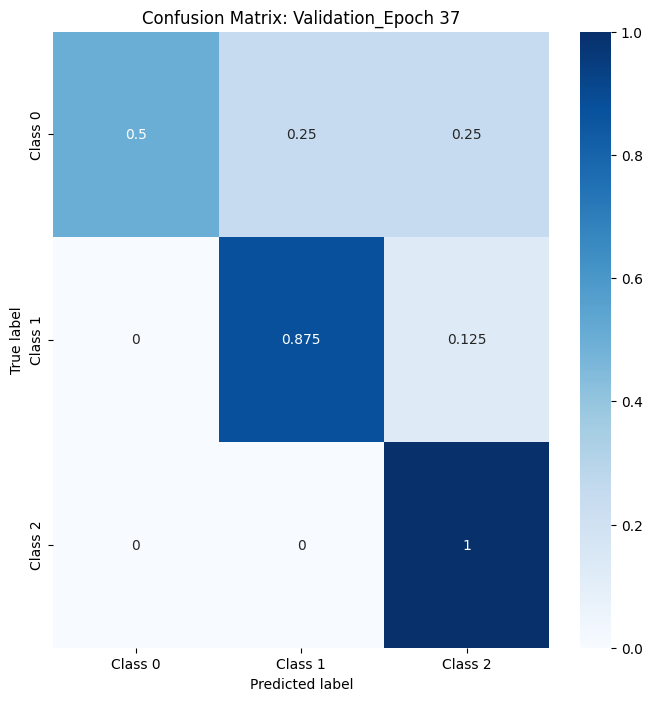

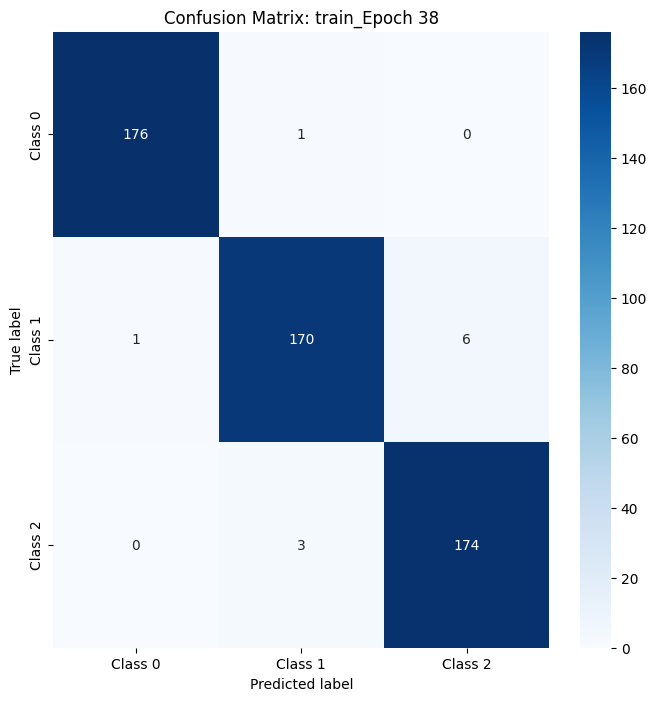

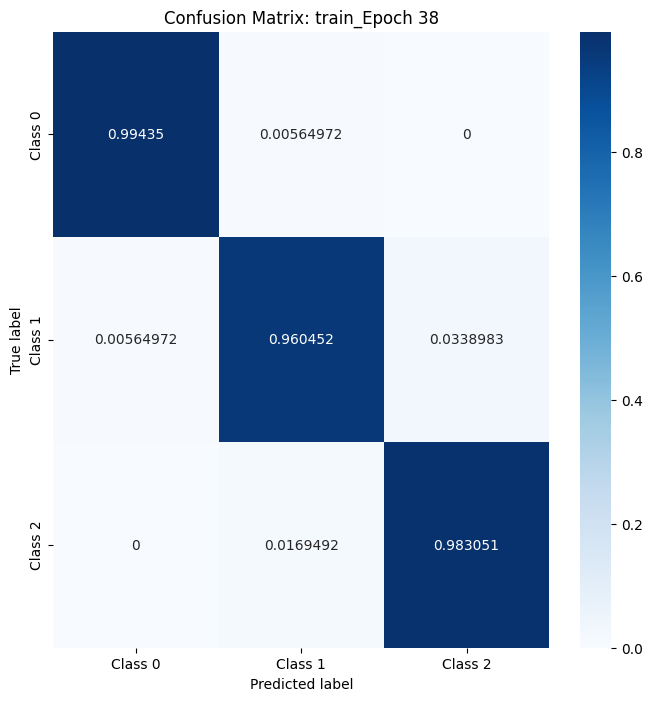

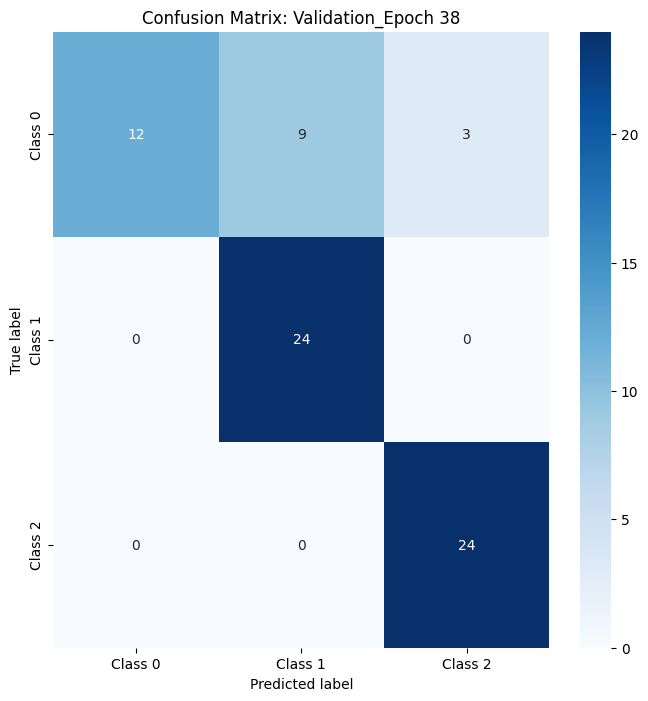

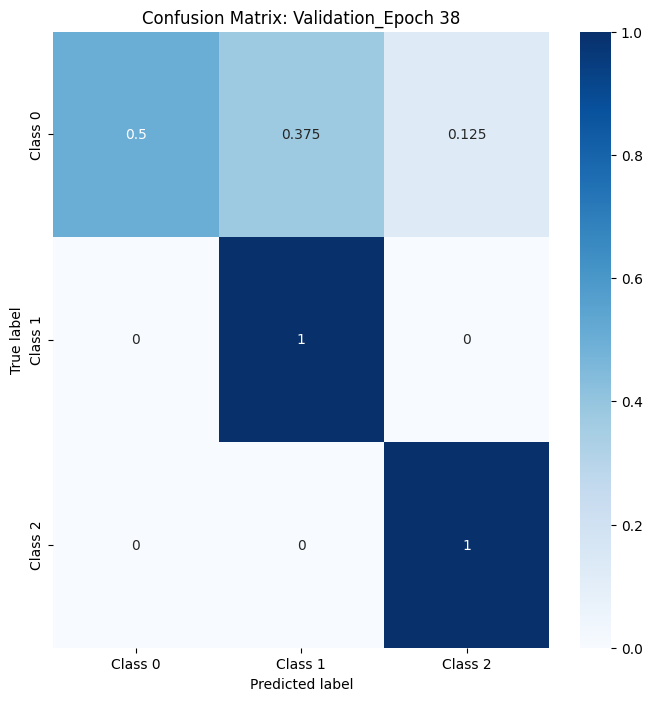

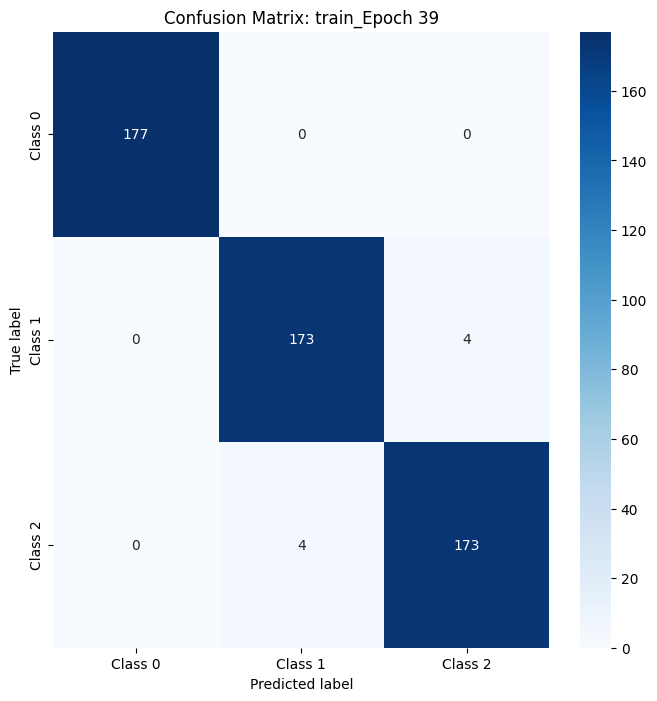

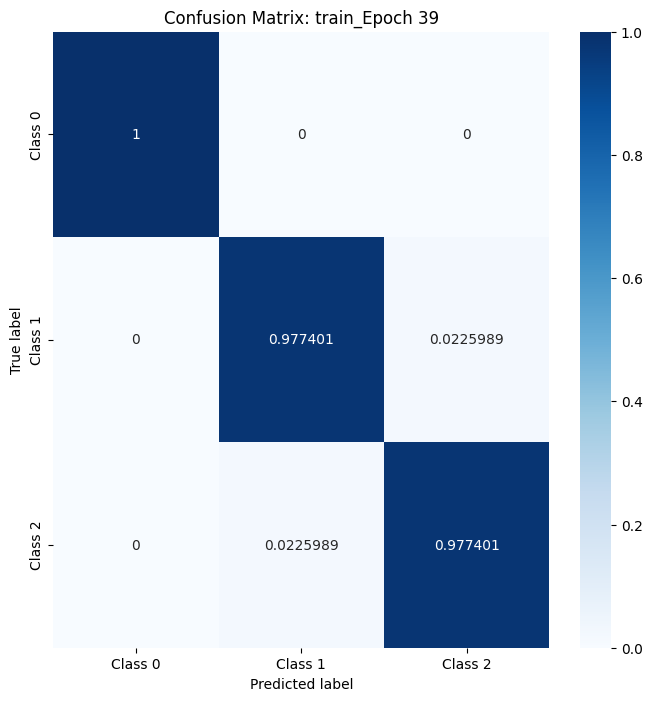

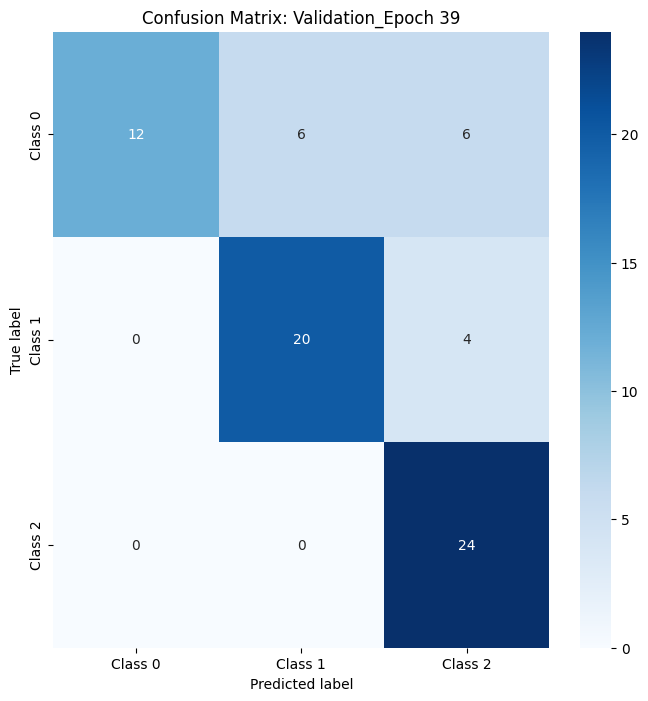

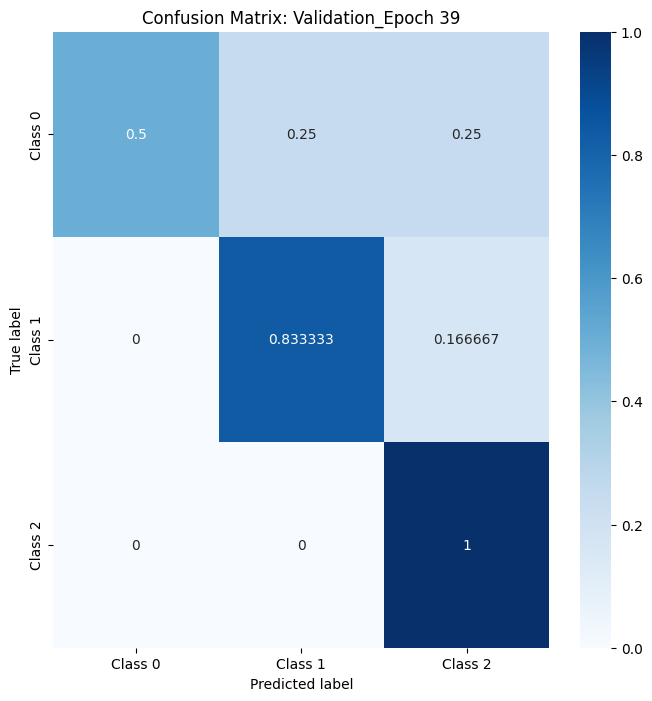

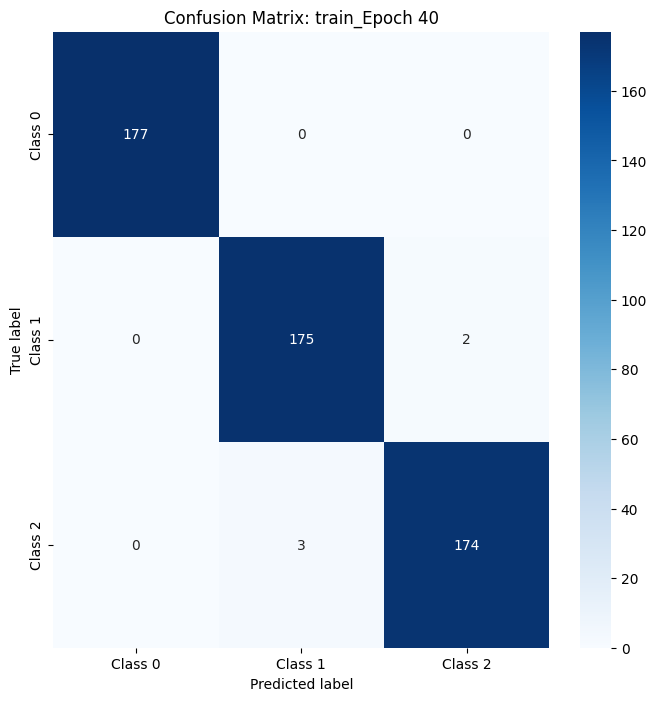

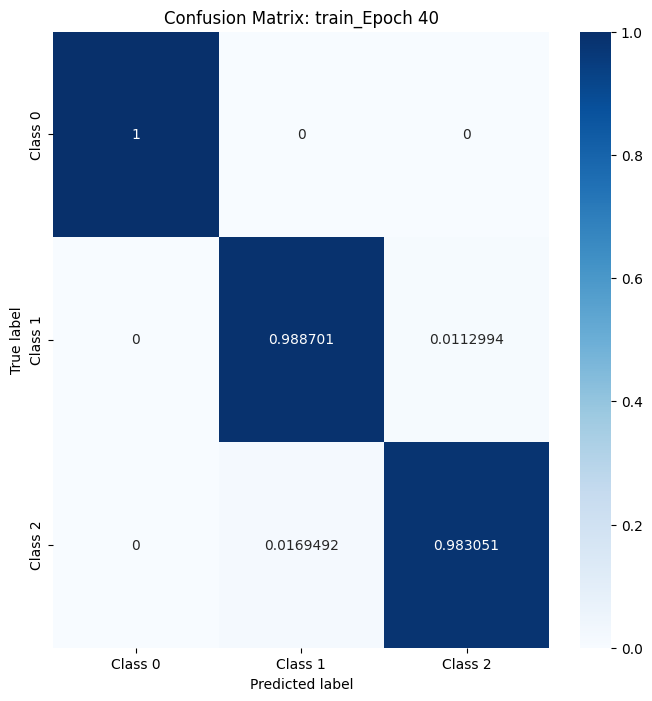

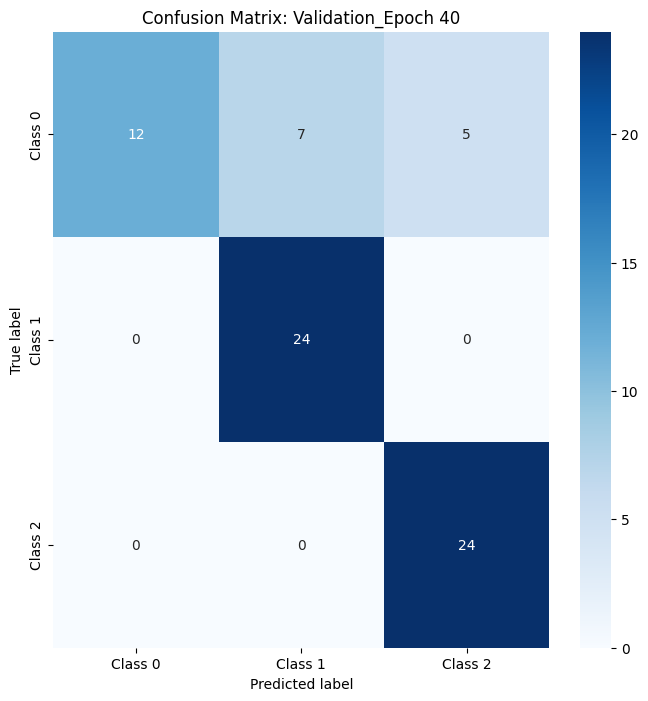

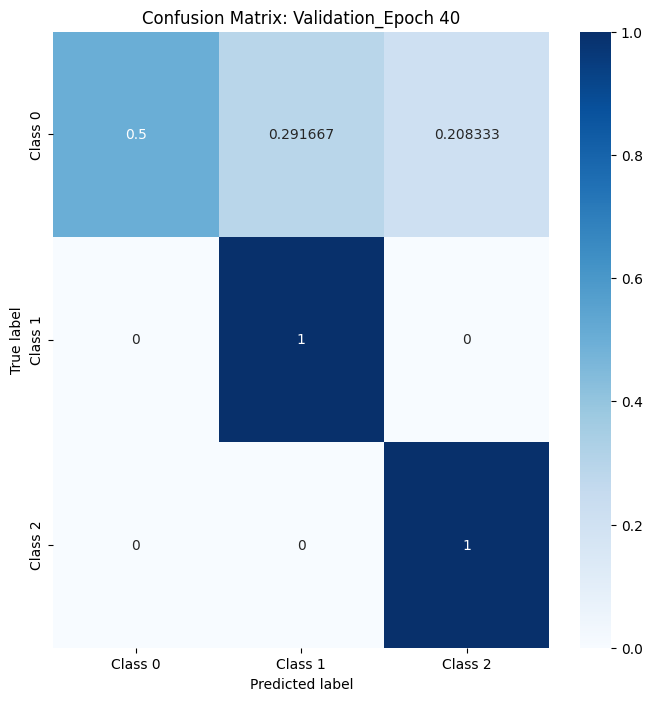

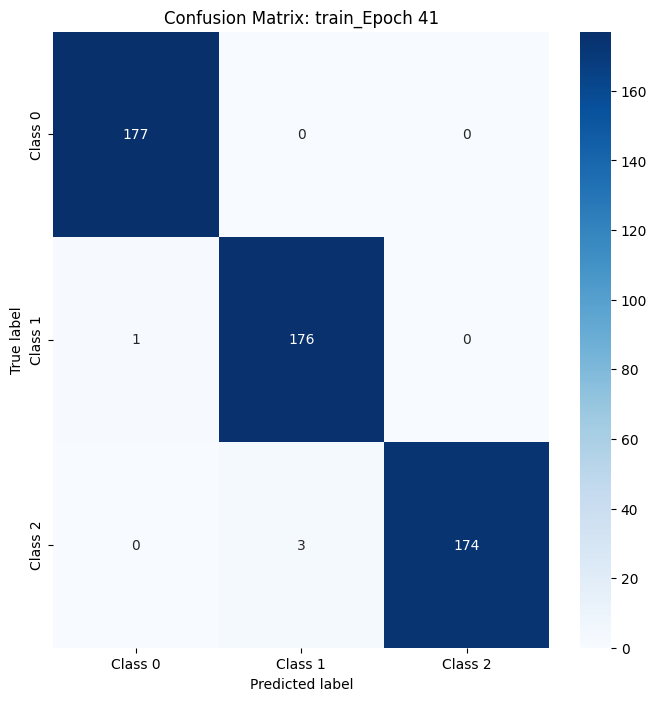

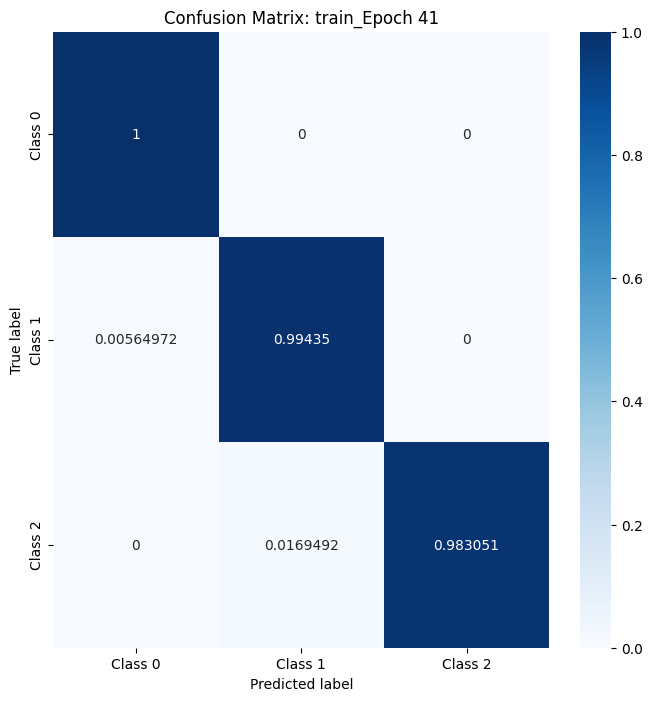

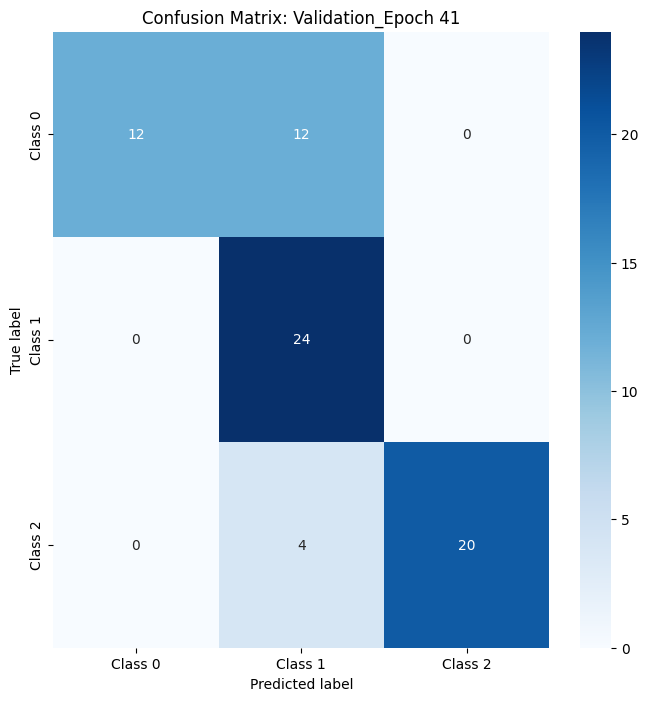

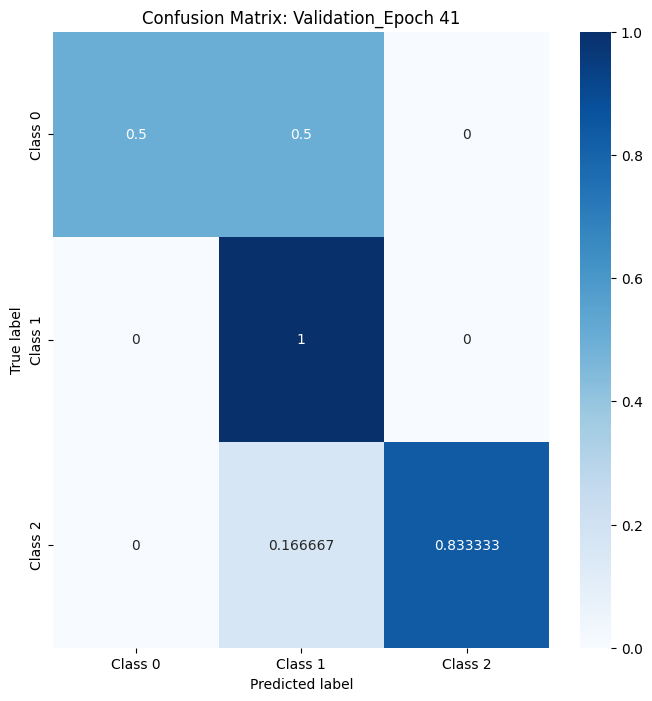

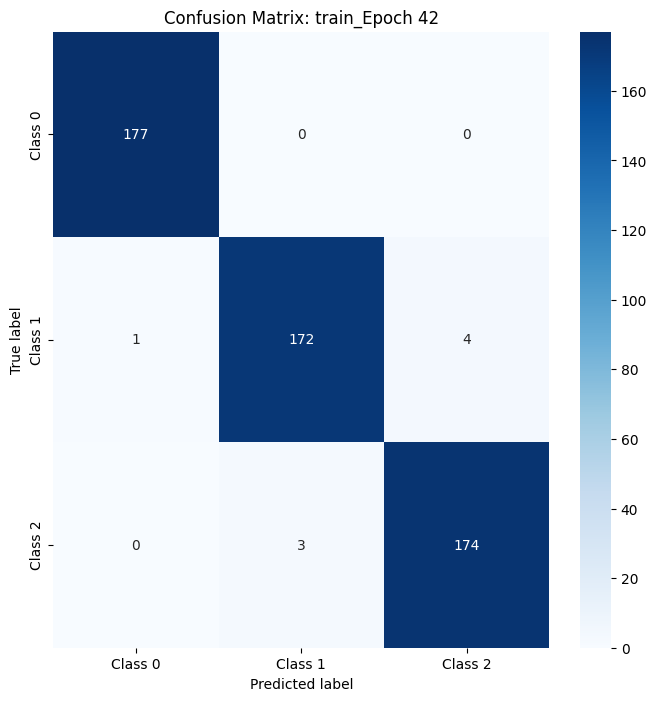

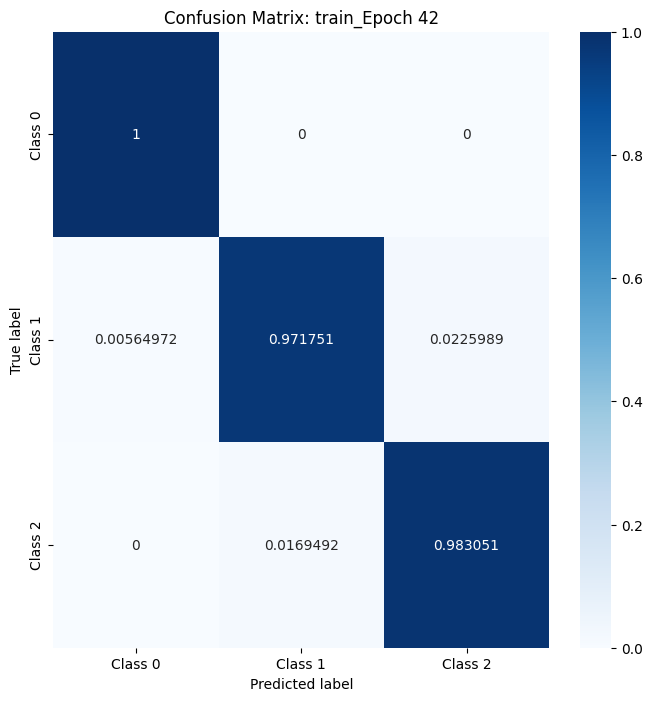

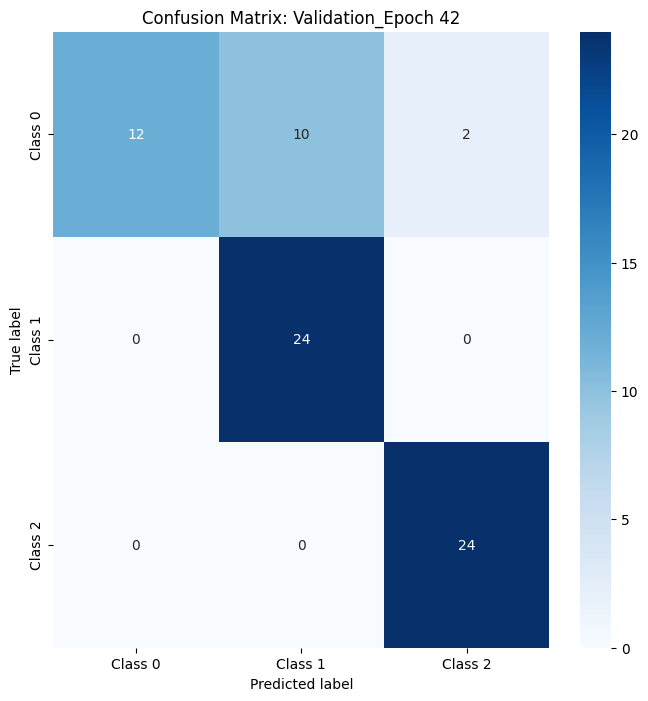

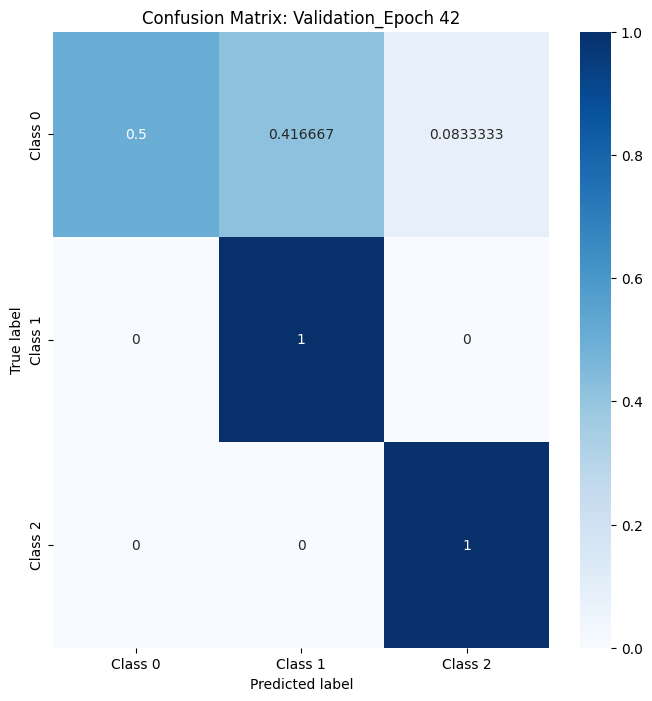

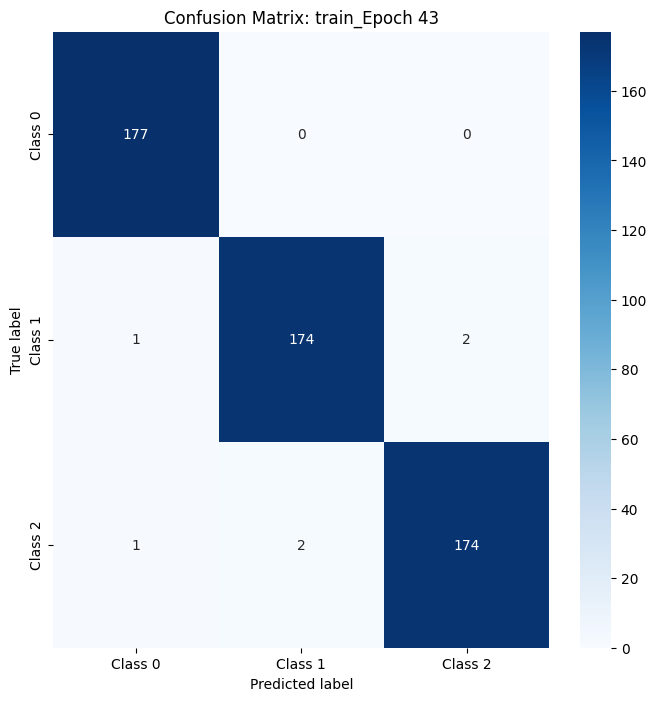

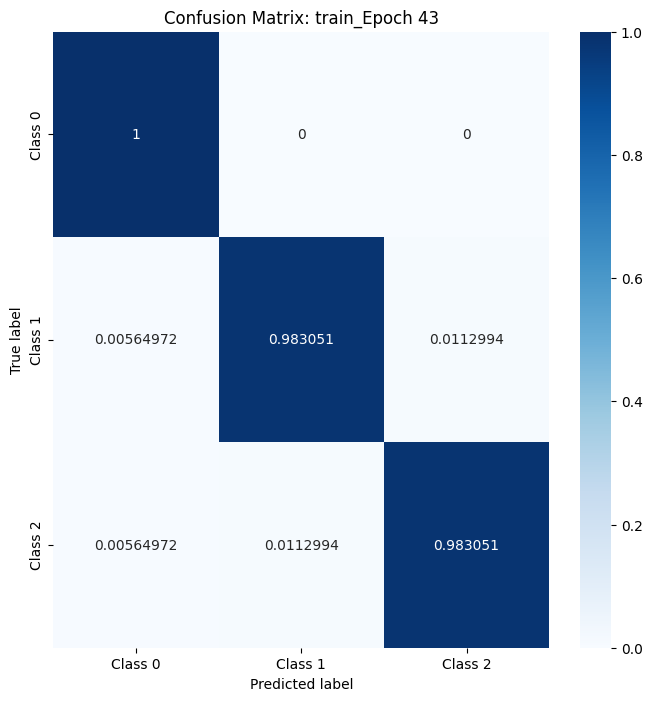

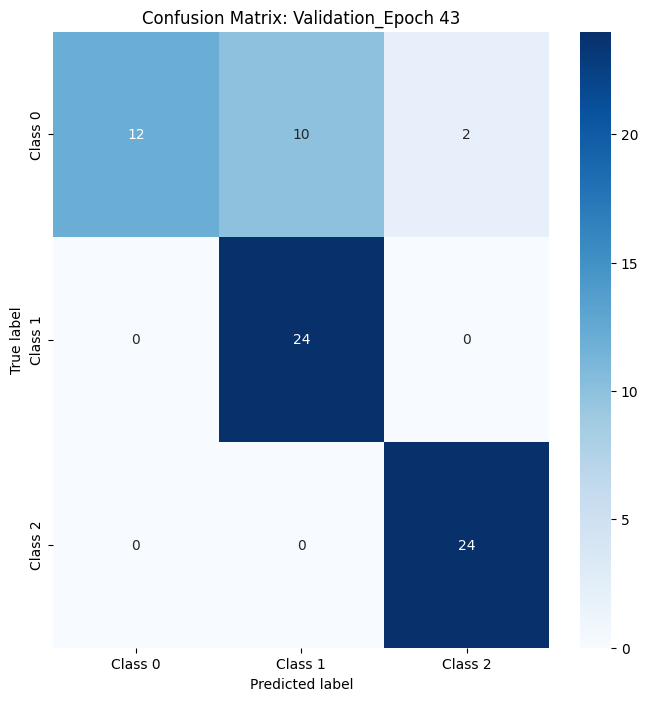

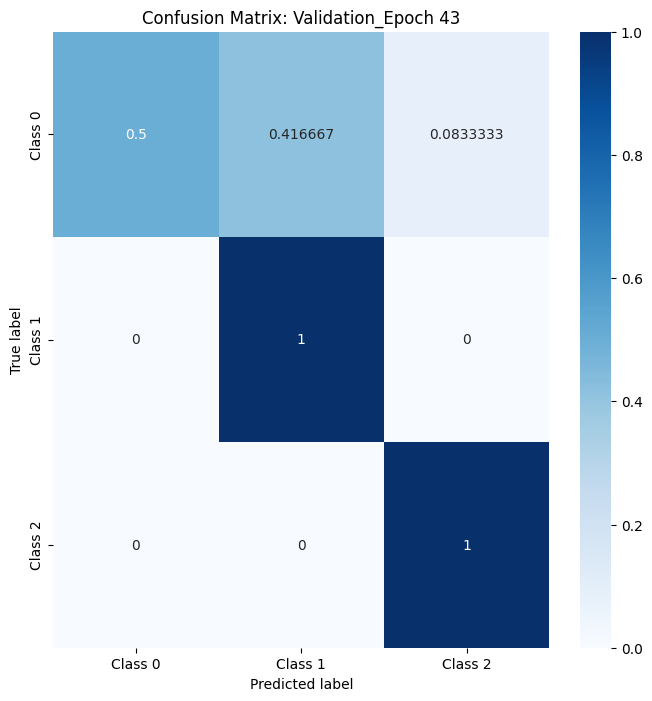

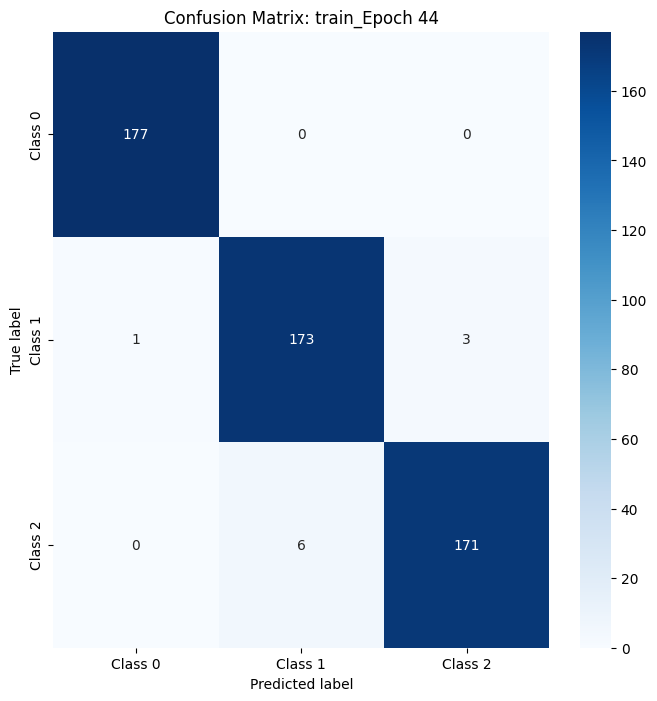

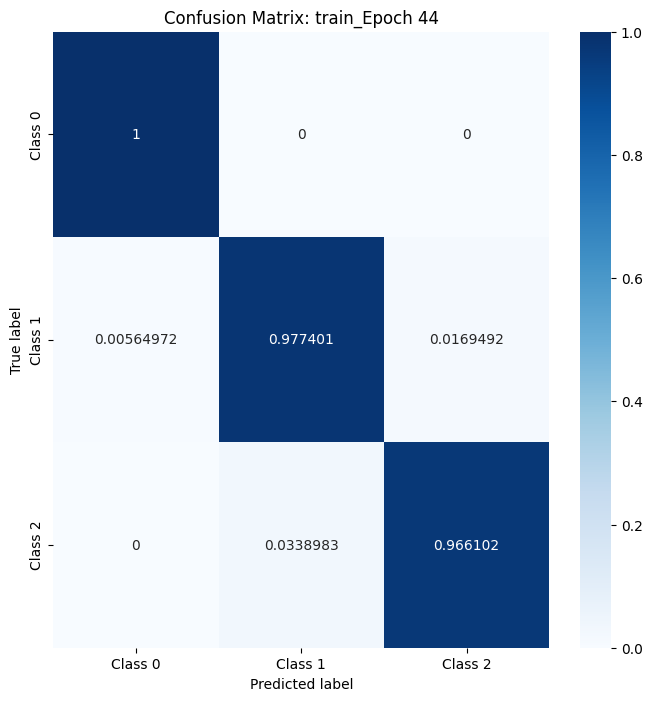

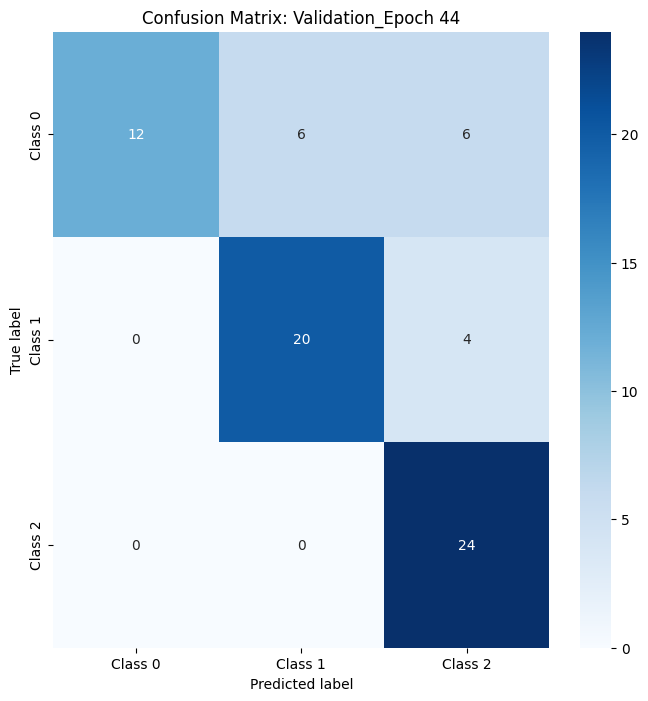

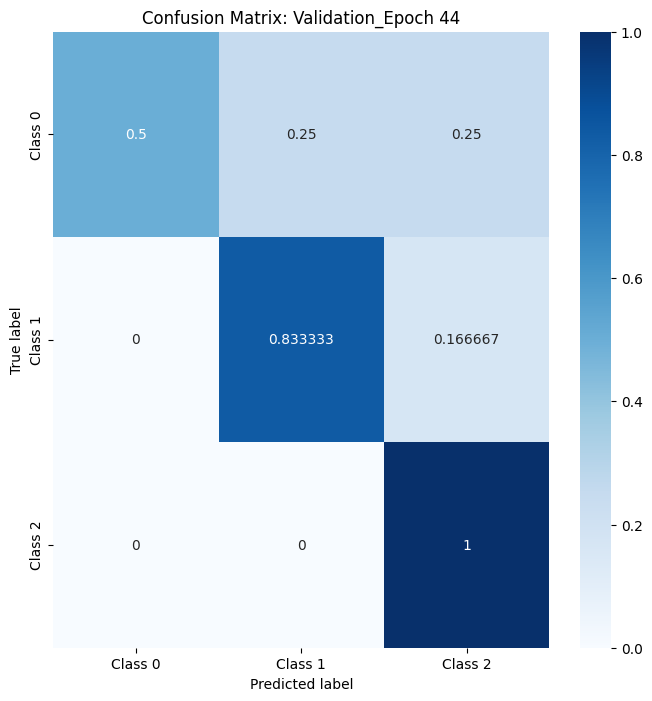

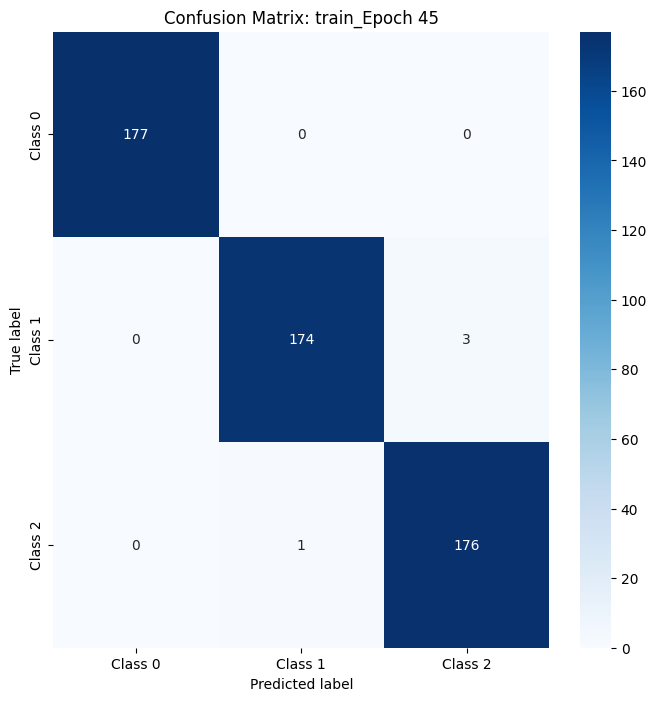

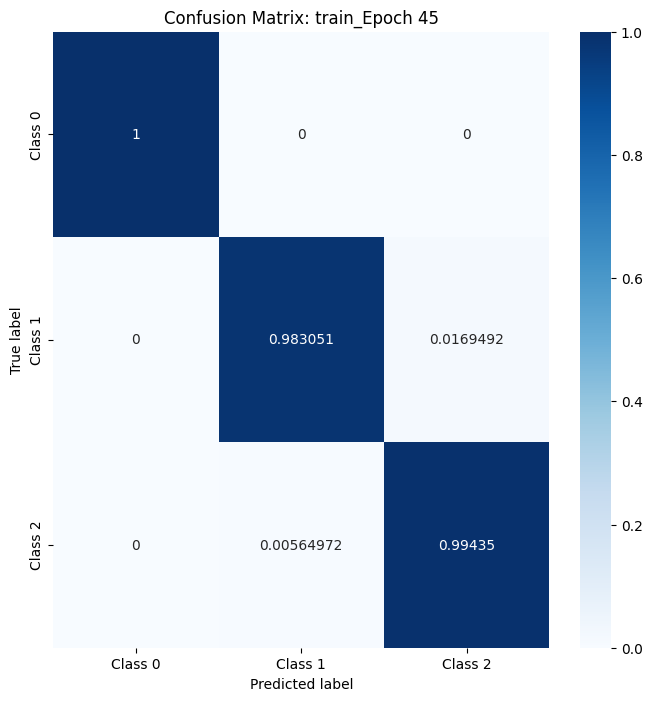

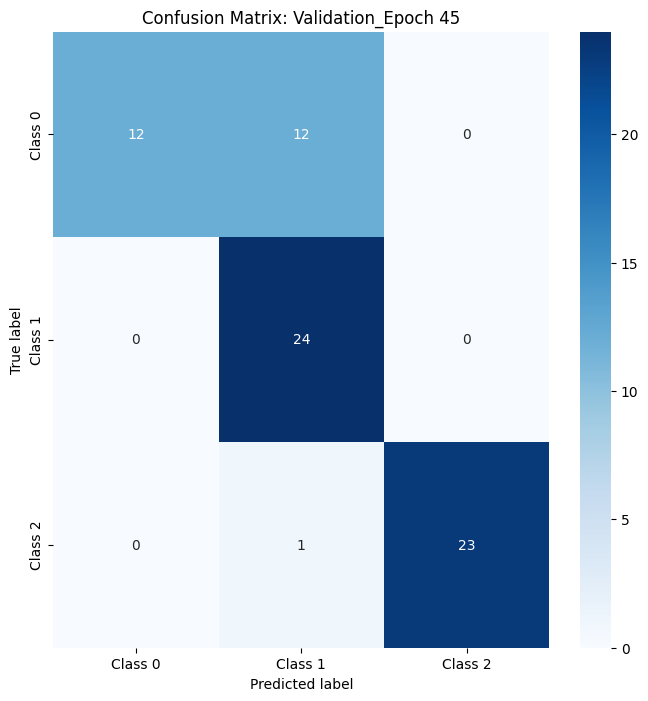

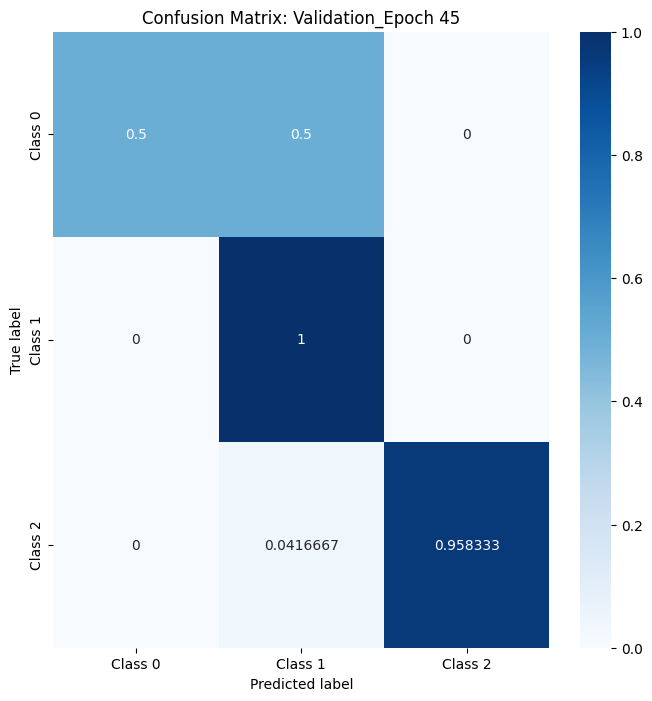

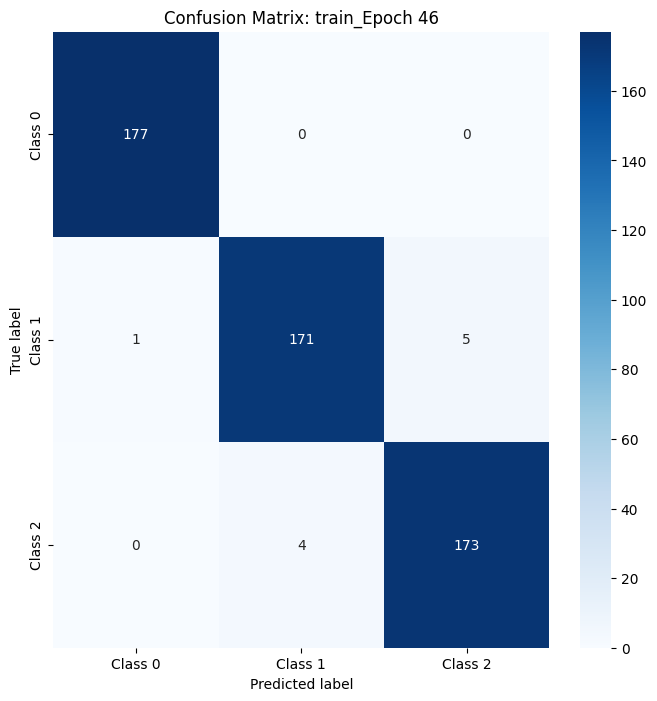

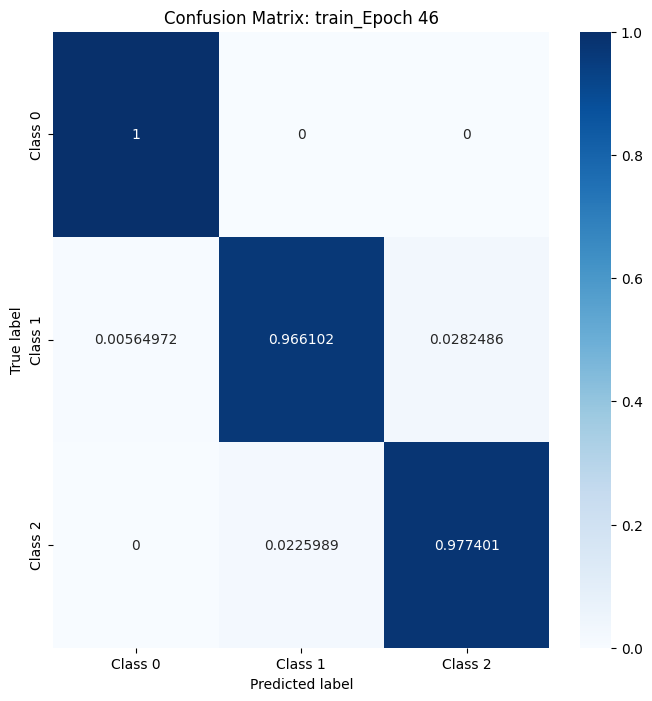

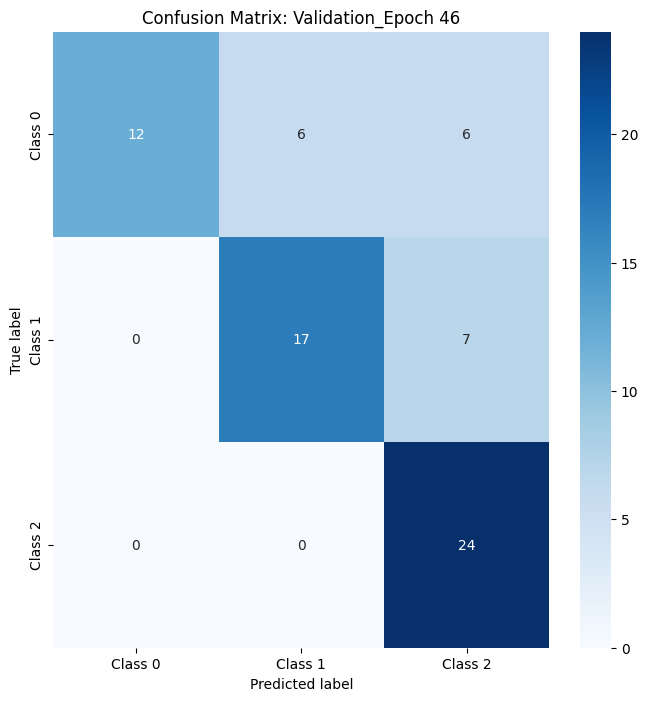

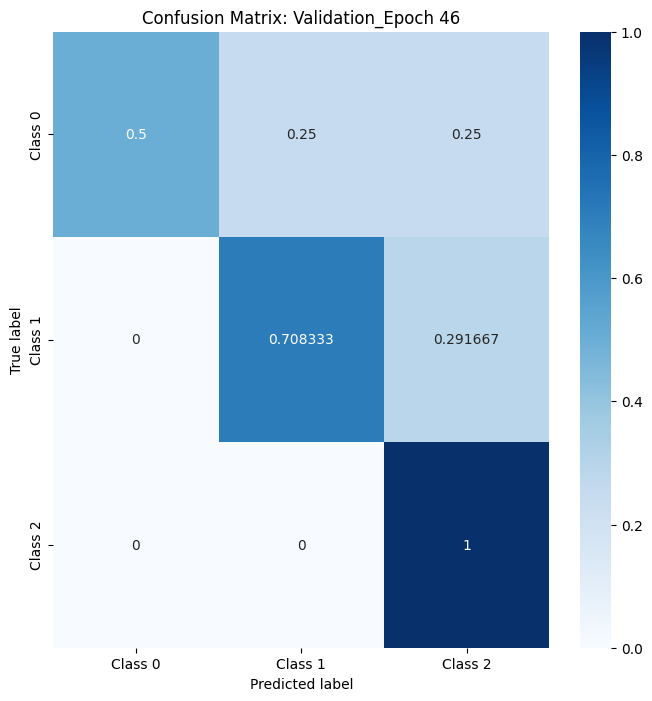

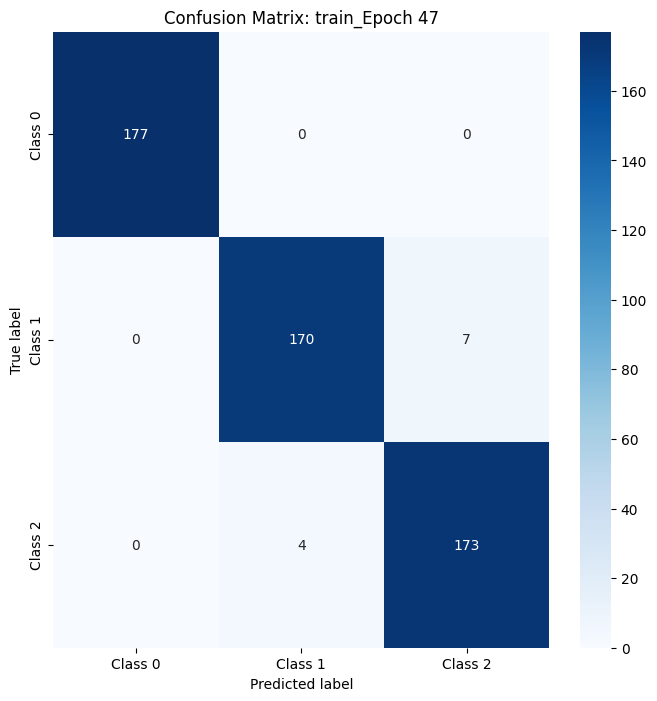

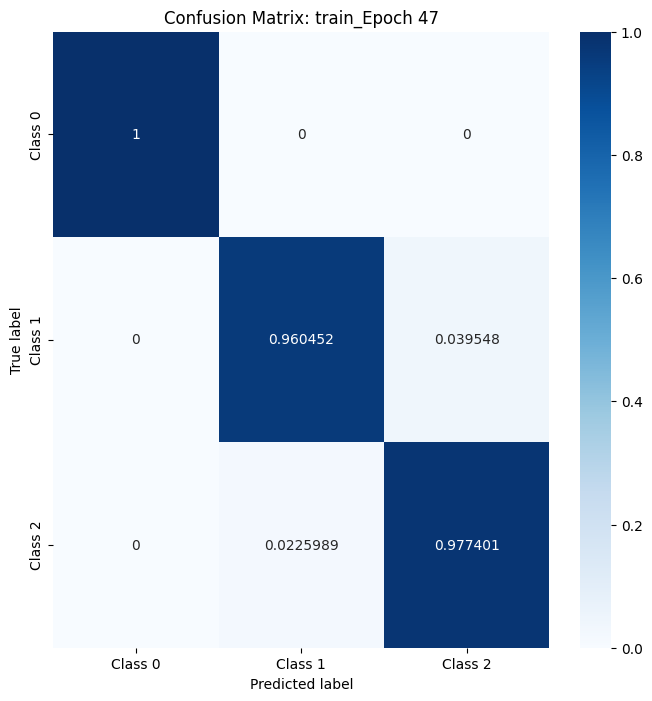

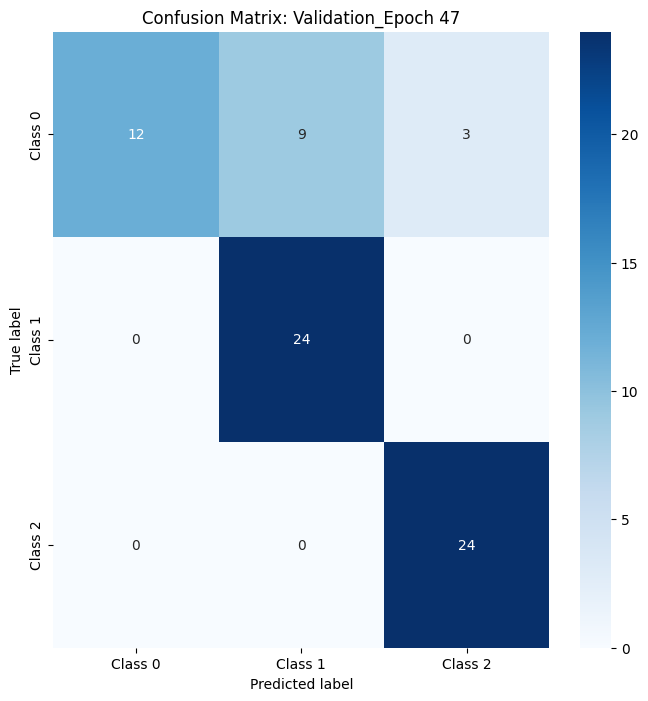

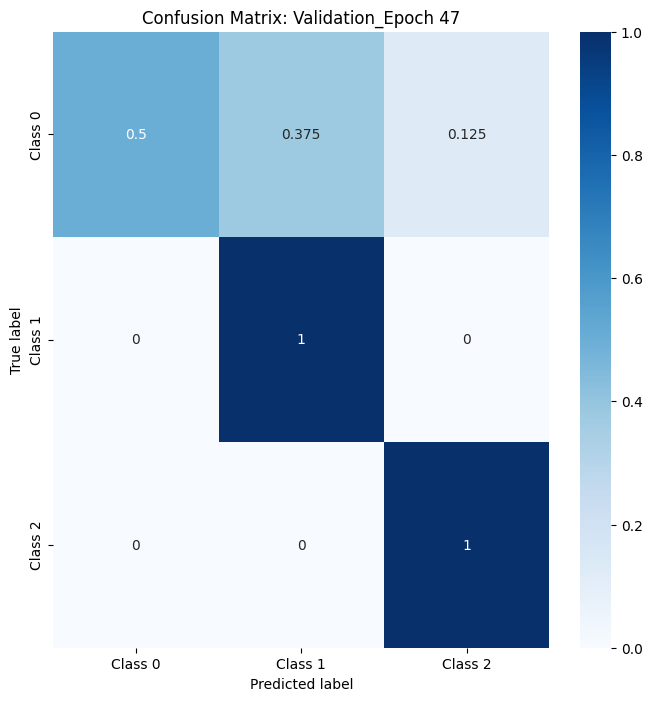

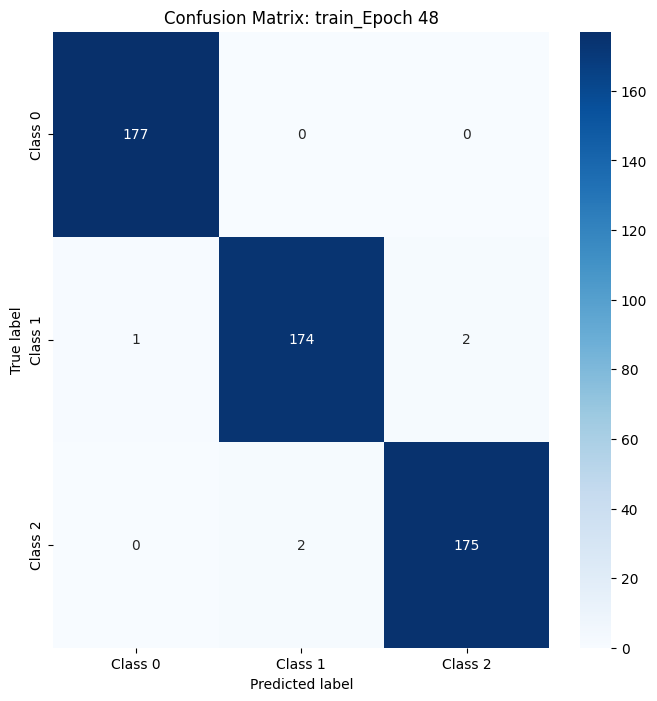

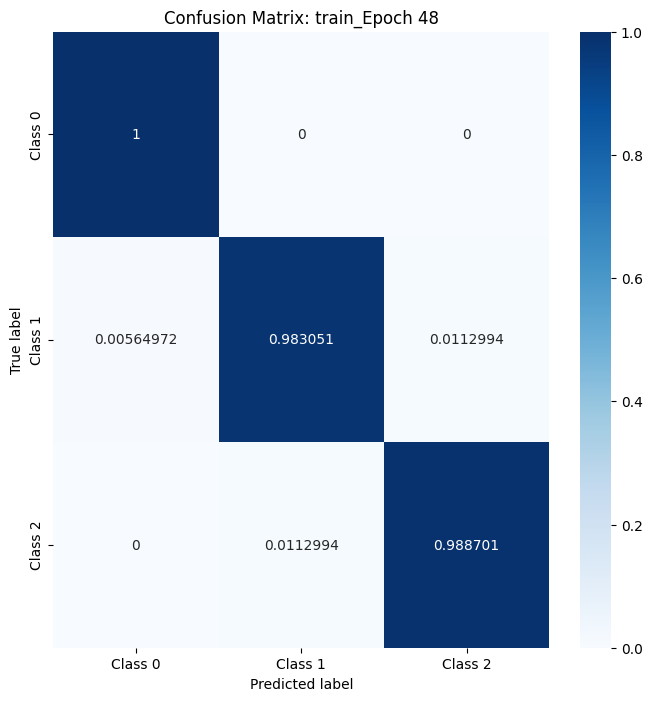

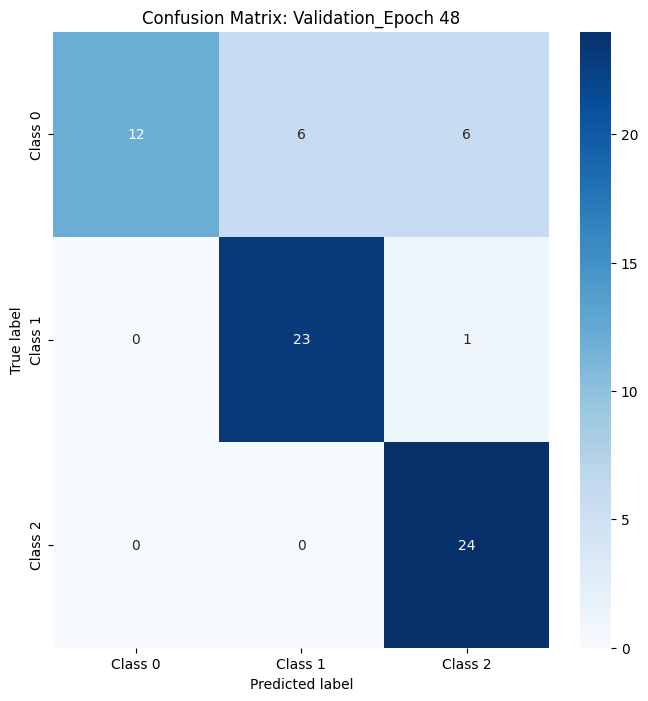

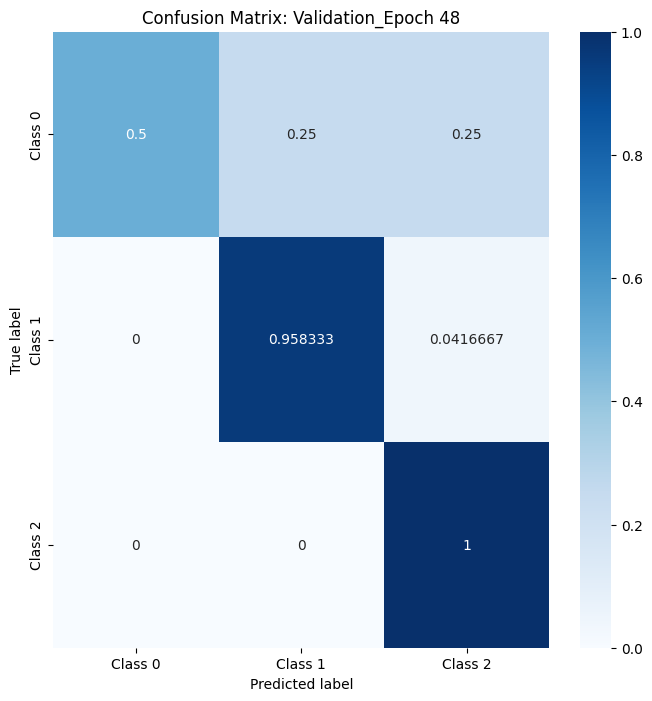

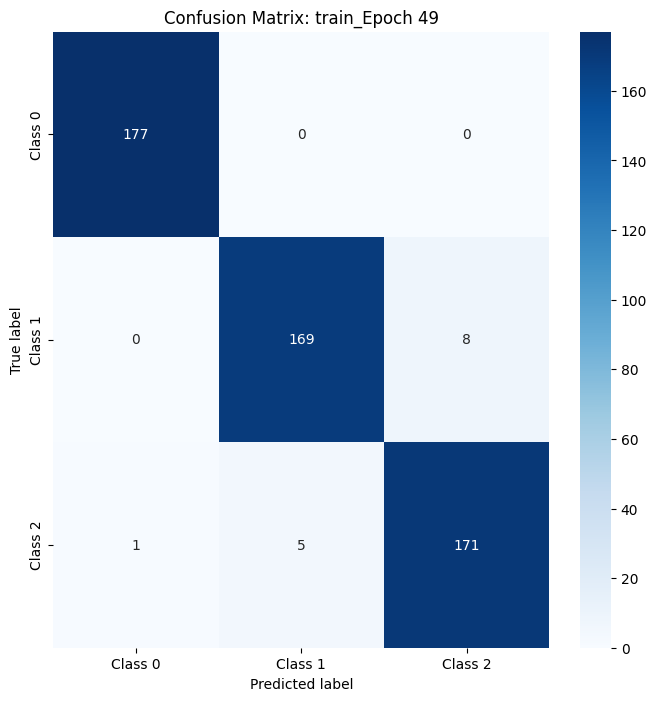

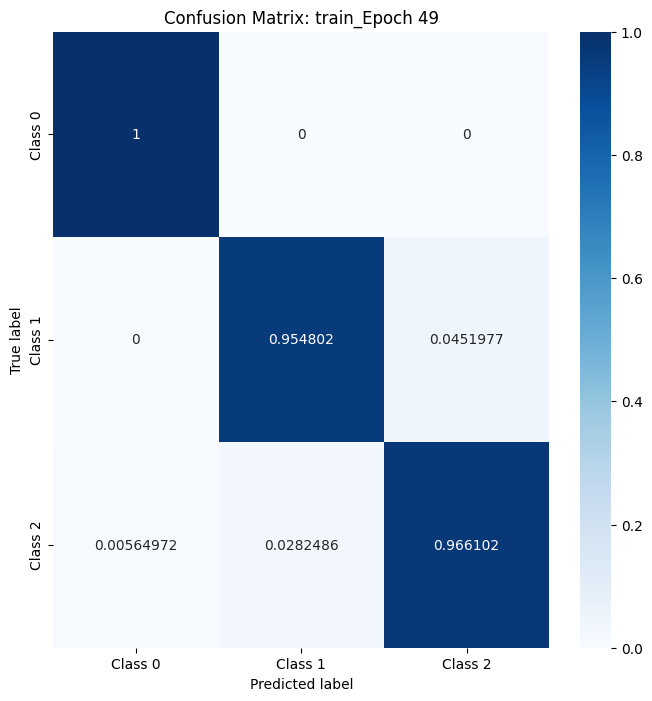

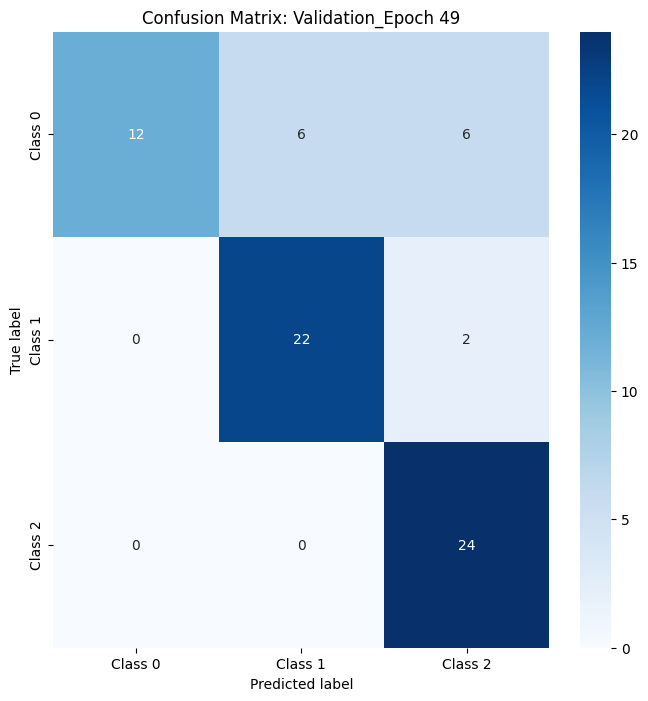

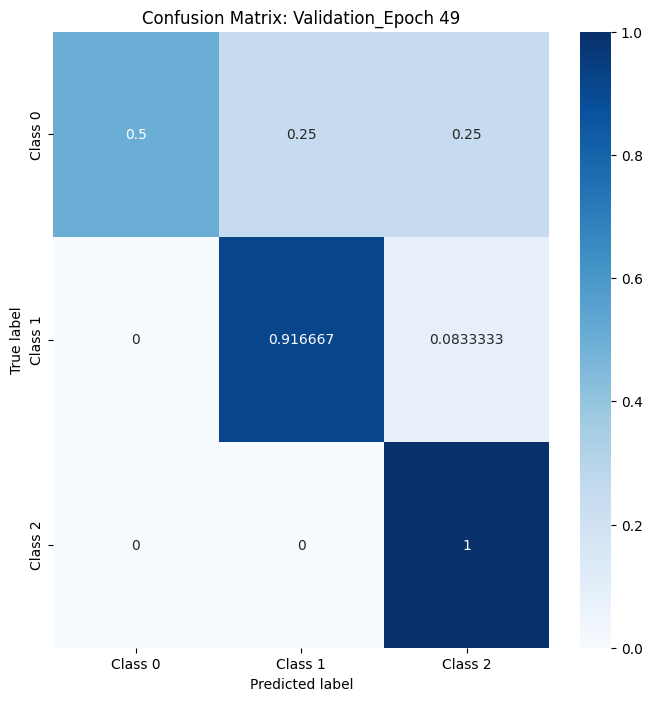

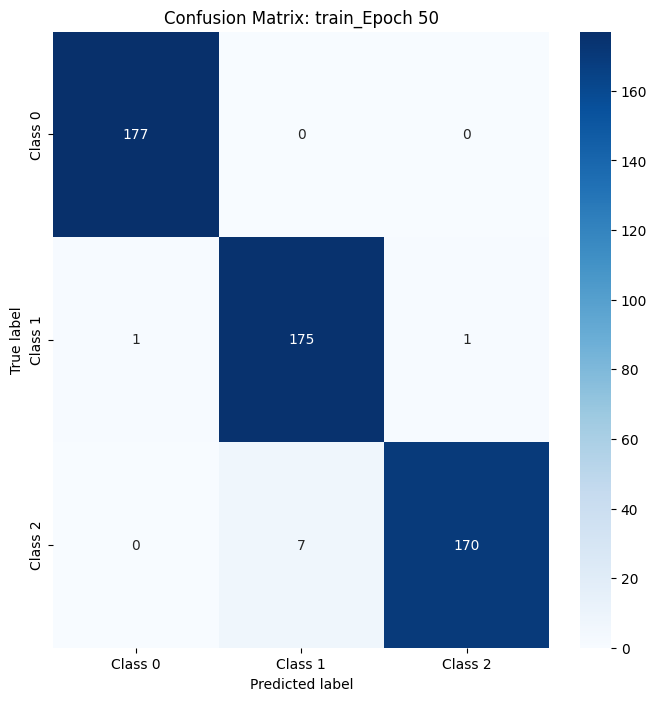

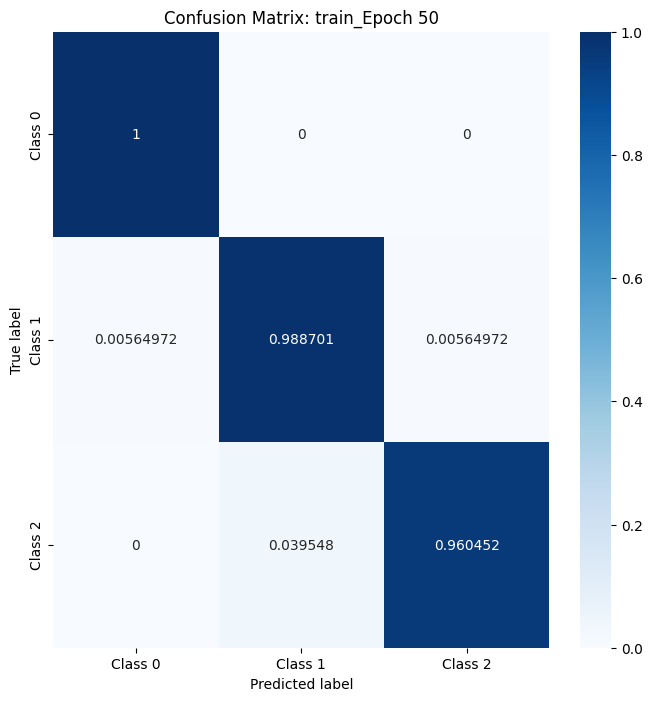

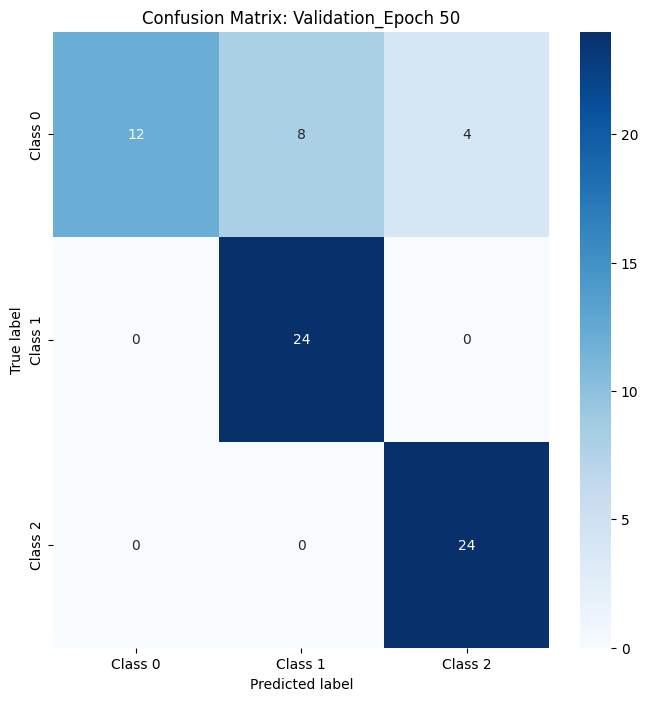

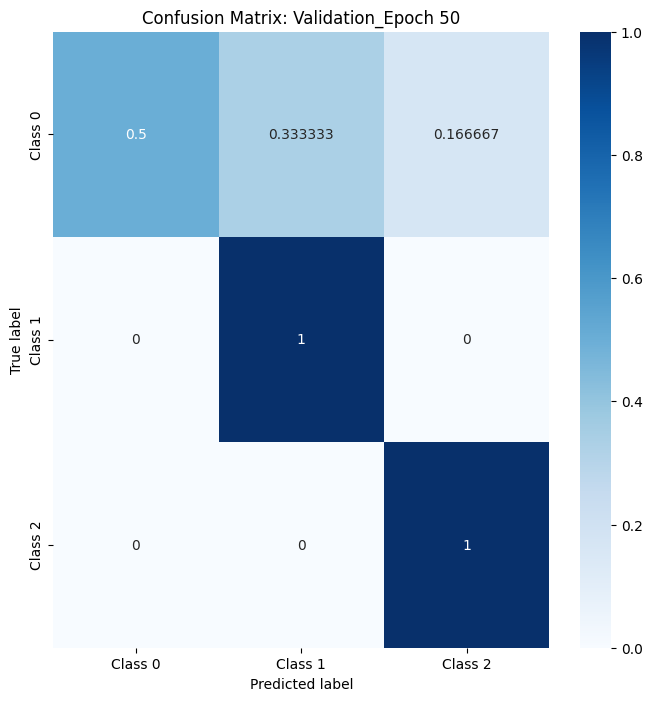

In [7]:
model = run(cfg, model, optimizer,scheduler, criterion, device, train_loader, val_loader,best_accuracy,path='weight_densenet121')